# Análisis Exploratorio y Procesamiento de Datos

## 1.- Librerias necesarias

In [0]:
# cargo librerías necesarias
import numpy  as np  
import pandas as pd
import re
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import graphviz


import time

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Ruta en google drive del proyecto

In [0]:
ruta = "/content/gdrive/My Drive/KeepCoding/ProyectoFinal/"

## 2.- Carga de datos

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
path_csv = ruta + 'data/listings_sentiment_topic_discstation_discparking_discmuseos_discatracciones.csv'
house_data1 = pd.read_csv(path_csv, sep =',', decimal='.') # cargamos fichero
print(f"El dataset original contiene {len(house_data1)} viviendas Airbnb con {len(house_data1.columns)} características")
pd.set_option('display.max_columns', len(house_data1)) # Para ver todas las columnas
house_data1.head(5)                                   # visualizamos 5 primeras filas




El dataset original contiene 14686 viviendas Airbnb con 127 características


Unnamed: 0     id                         listing_url       scrape_id  \
0           0   6369   https://www.airbnb.com/rooms/6369  20191109094951   
1           1  21853  https://www.airbnb.com/rooms/21853  20191109094951   
2           2  24805  https://www.airbnb.com/rooms/24805  20191109094951   
3           3  26825  https://www.airbnb.com/rooms/26825  20191109094951   
4           4  30320  https://www.airbnb.com/rooms/30320  20191109094951   

  last_scraped                                      name  \
0   2019-11-09  Rooftop terrace room ,  ensuite bathroom   
1   2019-11-09                      Bright and airy room   
2   2019-11-09                    Gran Via Studio Madrid   
3   2019-11-09        Single Room whith private Bathroom   
4   2019-11-09               Great Vacational Apartments   

                                             summary  \
0  Excellent connection with the AIRPORT and EXHI...   
1  We have a quiet and sunny room with a good vie...   
2  Studio located 50 meters from Gran Via, next t...   
3  Nice and cozy roon for one person with a priva...   
4                                                NaN   

                                               space  \
0  BETTER THAN A HOTEL.Upscale neighboorhood (Met...   
1  I am living in a nice flat near the centre of ...   
2  LOCATION.  Brand new flats near the Atlantic H...   
3  Nice and cozy roon for one person with a priva...   
4  Fully furnished spacious apartments for rental...   

                                         description experiences_offered  \
0  excellent connection airport exhibition ground...                none   
1  quiet sunny room good view bedroom flat welcom...                none   
2  studio located meters gran via next plaza de c...                none   
3  nice cozy roon one person private bathroom nic...                none   
4  fully furnished spacious vacational apartments...                none   

                               neighborhood_overview  \
0  Nice and definitely  non touristic neighborhoo...   
1  We live in a leafy neighbourhood with plenty o...   
2  The area is next to the Gran Via, so people li...   
3  Es un barrio muy tranquilo, en una zona de Mad...   
4                                                NaN   

                                               notes  \
0  If you are a group/family 3 or 4 people we off...   
1  We are a 15 min bus ride away from the Casa de...   
2                              Just enjoy your trip.   
3  Airport to Apart. You can take a Taxi (30€) or...   
4                                                NaN   

                                             transit  \
0  Excelent public transport and easy Access to m...   
1  The flat is near the centre of Madrid (15 minu...   
2  To go from the airport you have several differ...   
3  Muy bien comunicado con dos Metros a cinco min...   
4                                                NaN   

                                              access  \
0  Full use of living room, kitchen (with dishwas...   
1  There is fibre optic internet connection for y...   
2  Apartment with elevator has a storage room for...   
3  – Smoking is prohibited in rooms and public ar...   
4                                                NaN   

                                         interaction  \
0  English, spanish, german, russian, some french...   
1  If I am at home and see each other around here...   
2  I put at the disposal of my guests to facilita...   
3                                                NaN   
4                                                NaN   

                                         house_rules  thumbnail_url  \
0                                                NaN            NaN   
1               Many thanks for not smoking at home.            NaN   
2  During your stay it is your home. Feel it as i...            NaN   
3  For problems that I have lived with other gues...            NaN   
4             

In [0]:
#Elimino la columna Unname
house_data1.drop(house_data1.columns[house_data1.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

In [7]:
#Compruebo los tipos de datos que tenemos
dato = house_data1.dtypes
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

## 3.- División de datos en train y test

Para poder saber cómo de bien se comporta un algoritmo de machine learning, hemos de medir su capacidad de generalización, esto es, las prestaciones en muestras no vistas previamente por el clasificador. Para ello, dividimos el conjunto de entrenamiento en dos partes, entrenamiento y test

In [0]:
#Transformo a numpy para poder aplicar un método de sklearn
data_sin_precio = house_data1.drop ('price', axis=1)
data_sin_pricenp = data_sin_precio.values
data = house_data1.values

y= data [:,60:61]
X= data_sin_pricenp [:,:]

#Me quedo con el nombre de las columnas
feature_names = data_sin_precio.columns[0:]



In [9]:

# Dividimos los datos en entrenamiento y test (70 training, 30 test)
datos_train, datos_test, price_train, price_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 0)

print('Datos entrenamiento: ', datos_train.shape)
print('Datos test: ', datos_test.shape)

Datos entrenamiento:  (10280, 125)
Datos test:  (4406, 125)


In [0]:
#Convierto de nuevo a pandas para seguir con el procesamiento
datos_train = pd.DataFrame(datos_train)

#Añado el nombre de las columnas
datos_train.columns = feature_names

#A partir de aquí todo el tratamiento es con train

In [11]:
datos_train.head(5)

id                            listing_url       scrape_id  \
0  38356185  https://www.airbnb.com/rooms/38356185  20191109094951   
1  30488431  https://www.airbnb.com/rooms/30488431  20191109094951   
2  35532108  https://www.airbnb.com/rooms/35532108  20191109094951   
3  16451687  https://www.airbnb.com/rooms/16451687  20191109094951   
4  29274213  https://www.airbnb.com/rooms/29274213  20191109094951   

  last_scraped                                               name  \
0   2019-11-09                                         Zue room 2   
1   2019-11-09  WiFi+Patio Madrid Centro-Atocha-Museo Reina Sofía   
2   2019-11-09                                      Arta Hostal 9   
3   2019-11-09    Renovated Apartment Sol area and Plaza Mayor 1C   
4   2019-11-09  Ático con súper terraza en Madrid -4 pax -RETIRO-   

                                             summary  \
0  Vivienda nueva a estrenar donde tendrán todas ...   
1  Ubicado detrás del Museo Reina Sofía, a escaso...   
2  Un habitación con baño privada  dentro del hab...   
3  Bright apartment renovated in the Barrio de la...   
4  Moderno y luminoso ático, se encuentra a 10min...   

                                               space  \
0  La habitacion cuenta con cama individual grand...   
1  Apartamento muy luminoso y tranquilo Planta ba...   
2                                                NaN   
3  The main bed has a size of 1.35cm, is viscoela...   
4  El ático está dividido en una zona de salón co...   

                                         description experiences_offered  \
0  vivienda nueva estrenar todas comodidades alca...                none   
1  ubicado detrás museo reina sofía escasos metro...                none   
2  habitación baño privada dentro habitación barr...                none   
3  bright apartment renovated barrio de las letra...                none   
4  moderno luminoso ático encuentra min andando r...                none   

                               neighborhood_overview  \
0  Es un barrio donde encontraran infinidad de co...   
1  El barrio de Lavapiés, ubicado en el Distrito ...   
2                                                NaN   
3  The Barrio de las Letras is a central neighbor...   
4  El Parque del Buen Retiro es el auténtico prot...   

                                               notes  \
0                                                NaN   
1  La casa es ideal para parejas o familias Propo...   
2                                                NaN   
3  At "Mi Casa Inn", we want you to feel at home,...   
4  Si vais a llegar después de las 21h00, por fav...   

                                             transit  \
0  La calle del apartamento es zona verde donde p...   
1  Tenemos la suerte de tener una ubicación que p...   
2                                                NaN   
3                         Metro station Anton Martin   
4  El barrio destaca por su tranquilidad y cercan...   

                                              access  \
0  Los huéspedes podrán utilizar las zonas comune...   
1  Nos encontramos en la Zona Centro de Madrid, l...   
2                                                NaN   
3  The apartment is located inside a beautiful bu...   
4  Los huéspedes tienen acceso a toda la propieda...   

                                         interaction  \
0  Les podría facilitar mi numero de teléfono par...   
1  Recibimos a los huéspedes en nuestro apartamen...   
2                Hay persona de 24 horas en el lugar   
3  All communication and inquiries to receive inf...   
4  Si tenéis cualquier duda no dudéis en contacta...   

                                         house_rules thumbnail_url medium_url  \
0  Los huéspedes podrán utilizar las zonas comune...           NaN        NaN   
1  El apartamento se ha realizado con mucho cariñ...           NaN        NaN   
2                                                NaN           NaN        NaN   
3  - Se debe mantener silencio de

In [0]:
precios_df = pd.DataFrame(price_train)
precios_df.columns = ['Price']


In [0]:
#Uno los dos dataframe para seguir con el analisis
house_data_train = pd.concat([precios_df, datos_train], axis=1)

In [14]:
house_data_train.head(5)

Price        id                            listing_url       scrape_id  \
0  $22.00  38356185  https://www.airbnb.com/rooms/38356185  20191109094951   
1  $59.00  30488431  https://www.airbnb.com/rooms/30488431  20191109094951   
2  $70.00  35532108  https://www.airbnb.com/rooms/35532108  20191109094951   
3  $58.00  16451687  https://www.airbnb.com/rooms/16451687  20191109094951   
4  $70.00  29274213  https://www.airbnb.com/rooms/29274213  20191109094951   

  last_scraped                                               name  \
0   2019-11-09                                         Zue room 2   
1   2019-11-09  WiFi+Patio Madrid Centro-Atocha-Museo Reina Sofía   
2   2019-11-09                                      Arta Hostal 9   
3   2019-11-09    Renovated Apartment Sol area and Plaza Mayor 1C   
4   2019-11-09  Ático con súper terraza en Madrid -4 pax -RETIRO-   

                                             summary  \
0  Vivienda nueva a estrenar donde tendrán todas ...   
1  Ubicado detrás del Museo Reina Sofía, a escaso...   
2  Un habitación con baño privada  dentro del hab...   
3  Bright apartment renovated in the Barrio de la...   
4  Moderno y luminoso ático, se encuentra a 10min...   

                                               space  \
0  La habitacion cuenta con cama individual grand...   
1  Apartamento muy luminoso y tranquilo Planta ba...   
2                                                NaN   
3  The main bed has a size of 1.35cm, is viscoela...   
4  El ático está dividido en una zona de salón co...   

                                         description experiences_offered  \
0  vivienda nueva estrenar todas comodidades alca...                none   
1  ubicado detrás museo reina sofía escasos metro...                none   
2  habitación baño privada dentro habitación barr...                none   
3  bright apartment renovated barrio de las letra...                none   
4  moderno luminoso ático encuentra min andando r...                none   

                               neighborhood_overview  \
0  Es un barrio donde encontraran infinidad de co...   
1  El barrio de Lavapiés, ubicado en el Distrito ...   
2                                                NaN   
3  The Barrio de las Letras is a central neighbor...   
4  El Parque del Buen Retiro es el auténtico prot...   

                                               notes  \
0                                                NaN   
1  La casa es ideal para parejas o familias Propo...   
2                                                NaN   
3  At "Mi Casa Inn", we want you to feel at home,...   
4  Si vais a llegar después de las 21h00, por fav...   

                                             transit  \
0  La calle del apartamento es zona verde donde p...   
1  Tenemos la suerte de tener una ubicación que p...   
2                                                NaN   
3                         Metro station Anton Martin   
4  El barrio destaca por su tranquilidad y cercan...   

                                              access  \
0  Los huéspedes podrán utilizar las zonas comune...   
1  Nos encontramos en la Zona Centro de Madrid, l...   
2                                                NaN   
3  The apartment is located inside a beautiful bu...   
4  Los huéspedes tienen acceso a toda la propieda...   

                                         interaction  \
0  Les podría facilitar mi numero de teléfono par...   
1  Recibimos a los huéspedes en nuestro apartamen...   
2                Hay persona de 24 horas en el lugar   
3  All communication and inquiries to receive inf...   
4  Si tenéis cualquier duda no dudéis en contacta...   

                                         house_rules thumbnail_url medium_url  \
0  Los huéspedes podrán utilizar las zonas comune...           NaN        NaN   
1  El apartamento se ha realizado con mucho cariñ...           NaN        NaN   
2                                                NaN         

## 4.- Limpiado y preprocesamiento de datos
### 4.1.- Eliminación de columnas iniciales

Elimino columnas de URLs y de texto. A la columna descripción ya le he aplicado NLP para extraer los Topics.

In [0]:
caracteristicas_para_borrar = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary','space', 'description', 
                               'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
                              'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_id', 'host_url',
                              'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                              'host_neighbourhood', 'host_verifications', 'calendar_last_scraped','idioma', 'aux' 
                              ]

house_data_train.drop (caracteristicas_para_borrar, axis=1, inplace=True)

Compruebo si hay características que tengan la mayoría de sus valores vacios y si es así las elimino también

In [16]:
dato =house_data_train.isna().sum ()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato


Price                                               0
id                                                  0
experiences_offered                                 0
picture_url                                         0
host_since                                          6
host_response_time                               1186
host_response_rate                               1186
host_acceptance_rate                            10280
host_is_superhost                                   6
host_listings_count                                 6
host_total_listings_count                           6
host_has_profile_pic                                6
host_identity_verified                              6
street                                              0
neighbourhood                                       2
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
city                                                1
state                       

In [0]:
house_data_train.drop (['host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'license',
                        'jurisdiction_names'], axis=1, inplace=True)

Si analizo las características "host_listings_count" y "host_total_listings_count" parece que contiene la misma información.
Los compuebo:

In [18]:
print(sum((house_data_train['host_listings_count'] == house_data_train ['host_total_listings_count']) == False))

6


Hay muy pocos valores diferentes que precisamente coincide con el número de Nan que hemos visto antes. Esto también lo hubiera visto al hacer el estudio de correlaciones. Voy entonces a eliminar una de ellas:

In [0]:
house_data_train.drop (['host_total_listings_count'], axis=1, inplace=True)

Elimino también la columna 'Calculated host listings count' que hace referencia a lo mismo

In [0]:
house_data_train.drop (['calculated_host_listings_count'], axis=1, inplace=True)

Veo también que hay varias columnas relacionadas con el máximo y mínimo de noches. Me voy a quedar solo con "minimum_nights" y "maximum_nights" y elimino el resto

In [0]:
house_data_train.drop (['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

Elimino también los siguientes campos calculados:            
calculated_host_listings_count_entire_homes         
calculated_host_listings_count_private_rooms        
calculated_host_listings_count_shared_rooms 

In [0]:
house_data_train.drop (['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                        'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

Tenemos además columnas con valores booleanos "f" y "t" voy a sustituirlos por 0 y 1

In [0]:
house_data_train.replace({'f': 0, 't': 1}, inplace=True)

Voy ahora a analizar algunas de las características que hay de localización para ver con cuales me quedo. En principio el dataset es de Madrid y el código del pais debería ser España. Voy a comprobar los valores que hay en City para ver si realmente tenemos solo Madrid.

### City

In [24]:
dato = house_data_train.city.value_counts()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Madrid                             10218
MADRID                                18
Madrid                                13
Chueca                                 5
Madrid, Comunidad de Madrid, ES        4
Madrid Center                          2
Centro                                 2
Pozuelo de Alarcón                     2
San Fernando de Henares                2
Malasaña                               2
Madrid, La Latina/Palacio              1
villa verde bajo                       1
-centro                                1
MADRID                                 1
Pozuelo                                1
Aravaca                                1
Centro, Madrid                         1
madrid                                 1
las matas  madrid                      1
Lavapiés                               1
\nDelicias                             1
Name: city, dtype: int64

Podemos ver que el dataset sí que es de Madrid y parece que está bien filtrado. No veo otras ciudades. Lo que aparece diferente son barrios 
Tenemos además 1 valor Nan que hemos visto antes en City. Ese valor nulo lo voy a eliminar.


In [0]:
house_data_train.dropna(subset=['city'], inplace=True) 

Ahora ya no debería tener nulos en la columna City

In [26]:
house_data_train.city.isna().sum ()

0

In [0]:
house_madrid = house_data_train

Ahora que he comprobado que efectivamente todo es de Madrid puedo descartar esta columna

In [0]:
house_madrid.drop (['city'], axis=1, inplace=True)

Hay más columnas relativas a la localización. Puedo quedarme solo con una de ellas. Analizando los NA que me daban antes me voy a quedar con la característica neighbourhood_cleansed que no tenía nulos y que utilizaré por tanto como columna de localización.
Voy a eliminar por tanto: state, street, neighbourhood, neighbourhood_group_cleansed, zipcode, market, smart_location,  country_code, country, latitude, longitude, geolocation

In [0]:
house_madrid.drop (['state', 'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'zipcode', 'market', 
                    'smart_location',  'country_code', 'country', 'latitude', 'longitude'], axis=1, inplace=True)

### 4.2.- Limpieza de columnas individuales

A continuación voy a ir analizando cada una de las características que he conservado. 



### Price

Es nuestra variable objetivo.  Voy a comprobar que no haya nulos. Si los hay elimino esas observaciones 

In [30]:
print("Valores nulos:", house_madrid['Price'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Price'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [0]:
house_madrid.dropna(subset=['Price'], inplace=True) 

In [32]:
house_madrid ['Price']

0         $22.00
1         $59.00
2         $70.00
3         $58.00
4         $70.00
          ...   
10275     $25.00
10276    $135.00
10277     $65.00
10278    $120.00
10279    $290.00
Name: Price, Length: 10279, dtype: object

Voy a eliminar el símbolo $, a quitar los decimales y a transformarlo a int64

In [0]:
house_madrid.Price = house_madrid.Price.str[1:-3]
house_madrid.Price = house_madrid.Price.str.replace(",", "")
house_madrid.Price = house_madrid.Price.astype('int64')

In [34]:
house_madrid.Price

0         22
1         59
2         70
3         58
4         70
        ... 
10275     25
10276    135
10277     65
10278    120
10279    290
Name: Price, Length: 10279, dtype: int64

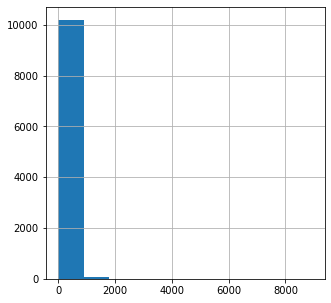

In [35]:
#Puedo ver la distribución también con un histograma
house_madrid['Price'].hist(figsize=(5,5));

### experiences_offered

Compruebo los valores que puede tener esta caractística

In [36]:
house_madrid ['experiences_offered'].value_counts()


none    10279
Name: experiences_offered, dtype: int64

Todo el listado tiene en esta característica el valor none, por tanto la puedo eliminar

In [0]:
house_madrid.drop (['experiences_offered'], axis=1, inplace=True)

### host_since
Esta característica representa el momento en el que el propietario se une a Airbnb. Es una columna que habría que tranformar para que fuera de tipo datatime. Una vez transformada la voy a convertir en una medida del número de dias que ha estado la vivienda en la plataforma tomando la fecha de scraped de datos que era 9 de noviembre del 2019. Creo por tanto una nueva columna que se llamará Dias_activo y al final podré eliminar la columna Host Since

In [38]:
#Convierto a datatime
house_madrid ['host_since'] = pd.to_datetime(house_madrid ['host_since']) 
# Calculo el número de dias
house_madrid['Dias_activo'] = (datetime(2019, 11, 9) - house_madrid['host_since']).astype('timedelta64[D]')
# Media y mediana
print("Media de dias como host:", round(house_madrid['Dias_activo'].mean(),0))
print("Mediana de dias como host:", house_madrid['Dias_activo'].median())

# Si hay valores nulos los sustituyo por la mediana
mediana_host_since = house_madrid.Dias_activo.median()  #Guardo este valor para usarlo después con las muestras de test
house_madrid.Dias_activo.fillna(house_madrid.Dias_activo.median(), inplace=True)


Media de dias como host: 1406.0
Mediana de dias como host: 1366.0


In [39]:
house_madrid.head(3)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   
2     70  35532108  https://a0.muscache.com/im/pictures/9770cbc1-5...   

  host_since host_response_time host_response_rate  host_is_superhost  \
0 2017-07-16     within an hour               100%                0.0   
1 2015-02-10     within an hour               100%                0.0   
2 2019-05-23     within an hour               100%                0.0   

   host_listings_count  host_has_profile_pic  host_identity_verified  \
0                  2.0                   1.0                     0.0   
1                 63.0                   1.0                     0.0   
2                 14.0                   1.0                     0.0   

  neighbourhood_cleansed  is_location_exact property_type        room_type  \
0               Delicias                  0     Apartment     Private room   
1            Embajadores                  1     Apartment  Entire home/apt   
2                 Cortes                  1     Apartment     Private room   

   accommodates  bathrooms  bedrooms  beds  bed_type  \
0             1        1.0       1.0   1.0  Real Bed   
1             3        1.0       1.0   1.0  Real Bed   
2             3        1.0       1.0   3.0  Real Bed   

                                           amenities security_deposit  \
0  {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...              NaN   
1  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...          $100.00   
2  {TV,Wifi,Washer,Dryer,Essentials,Shampoo,Hange...            $0.00   

  cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights  \
0       $20.00                1        $5.00               1            1125   
1       $40.00                1       $10.00               1            1125   
2        $0.00                1        $0.00               1            1125   

  calendar_updated  has_availability  availability_30  availability_60  \
0            today                 1                8               28   
1       4 days ago                 1                5               21   
2        yesterday                 1               10               33   

   availability_90  availability_365  number_of_reviews  \
0               58                58                  8   
1               21                21                 15   
2               63               333                  6   

   number_of_reviews_ltm first_review last_review  review_scores_rating  \
0                      8   2019-09-13  2019-10-26                  98.0   
1                     15   2018-12-29  2019-09-03                  83.0   
2                      6   2019-06-12  2019-10-28                  93.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                     9.0                        9.0                    9.0   
2                    10.0                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                          9.0                    10.0                  9.0   
2                         10.0                    10.0                  9.0   

   requires_license  instant_bookable  is_business_travel_ready  \
0                 1                 1                         0   
1                 1                 1                         0   
2                 1                 0                         0   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              0   
1                     moderate                              0   
2  strict_14_with_grace_period             

Tras realizar la transformación elimino la columna original

In [0]:

house_madrid.drop (['host_since'], axis=1, inplace=True)

### host_response_time

Esta característica indica el promedio de tiempo que tarda el host en responder a los mensajes. Es de tipo categórico

In [41]:
print("Valores nulos:", house_madrid['host_response_time'].isna().sum())
print(f"Proporcion: {round((house_madrid ['host_response_time'].isna().sum()/len(house_madrid))*100, 1)}%")



Valores nulos: 1186
Proporcion: 11.5%


Un 11,5% es desconocido. Voy a ver el resto de posibles valores

In [42]:
house_madrid ['host_response_time'].value_counts()

within an hour        6952
within a few hours    1325
within a day           676
a few days or more     140
Name: host_response_time, dtype: int64

A los valores nulos le voy a dar la categoría de 'desconocido'

In [0]:
house_madrid ['host_response_time'].fillna("unknown", inplace=True)

In [44]:
house_madrid ['host_response_time'].value_counts()

within an hour        6952
within a few hours    1325
unknown               1186
within a day           676
a few days or more     140
Name: host_response_time, dtype: int64

Tenemos por tanto que 'host_response_time' es una variable categórica con 5 posibles valores. 

### host_response_rate

Esta característica representa el porcentaje de mensajes a los que el anfitrión responde. Es de tipo continuo. 



Voy a comprobar al igual que antes el número de nulos que tengo


In [45]:
print("Valores nulos:", house_madrid['host_response_rate'].isna().sum())
print(f"Proporcion: {round((house_madrid['host_response_rate'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 1186
Proporcion: 11.5%


Miro la mediana y media de esta característica y también el porcentaje que hay del 100%

In [0]:
#Elimino el signo % y transformo a float64
house_madrid['host_response_rate'] = house_madrid['host_response_rate'].str[:-1].astype('float64')

In [47]:
print("Media host response rate:", round(house_madrid['host_response_rate'].mean(),0))
print("Mediana host response rate:", house_madrid['host_response_rate'].median())
print(f"Proporcion de 100% host response rates: {round(((house_madrid['host_response_rate'] == 100.0).sum()/house_madrid['host_response_rate'].count())*100,1)}%")

Media host response rate: 95.0
Mediana host response rate: 100.0
Proporcion de 100% host response rates: 71.1%


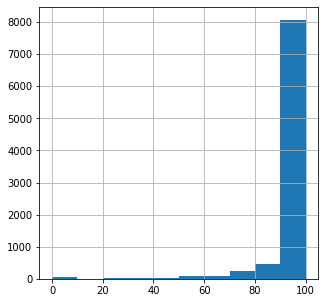

In [48]:
#Puedo ver la distribución también con un histograma
house_madrid['host_response_rate'].hist(figsize=(5,5));

In [49]:
# Los agrupo en 4 categorías
house_madrid['host_response_rate'] = pd.cut(house_madrid['host_response_rate'], 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Convierto a cadena
house_madrid['host_response_rate'] = house_madrid['host_response_rate'].astype('str')

# Sustituyo los null por 'unknown'
house_madrid['host_response_rate'].replace('nan', 'unknown', inplace=True)

# 
house_madrid['host_response_rate'].value_counts()

100%       6464
90-99%     1275
unknown    1186
50-89%     1150
0-49%       204
Name: host_response_rate, dtype: int64

La transformo en una variable de tipo categórico

### host_is_superhost

Esta característica representa si el host está identificado como superhost o no. Es de tipo booleano.
Voy a mirar si el valor "true"(1) es menos del 10% de viviendas o más del 90%. Si es así elimino la característica ya que no afectaría al precio

In [50]:
house_madrid ['host_is_superhost'].value_counts()

0.0    7601
1.0    2672
Name: host_is_superhost, dtype: int64

Si tuviera algún valor nulo, le asigno el valor más frecuente que es 0

In [0]:
house_madrid ['host_is_superhost'] [house_madrid ['host_is_superhost'].isnull()]=0

In [52]:
if (house_madrid['host_is_superhost'].sum() < len(house_madrid)/10):
  print ("Valor menos del 10%")
elif  ( house_madrid['host_is_superhost'].sum() > len(house_madrid)*90/100):
  print ("Valor mayor del 90%")
else:
  print ("No elimino")  

No elimino


### host_listings_count

Esta característica representa el número de viviendas que tiene el anfitrión en total y es de tipo continuo.



In [0]:
house_madrid ['host_listings_count'] = pd.to_numeric(house_madrid ['host_listings_count']) 

Voy a comprobar si tengo valores nulos

In [54]:
print("Valores nulos:", house_madrid['host_listings_count'].isna().sum())
print(f"Proporcion: {round((house_madrid['host_listings_count'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 6
Proporcion: 0.1%


Miro la mediana y media de esta característica

In [55]:
print("Media Host Listings Count:", round(house_madrid['host_listings_count'].mean(),0))
print("Mediana Host Listings Count:", house_madrid['host_listings_count'].median())


Media Host Listings Count: 17.0
Mediana Host Listings Count: 2.0


Los 6 valores nulos los sustiuiré  por la mediana una vez haga tratamiento de outliers

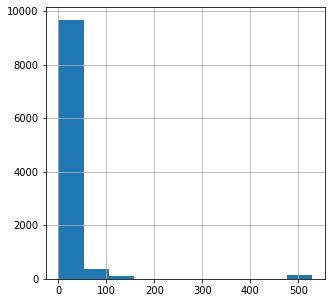

In [56]:
#Puedo ver la distribución también con un histograma
house_madrid['host_listings_count'].hist(figsize=(5,5));

### host_has_profile_pic
Esta característica representa si el host tiene foto en su profile o no. Es de tipo booleano. Voy a mirar si el valor "true"(1) es menos del 10% de viviendas o más del 90%. Si es así elimino la característica ya que no afectaría al precio

In [57]:
house_madrid ['host_has_profile_pic'].value_counts()

1.0    10258
0.0       15
Name: host_has_profile_pic, dtype: int64

In [58]:
if (house_madrid['host_has_profile_pic'].sum() < len(house_madrid)/10):
  print ("Valor menos del 10%")
elif  ( house_madrid['host_has_profile_pic'].sum() > len(house_madrid)*90/100):
  print ("Valor mayor del 90%")
else:
  print ("No elimino") 

Valor mayor del 90%


Veo que el valor está a true en más de un 90% de las viviendas por lo que no me va a aportar valor para el precio así que elimino esta característica

In [0]:
house_madrid.drop (['host_has_profile_pic'], axis=1, inplace=True)

### host_identity_verified
Esta característica representa si la identidad del host ha sido verificada. Es de tipo booleano. Voy a mirar si el valor "true"(1) es menos del 10% de viviendas o más del 90%. Si es así elimino la característica ya que no afectaría al precio

In [60]:
house_madrid ['host_identity_verified'].value_counts()

0.0    6623
1.0    3650
Name: host_identity_verified, dtype: int64

In [61]:
if (house_madrid['host_identity_verified'].sum() < len(house_madrid)/10):
  print ("Valor menos del 10%")
elif  ( house_madrid['host_identity_verified'].sum() > len(house_madrid)*90/100):
  print ("Valor mayor del 90%")
else:
  print ("No elimino") 

No elimino


Caso de que haya algún valor nan le doy el valos más frecuente que es 0

In [0]:
house_madrid ['host_identity_verified'] [house_madrid ['host_identity_verified'].isnull()]=0

### neighbourhood_cleansed

Esta característica representa el barrio de Madrid en el que está la vivienda y es de tipo categórico
Voy a comprobar los valores que tiene. Al principio ya comprobé que no tenía nulos. De todas formas para el caso de presentación de nuevos valores si hubiera nulos los elimino

In [0]:
house_madrid.dropna(subset=['neighbourhood_cleansed'], inplace=True) 

In [64]:
house_madrid ['neighbourhood_cleansed'].value_counts()

Embajadores      1536
Universidad      1067
Palacio           857
Sol               791
Justicia          666
                 ... 
Amposta             3
Ambroz              3
Fuentelareina       2
El Plantío          2
El Pardo            2
Name: neighbourhood_cleansed, Length: 125, dtype: int64

Tengo 125 categorías. 

Son demasiadas categorias y además en las muestras de test o nuevas muestras pueden venir nuevos barrios que aquí no aparezcan. Lo que voy a hacer es quedarme con los 20 más frecuentes y el resto los agrupo como "Otro Barrio". Para las muestras de test o nuevas muestras compararé con los 20 más frecuentes de train y pondré "Otro Barrio" caso que no coincidan

In [65]:
barrios_frecuentes =  (list (house_madrid ['neighbourhood_cleansed'].value_counts().index [0:20]))
barrios_frecuentes


['Embajadores',
 'Universidad',
 'Palacio',
 'Sol',
 'Justicia',
 'Cortes',
 'Palos de Moguer',
 'Trafalgar',
 'Goya',
 'Puerta del Angel',
 'Argüelles',
 'Recoletos',
 'Pacífico',
 'Guindalera',
 'Delicias',
 'Cuatro Caminos',
 'San Diego',
 'Ibiza',
 'Acacias',
 'Numancia']

In [0]:
house_madrid['neighbourhood_cleansed'] [~house_madrid['neighbourhood_cleansed'].isin(barrios_frecuentes)]='Otro_Barrio'

In [67]:
house_madrid ['neighbourhood_cleansed'].value_counts()

Otro_Barrio         3082
Embajadores         1536
Universidad         1067
Palacio              857
Sol                  791
Justicia             666
Cortes               553
Palos de Moguer      193
Trafalgar            182
Goya                 153
Puerta del Angel     149
Argüelles            146
Recoletos            144
Pacífico             113
Guindalera           102
Delicias              98
Cuatro Caminos        93
San Diego             90
Ibiza                 89
Acacias               88
Numancia              87
Name: neighbourhood_cleansed, dtype: int64

### is_location_exact
Esta característica representa si la localización es exacta. Es de tipo booleano. Voy a mirar si el valor "true"(1) es menos del 10% de viviendas o más del 90%. Si es así elimino la característica ya que no afectaría al precio

In [68]:
house_madrid ['is_location_exact'].value_counts()

1    7185
0    3094
Name: is_location_exact, dtype: int64

In [69]:
if (house_madrid['is_location_exact'].sum() < len(house_madrid)/10):
  print ("Valor menos del 10%")
elif  ( house_madrid['is_location_exact'].sum() > len(house_madrid)*90/100):
  print ("Valor mayor del 90%")
else:
  print ("No elimino")

No elimino


Si hay valores nulos le asigno el más frecuente que es 1

In [0]:
house_madrid ['is_location_exact'] [house_madrid ['is_location_exact'].isnull()]=1

### property_type

Esta característica representa el tipo de propiedad y es de tipo categórico. Al principio ya comprobé que no tenía nulos la muestra de train.
Veo sus posibles valores

In [71]:
house_madrid ['property_type'].value_counts()

Apartment             8735
Loft                   407
House                  402
Condominium            297
Serviced apartment     161
                      ... 
Villa                    2
Cave                     1
Tent                     1
Bungalow                 1
Hut                      1
Name: property_type, Length: 24, dtype: int64

Veo que la mayoritaria es "Apartment" por tanto caso de que aparezcan datos nuevos y tengan un null en esta característica les asociaré "Apartment"

In [0]:
house_madrid ['property_type'] [house_madrid ['property_type'].isnull()]="Apartment"

Revisando las categorias se ve que se puede agrupar ya que hay algunas que tienen muy pocas viviendas. Podemos usar como categorías: Apartment, House y Other. El resto las vamos a agrupar en cada una de estas categorías

In [73]:
tipos_propiedades =  (list (house_madrid ['property_type'].value_counts().index [:]))
tipos_propiedades     #Lo voy a usar despues en test

['Apartment',
 'Loft',
 'House',
 'Condominium',
 'Serviced apartment',
 'Hostel',
 'Bed and breakfast',
 'Boutique hotel',
 'Townhouse',
 'Guest suite',
 'Other',
 'Guesthouse',
 'Chalet',
 'Hotel',
 'Casa particular (Cuba)',
 'Tiny house',
 'Dome house',
 'Aparthotel',
 'Camper/RV',
 'Villa',
 'Cave',
 'Tent',
 'Bungalow',
 'Hut']

In [0]:
# Sustituyo categorias por House ó Aparment ó Other
house_madrid ['property_type'].replace({
    'Condominium': 'Other',
    'Bed and breakfast': 'Other',  
    'Loft': 'Apartment',
    'Dorm': 'Other',
    'Guesthouse': 'Other',
    'Chalet': 'House',
    'Hostel':  'Other',
    'Serviced apartment': 'Apartment',  
    'Townhouse': 'House',
    'Boutique hotel': 'Other',
    'Villa': 'House',
    'Earth House': 'House',
    'Guest suite': 'Other',
    'Casa particular': 'House',
    'Camper/RV': 'Other',
    'Boat': 'Other',
    'Tent': 'Other',
    'Timeshare': 'Other',  
    'Bungalow': 'House',
    'Hotel': 'Other',
    'Casa particular (Cuba)': 'House',
    'Dome house': 'House',
    'Aparthotel': 'Other',
    'Tiny house': 'House',
    'Hut': 'Other',
    'Cave': 'Other',

    
    }, inplace=True)

In [75]:
house_madrid ['property_type'].value_counts()

Apartment    9303
Other         527
House         449
Name: property_type, dtype: int64

Las tengo agrupadas en 3 categorías 

### room_type

Esta característica representa el tipo de vivienda y es de tipo categórico. Al principio ya comprobé que no tenía nulos. Veamos sus posibles valores:

In [76]:
house_madrid ['room_type'].value_counts()

Entire home/apt    6812
Private room       3197
Hotel room          173
Shared room          97
Name: room_type, dtype: int64

En este caso a los valores nulos si los hubiera en nuevos datos les voy a asignar la categoría mas frecuente

In [0]:
house_madrid ['room_type'] [house_madrid ['room_type'].isnull()]="Entire home/apt"

### accommodates

Es una característica de tipo numérico que representa el número de personas que se pueden alojar en la propiedad. Ya se vio al principio que no tenía valores nulos

In [0]:
house_madrid ['accommodates'] = pd.to_numeric(house_madrid ['accommodates']) 

In [79]:
house_madrid ['accommodates'].value_counts()

2     3374
4     2643
1     1141
6     1004
3      949
5      574
8      246
7      153
10      78
12      40
9       25
16      21
11      11
14       8
13       7
15       5
Name: accommodates, dtype: int64

Miro la mediana y media de esta característica

In [80]:
print("Media Accommodates:", round(house_madrid['accommodates'].mean(),0))
print("Mediana Accommodates:", house_madrid['accommodates'].median())
    

Media Accommodates: 3.0
Mediana Accommodates: 3.0


Caso de que hubiera valores nulos en nuevos datos les asigno la mediana

In [0]:
mediana_accomodates = house_madrid['accommodates'].median()  #lo guardo para usarlo después en test
house_madrid['accommodates'].fillna(house_madrid['accommodates'].median(), inplace=True)

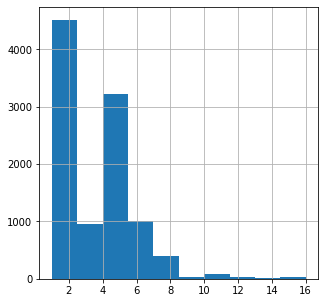

In [82]:
#Puedo ver la distribución también con un histograma
house_madrid['accommodates'].hist(figsize=(5,5));

### bathrooms

Variable de tipo numérico que representa el número de cuartos de baño de la vivienda. Al principio vi que tenía algunos valores nulos:

In [0]:
house_madrid ['bathrooms'] = pd.to_numeric(house_madrid ['bathrooms']) 

In [84]:
print("Valores nulos:", house_madrid['bathrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['bathrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 3
Proporcion: 0.0%


Voy a sustituir los valores nulos por la mediana

In [85]:
print("Media Bathrooms:", round(house_madrid['bathrooms'].mean(),0))
print("Mediana Bathrooms:", house_madrid['bathrooms'].median())

Media Bathrooms: 1.0
Mediana Bathrooms: 1.0


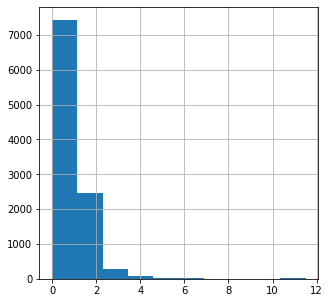

In [86]:
#Puedo ver la distribución también con un histograma
house_madrid['bathrooms'].hist(figsize=(5,5));

In [0]:
mediana_bathrooms = house_madrid['bathrooms'].median()  #Lo guardo para usarlo después en test
house_madrid['bathrooms'].fillna(house_madrid['bathrooms'].median(), inplace=True)

In [88]:
#Compruebo que ya no tengo nulos
print("Valores nulos:", house_madrid['bathrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['bathrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


### bedrooms

Variable de tipo numérico que representa el número de dormitorios de la vivienda. Al principio vi que tenía algunos valores nulos:

In [0]:
house_madrid ['bedrooms'] = pd.to_numeric(house_madrid ['bedrooms']) 

In [90]:
print("Valores nulos:", house_madrid['bedrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['bedrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 1
Proporcion: 0.0%


Voy a sustituir los valores nulos por la mediana

In [91]:
print("Media Bedrooms:", round(house_madrid['bedrooms'].mean(),0))
print("Mediana Bedrooms:", house_madrid['bedrooms'].median())

Media Bedrooms: 1.0
Mediana Bedrooms: 1.0


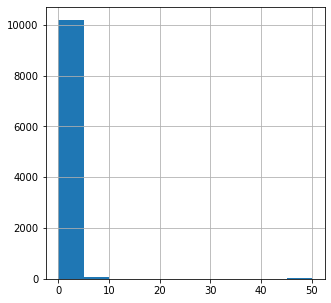

In [92]:
#Puedo ver la distribución también con un histograma
house_madrid['bedrooms'].hist(figsize=(5,5));

In [0]:
mediana_bedrooms = house_madrid['bedrooms'].median()    #Lo guardo para usarlo después en test
house_madrid['bedrooms'].fillna(house_madrid['bedrooms'].median(), inplace=True)

In [94]:
#Compruebo que ya no tengo nulos
print("Valores nulos:", house_madrid['bedrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['bedrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


### beds

Variable de tipo numérico que representa el número de camas de la vivienda. Al principio vi que tenía algunos valores nulos:

In [0]:
house_madrid ['beds'] = pd.to_numeric(house_madrid ['beds']) 

In [96]:
print("Valores nulos:", house_madrid['beds'].isna().sum())
print(f"Proporcion: {round((house_madrid ['beds'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 3
Proporcion: 0.0%


Voy a sustituir los valores nulos por la mediana

In [97]:
print("Media Beds:", round(house_madrid['beds'].mean(),0))
print("Mediana Beds:", house_madrid['beds'].median())

Media Beds: 2.0
Mediana Beds: 2.0


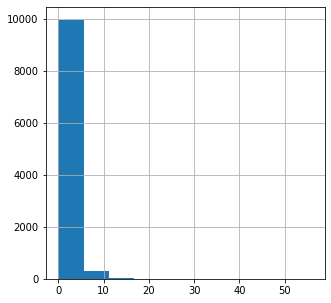

In [98]:
#Puedo ver la distribución también con un histograma
house_madrid['beds'].hist(figsize=(5,5));

In [0]:
mediana_beds = house_madrid['beds'].median()   #Lo guardo para usarlo después en test
house_madrid['beds'].fillna(house_madrid['beds'].median(), inplace=True)

In [100]:
#Compruebo que ya no tengo nulos
print("Valores nulos:", house_madrid['beds'].isna().sum())
print(f"Proporcion: {round((house_madrid ['beds'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


### bed_type

Esta característica representa el tipo cama y es de tipo categórico. Vi al principio que no tenía valores nulos

Voy a comprobar los valores que tiene:


In [101]:
house_madrid ['bed_type'].value_counts()

Real Bed         10174
Pull-out Sofa       89
Futon                8
Couch                6
Airbed               2
Name: bed_type, dtype: int64

La mayoria de las viviendas tiene el mismo tipo de capa "Real Bed", hay muy pocas que tenga otro tipo de cama por lo que esta característica no representa ninguna ventaja y no va a influir en el precio, así que la elimino

In [0]:
house_madrid.drop('bed_type', axis=1, inplace=True)

In [103]:
house_madrid.head(5)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   
2     70  35532108  https://a0.muscache.com/im/pictures/9770cbc1-5...   
3     58  16451687  https://a0.muscache.com/im/pictures/8b1a8acc-9...   
4     70  29274213  https://a0.muscache.com/im/pictures/11253de9-5...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   
2     within an hour               100%                0.0   
3     within an hour             90-99%                0.0   
4     within an hour               100%                1.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   
2                 14.0                     0.0                 Cortes   
3                 78.0                     0.0                 Cortes   
4                  1.0                     0.0            Otro_Barrio   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   
2                  1     Apartment     Private room             3        1.0   
3                  1     Apartment  Entire home/apt             4        1.0   
4                  1         House  Entire home/apt             4        1.0   

   bedrooms  beds                                          amenities  \
0       1.0   1.0  {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...   
1       1.0   1.0  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
2       1.0   3.0  {TV,Wifi,Washer,Dryer,Essentials,Shampoo,Hange...   
3       1.0   2.0  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
4       2.0   3.0  {TV,Wifi,"Air conditioning",Pool,Kitchen,Eleva...   

  security_deposit cleaning_fee  guests_included extra_people  minimum_nights  \
0              NaN       $20.00                1        $5.00               1   
1          $100.00       $40.00                1       $10.00               1   
2            $0.00        $0.00                1        $0.00               1   
3            $0.00       $25.00                1        $0.00               1   
4          $100.00       $50.00                2       $12.00               3   

   maximum_nights calendar_updated  has_availability  availability_30  \
0            1125            today                 1                8   
1            1125       4 days ago                 1                5   
2            1125        yesterday                 1               10   
3              28        yesterday                 1               16   
4            1000        yesterday                 1               29   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               28               58                58                  8   
1               21               21                21                 15   
2               33               63               333                  6   
3               38               64                64                152   
4               51               75                75                 29   

   number_of_reviews_ltm first_review last_review  review_scores_rating  \
0                      8   2019-09-13  2019-10-26                  98.0   
1                     15   2018-12-29  2019-09-03                  83.0   
2                      6   2019-06-12  2019-10-28                  93.0   
3                     69   2016-12-27  2019-10-22                  80.0   
4                     29   2019-02-24  2019-10-26                  97.0   

   r

### amenities

Esta columna contiene un listado de comodidades de la vivienda

In [104]:
#Esto es un ejemplo de como vienen listadas esas comodidades
house_madrid ['amenities'][:1].values

array(['{TV,Wifi,"Air conditioning",Kitchen,"Smoking allowed","Pets allowed",Heating,"Suitable for events",Washer,Essentials,Hangers,Iron,"Hot water","Well-lit path to entrance","No stairs or steps to enter"}'],
      dtype=object)

Vi también al principio que no tenía valores nulos:

In [105]:
print("Valores nulos:", house_madrid['amenities'].isna().sum())
print(f"Proporcion: {round((house_madrid ['amenities'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Por si hubiera valores nulos como voy a hacer un tratamiento de cadenas de caracteres a esos valores nulos les voy a asignar la cadena "nada"

In [0]:
house_madrid['amenities'].fillna("nada", inplace=True)

In [107]:
#Creo un conjunto con las "amenities" que me encuentro en el dataset
amenities_list = list(house_madrid ['amenities'])
amenities_list_string = "".join(str(amenities_list))
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', '')
amenities_list_string = amenities_list_string.replace("'", '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine',
 'Essentials',

In [0]:
#Quito el elemento vacio del conjunto
amenities_set.discard('')

In [109]:
amenities_set

{'24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine',
 'Essentials',
 'Et

In [0]:
#Añado al dataset una columna por cada Amenities. Después eliminaré algunas
for amenities in amenities_set:
    house_madrid.loc[house_madrid['amenities'].str.contains(amenities), amenities] = 1
    
    

In [0]:
indice = house_madrid.columns.get_loc("Dias_activo")+1

In [0]:
# Los nulos de las nuevas columnas que he añadido los sustituyo por 0 

cols_to_replace_nulls = house_madrid.iloc[:,indice:].columns
house_madrid[cols_to_replace_nulls] = house_madrid[cols_to_replace_nulls].fillna(0)

In [113]:
house_madrid.head(2)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   

   bedrooms  beds                                          amenities  \
0       1.0   1.0  {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...   
1       1.0   1.0  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   

  security_deposit cleaning_fee  guests_included extra_people  minimum_nights  \
0              NaN       $20.00                1        $5.00               1   
1          $100.00       $40.00                1       $10.00               1   

   maximum_nights calendar_updated  has_availability  availability_30  \
0            1125            today                 1                8   
1            1125       4 days ago                 1                5   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               28               58                58                  8   
1               21               21                21                 15   

   number_of_reviews_ltm first_review last_review  review_scores_rating  \
0                      8   2019-09-13  2019-10-26                  98.0   
1                     15   2018-12-29  2019-09-03                  83.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                     9.0                        9.0                    9.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                          9.0                    10.0                  9.0   

   requires_license  instant_bookable  is_business_travel_ready  \
0                 1                 1                         0   
1                 1                 1                         0   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              0   
1                     moderate                              0   

   require_guest_phone_verification  reviews_per_month  sentiment  \
0                                 0               4.14   0.156667   
1                                 0               1.42   0.287834   

   Topic_general  Topic_descripcion  Topic_atracciones  Topic_servicios  \
0        0.66538           0.037547           0.013976         0.061318   
1        0.00000           0.376716           0.144895         0.424510   

   Topic_transporte  dist_to_station  dist_to_parking  dist_to_museo1  \
0          0.221778         0.340306         1.329963        2.982506   
1          0.052503         0.235877         0.172652        1.788606   

   dist_to_museo2  dist_to_museo3  dist_to_museo4  dist_to_museo5  \
0        1.287996         2.11282        4.297456        1.877001   
1        0.104551         0.88969        3.075004        0.695663   

   dist_to_atraccion1  dist_to_atraccion2  dist_to_atraccion3  \
0            2.003310            2.288166            2.084649   
1            0.866448            1.337961            1.165666   

   dist_to_atraccion4  dist_to_atraccion5  Dias_activo  \
0        

Puedo reducir el número de características nuevas añadidas eliminando aquellas comodidades que añadan poca información o que no sea útiles para diferenciar las viviendas. Las comodidades que contenga menos del 10% de viviendas se podrían borrar


In [114]:
infrequent_amenities = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() < len(house_madrid)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)



['Bathroom essentials', 'Bathtub with bath chair', 'Terrace', 'Window guards', 'Smart TV', 'Accessible-height toilet', 'Standing valet', 'Amazon Echo', 'Cat(s)', 'Gym', 'Ceiling fan', 'Self check-in', 'Convection oven', 'Outdoor seating', 'toilet', 'Central air conditioning', 'Wide clearance to shower', 'Private bathroom', 'Steam oven', 'Bathtub', 'Espresso machine', 'HBO GO', 'Private living room', 'Single level home', 'Bidet', 'Waterfront', '24-hour check-in', 'Electric profiling bed', 'Netflix', 'Bath towel', 'Pillow-top mattress', 'Baby bath', 'High chair', 'Memory foam mattress', 'Touchless faucets', 'Stair gates', 'Fixed grab bars for toilet', 'Indoor fireplace', 'Heated towel rack', 'Wide doorway to guest bathroom', 'Disabled parking spot', 'Body soap', 'Breakfast table', 'Ground floor access', 'Babysitter recommendations', 'Heated floors', 'Full kitchen', 'Pocket wifi', 'Building staff', 'Hot tub', 'Toilet paper', 'DVD player', 'translation missing: en.hosting_amenity_49', 'Pro

In [0]:
# Elimino las menos frecuentes
house_madrid.drop(infrequent_amenities, axis=1, inplace=True)



In [116]:
#Las "amenities" que quedan
indice = house_madrid.columns.get_loc("Dias_activo")+1
house_madrid.columns[indice:]

Index(['Luggage dropoff allowed', 'TV', 'Room-darkening shades',
       'Paid parking on premises', 'Microwave', 'Wifi', 'Smoking allowed',
       'Heating', 'Laptop friendly workspace', 'Dryer', 'Host greets you',
       'Wide entrance for guests', 'Carbon monoxide detector', 'Dishwasher',
       'Coffee maker', 'Oven', 'Cooking basics', 'Hair dryer', 'Washer',
       'Stove', 'Patio or balcony', 'Elevator', 'Hot water',
       'Fire extinguisher', 'Paid parking off premises', 'Family/kid friendly',
       'Cable TV', 'Air conditioning', 'Private entrance',
       'Well-lit path to entrance',
       'translation missing: en.hosting_amenity_50', 'Pets allowed',
       'Refrigerator', 'Extra pillows and blankets', 'Hangers',
       'Dishes and silverware', 'Wide entrance', 'Long term stays allowed',
       'Internet', 'Smoke detector', 'Bed linens', 'Iron', 'Kitchen',
       'Lock on bedroom door', 'Buzzer/wireless intercom', 'First aid kit',
       'Free street parking', 'Essentials', 

Voy a comprobar los valores de cada una de ellas ya que si hay un alto porcentaje del valor 1 las puedo eliminar. Voy a poner mas de un 90%

In [0]:
indice = house_madrid.columns.get_loc("Dias_activo")+1

In [118]:
frequent_amenities = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() > len(house_madrid)*90/100:
        frequent_amenities.append(col)
print(frequent_amenities)

['Wifi', 'Heating', 'Kitchen', 'Essentials']


Elimino las más frecuentes >90%

In [0]:
house_madrid.drop(frequent_amenities, axis=1, inplace=True)

In [120]:
house_madrid.head(2)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   

   bedrooms  beds                                          amenities  \
0       1.0   1.0  {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...   
1       1.0   1.0  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   

  security_deposit cleaning_fee  guests_included extra_people  minimum_nights  \
0              NaN       $20.00                1        $5.00               1   
1          $100.00       $40.00                1       $10.00               1   

   maximum_nights calendar_updated  has_availability  availability_30  \
0            1125            today                 1                8   
1            1125       4 days ago                 1                5   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               28               58                58                  8   
1               21               21                21                 15   

   number_of_reviews_ltm first_review last_review  review_scores_rating  \
0                      8   2019-09-13  2019-10-26                  98.0   
1                     15   2018-12-29  2019-09-03                  83.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                     9.0                        9.0                    9.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                          9.0                    10.0                  9.0   

   requires_license  instant_bookable  is_business_travel_ready  \
0                 1                 1                         0   
1                 1                 1                         0   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              0   
1                     moderate                              0   

   require_guest_phone_verification  reviews_per_month  sentiment  \
0                                 0               4.14   0.156667   
1                                 0               1.42   0.287834   

   Topic_general  Topic_descripcion  Topic_atracciones  Topic_servicios  \
0        0.66538           0.037547           0.013976         0.061318   
1        0.00000           0.376716           0.144895         0.424510   

   Topic_transporte  dist_to_station  dist_to_parking  dist_to_museo1  \
0          0.221778         0.340306         1.329963        2.982506   
1          0.052503         0.235877         0.172652        1.788606   

   dist_to_museo2  dist_to_museo3  dist_to_museo4  dist_to_museo5  \
0        1.287996         2.11282        4.297456        1.877001   
1        0.104551         0.88969        3.075004        0.695663   

   dist_to_atraccion1  dist_to_atraccion2  dist_to_atraccion3  \
0            2.003310            2.288166            2.084649   
1            0.866448            1.337961            1.165666   

   dist_to_atraccion4  dist_to_atraccion5  Dias_activo  \
0        

Veo también que hay amenities que comienzan por "translation missing: " que se ve que debe ser algún error del scraper. Esas las voy a eliminar también

In [0]:
indice = house_madrid.columns.get_loc("Dias_activo")+1

In [122]:
translation_missing = []
for col in house_madrid.iloc[:,indice:].columns:
    if 'translation missing' in col:
        translation_missing.append(col)
print(translation_missing)

['translation missing: en.hosting_amenity_50']


In [0]:
house_madrid.drop(translation_missing, axis=1, inplace=True)

In [124]:
#Las "amenities" que quedan
indice = house_madrid.columns.get_loc("Dias_activo")+1
amenities_def = house_madrid.columns[indice:]
amenities_def   #Lo usaré después para train

Index(['Luggage dropoff allowed', 'TV', 'Room-darkening shades',
       'Paid parking on premises', 'Microwave', 'Smoking allowed',
       'Laptop friendly workspace', 'Dryer', 'Host greets you',
       'Wide entrance for guests', 'Carbon monoxide detector', 'Dishwasher',
       'Coffee maker', 'Oven', 'Cooking basics', 'Hair dryer', 'Washer',
       'Stove', 'Patio or balcony', 'Elevator', 'Hot water',
       'Fire extinguisher', 'Paid parking off premises', 'Family/kid friendly',
       'Cable TV', 'Air conditioning', 'Private entrance',
       'Well-lit path to entrance', 'Pets allowed', 'Refrigerator',
       'Extra pillows and blankets', 'Hangers', 'Dishes and silverware',
       'Wide entrance', 'Long term stays allowed', 'Internet',
       'Smoke detector', 'Bed linens', 'Iron', 'Lock on bedroom door',
       'Buzzer/wireless intercom', 'First aid kit', 'Free street parking',
       'Breakfast', 'Crib', 'Shampoo', 'No stairs or steps to enter',
       'Wide hallways'],
      dty

In [0]:
#Finalmente elimino la columna original "Amenities"

house_madrid.drop('amenities', axis=1, inplace=True)

In [126]:
house_madrid.head(2)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   

   bedrooms  beds security_deposit cleaning_fee  guests_included extra_people  \
0       1.0   1.0              NaN       $20.00                1        $5.00   
1       1.0   1.0          $100.00       $40.00                1       $10.00   

   minimum_nights  maximum_nights calendar_updated  has_availability  \
0               1            1125            today                 1   
1               1            1125       4 days ago                 1   

   availability_30  availability_60  availability_90  availability_365  \
0                8               28               58                58   
1                5               21               21                21   

   number_of_reviews  number_of_reviews_ltm first_review last_review  \
0                  8                      8   2019-09-13  2019-10-26   
1                 15                     15   2018-12-29  2019-09-03   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  98.0                    10.0                       10.0   
1                  83.0                     9.0                        9.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                    10.0   
1                    9.0                          9.0                    10.0   

   review_scores_value  requires_license  instant_bookable  \
0                 10.0                 1                 1   
1                  9.0                 1                 1   

   is_business_travel_ready          cancellation_policy  \
0                         0  strict_14_with_grace_period   
1                         0                     moderate   

   require_guest_profile_picture  require_guest_phone_verification  \
0                              0                                 0   
1                              0                                 0   

   reviews_per_month  sentiment  Topic_general  Topic_descripcion  \
0               4.14   0.156667        0.66538           0.037547   
1               1.42   0.287834        0.00000           0.376716   

   Topic_atracciones  Topic_servicios  Topic_transporte  dist_to_station  \
0           0.013976         0.061318          0.221778         0.340306   
1           0.144895         0.424510          0.052503         0.235877   

   dist_to_parking  dist_to_museo1  dist_to_museo2  dist_to_museo3  \
0         1.329963        2.982506        1.287996         2.11282   
1         0.172652        1.788606        0.104551         0.88969   

   dist_to_museo4  dist_to_museo5  dist_to_atraccion1  dist_to_atraccion2  \
0        4.297456        1.877001            2.003310            2.288166   
1        3.075004        0.695663            0.866448            1.337961   

   dist_to_atraccion3  dist_to_atraccion4  dist_to_atraccion5  Dias_activo  \
0            2.084649            2.619620            2.867330        846.0   
1            1.165666            1.435947            2.001897       1733.0   

   Luggage dropoff allowed   TV  Room-darkening shades  \
0  

### security_deposit

Representa la cantidad que se requiere como deposito. Voy a quitarle el signo $, los dos decimales y la paso a tipo numérico. Vimos al principio que tenía valores nulos:

In [0]:
house_madrid.security_deposit = house_madrid.security_deposit.str[1:-3]
house_madrid.security_deposit = house_madrid.security_deposit.str.replace(",", "")
house_madrid.security_deposit.fillna(0, inplace=True)  #Los valores nulos los pongo a 0 al ser un precio
house_madrid.security_deposit = house_madrid.security_deposit.astype('int64')

In [128]:
print("Valores nulos:", house_madrid['security_deposit'].isna().sum())
print(f"Proporcion: {round((house_madrid ['security_deposit'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


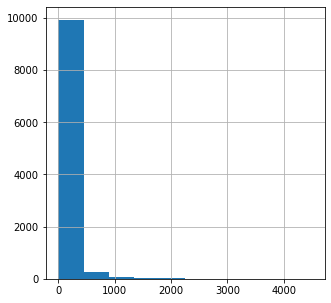

In [129]:
#Puedo ver la distribución también con un histograma
house_madrid['security_deposit'].hist(figsize=(5,5));

In [130]:
house_madrid.head(2)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   

   bedrooms  beds  security_deposit cleaning_fee  guests_included  \
0       1.0   1.0                 0       $20.00                1   
1       1.0   1.0               100       $40.00                1   

  extra_people  minimum_nights  maximum_nights calendar_updated  \
0        $5.00               1            1125            today   
1       $10.00               1            1125       4 days ago   

   has_availability  availability_30  availability_60  availability_90  \
0                 1                8               28               58   
1                 1                5               21               21   

   availability_365  number_of_reviews  number_of_reviews_ltm first_review  \
0                58                  8                      8   2019-09-13   
1                21                 15                     15   2018-12-29   

  last_review  review_scores_rating  review_scores_accuracy  \
0  2019-10-26                  98.0                    10.0   
1  2019-09-03                  83.0                     9.0   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                        9.0                    9.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                          9.0                    10.0                  9.0   

   requires_license  instant_bookable  is_business_travel_ready  \
0                 1                 1                         0   
1                 1                 1                         0   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              0   
1                     moderate                              0   

   require_guest_phone_verification  reviews_per_month  sentiment  \
0                                 0               4.14   0.156667   
1                                 0               1.42   0.287834   

   Topic_general  Topic_descripcion  Topic_atracciones  Topic_servicios  \
0        0.66538           0.037547           0.013976         0.061318   
1        0.00000           0.376716           0.144895         0.424510   

   Topic_transporte  dist_to_station  dist_to_parking  dist_to_museo1  \
0          0.221778         0.340306         1.329963        2.982506   
1          0.052503         0.235877         0.172652        1.788606   

   dist_to_museo2  dist_to_museo3  dist_to_museo4  dist_to_museo5  \
0        1.287996         2.11282        4.297456        1.877001   
1        0.104551         0.88969        3.075004        0.695663   

   dist_to_atraccion1  dist_to_atraccion2  dist_to_atraccion3  \
0            2.003310            2.288166            2.084649   
1            0.866448            1.337961            1.165666   

   dist_to_atraccion4  dist_to_atraccion5  Dias_activo  \
0            2.619620            2.867330        846.0   
1            1.435947            2.001897       1733.0   

   Luggage dropoff allowed   TV  Room-dark

### cleaning_fee	

Representa la tasa que habría que pagar por limpieza. Voy a quitarle el signo $, los dos decimales y la paso a tipo numérico. Vimos al principio que tenía valores nulos:

In [0]:
house_madrid.cleaning_fee = house_madrid.cleaning_fee.str[1:-3]
house_madrid.cleaning_fee = house_madrid.cleaning_fee.str.replace(",", "")
house_madrid.cleaning_fee.fillna(0, inplace=True)   #Los valores nulos los sustituyo por 0 al ser un precio
house_madrid.cleaning_fee = house_madrid.cleaning_fee.astype('int64')

In [132]:
print("Valores nulos:", house_madrid['cleaning_fee'].isna().sum())
print(f"Proporcion: {round((house_madrid ['cleaning_fee'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


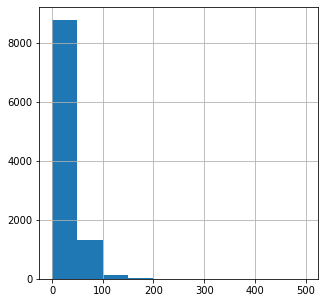

In [133]:
#Puedo ver la distribución también con un histograma
house_madrid['cleaning_fee'].hist(figsize=(5,5));

### guests_included

Representa el número de invitados incluidos. Es de tipo int y no tiene valores nulos

In [0]:
house_madrid ['guests_included'] = pd.to_numeric(house_madrid ['guests_included']) 

In [135]:
print("Valores nulos:", house_madrid['guests_included'].isna().sum())
print(f"Proporcion: {round((house_madrid ['guests_included'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana

In [136]:
print("Media Guests Included:", round(house_madrid['guests_included'].mean(),0))
print("Mediana Guests Included:", house_madrid['guests_included'].median())

Media Guests Included: 2.0
Mediana Guests Included: 1.0


In [0]:
mediana_guests_included = house_madrid['guests_included'].median()  #lo guardo para usarlo después en test
house_madrid['guests_included'].fillna(house_madrid['guests_included'].median(), inplace=True)

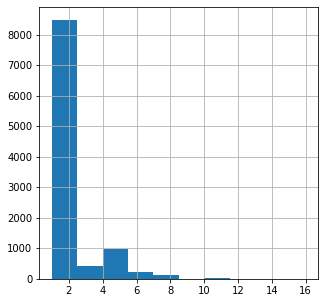

In [138]:
#Puedo ver la distribución también con un histograma
house_madrid['guests_included'].hist(figsize=(5,5));

### extra_people

Representa el añadido de precio por persona extra. Voy a quitarle el signo $, los dos decimales y la paso a tipo numérico. Vimos al principio que tenía valores nulos:


In [0]:
house_madrid.extra_people = house_madrid.extra_people.str[1:-3]
house_madrid.extra_people = house_madrid.extra_people.str.replace(",", "")
house_madrid.extra_people.fillna(0, inplace=True)  #Los nulos los pongo como 0
house_madrid.extra_people = house_madrid.extra_people.astype('int64')

In [140]:
print("Valores nulos:", house_madrid['extra_people'].isna().sum())
print(f"Proporcion: {round((house_madrid ['extra_people'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


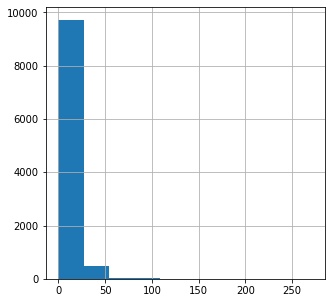

In [141]:
#Puedo ver la distribución también con un histograma
house_madrid['extra_people'].hist(figsize=(5,5));

### minimum_nights

Representa el mínimo número de noches para la estancia. Es de tipo int y no tiene valores nulos.


In [0]:
house_madrid ['minimum_nights'] = pd.to_numeric(house_madrid ['minimum_nights']) 

In [143]:
print("Valores nulos:", house_madrid['minimum_nights'].isna().sum())
print(f"Proporcion: {round((house_madrid ['minimum_nights'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana tras el tratamiento de outliers

In [144]:
print("Media Minimum Nights:", round(house_madrid['minimum_nights'].mean(),0))
print("Mediana Minimum Nights:", house_madrid['minimum_nights'].median())

Media Minimum Nights: 4.0
Mediana Minimum Nights: 2.0


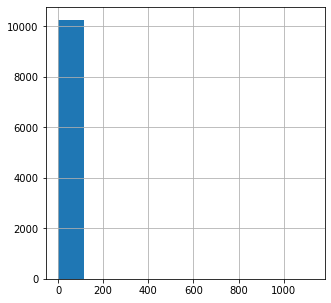

In [145]:
#Puedo ver la distribución también con un histograma
house_madrid['minimum_nights'].hist(figsize=(5,5));

### maximum_nights

El número máximo de noches que puede durar la estancia. Es de tipo int y no tiene valores nulos

In [0]:
house_madrid ['maximum_nights'] = pd.to_numeric(house_madrid ['maximum_nights']) 

In [147]:
print("Valores nulos:", house_madrid['maximum_nights'].isna().sum())
print(f"Proporcion: {round((house_madrid ['maximum_nights'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana cuando se haga el tratamiento de outliers

In [148]:
print("Media Maximum Nights:", round(house_madrid['maximum_nights'].mean(),0))
print("Mediana Maximum Nights:", house_madrid['maximum_nights'].median())

Media Maximum Nights: 1836.0
Mediana Maximum Nights: 1125.0


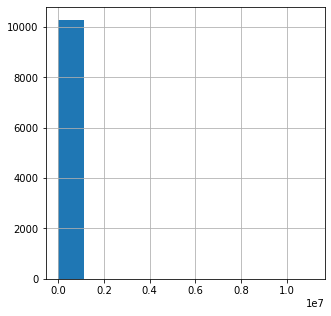

In [149]:
#Puedo ver la distribución también con un histograma
house_madrid['maximum_nights'].hist(figsize=(5,5));

### calendar_updated

Representa cuando realizó el anfitrión la última actualización del calendario. Esta columna no debe afectar al precio así que la voy a eliminar

In [0]:
house_madrid.drop('calendar_updated', axis=1, inplace=True)

In [151]:
house_madrid.head(3)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   
2     70  35532108  https://a0.muscache.com/im/pictures/9770cbc1-5...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   
2     within an hour               100%                0.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   
2                 14.0                     0.0                 Cortes   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   
2                  1     Apartment     Private room             3        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  \
0       1.0   1.0                 0            20                1   
1       1.0   1.0               100            40                1   
2       1.0   3.0                 0             0                1   

   extra_people  minimum_nights  maximum_nights  has_availability  \
0             5               1            1125                 1   
1            10               1            1125                 1   
2             0               1            1125                 1   

   availability_30  availability_60  availability_90  availability_365  \
0                8               28               58                58   
1                5               21               21                21   
2               10               33               63               333   

   number_of_reviews  number_of_reviews_ltm first_review last_review  \
0                  8                      8   2019-09-13  2019-10-26   
1                 15                     15   2018-12-29  2019-09-03   
2                  6                      6   2019-06-12  2019-10-28   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  98.0                    10.0                       10.0   
1                  83.0                     9.0                        9.0   
2                  93.0                    10.0                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                    10.0   
1                    9.0                          9.0                    10.0   
2                   10.0                         10.0                    10.0   

   review_scores_value  requires_license  instant_bookable  \
0                 10.0                 1                 1   
1                  9.0                 1                 1   
2                  9.0                 1                 0   

   is_business_travel_ready          cancellation_policy  \
0                         0  strict_14_with_grace_period   
1                         0                     moderate   
2                         0  strict_14_with_grace_period   

   require_guest_profile_picture  require_guest_phone_verification  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   

   reviews_per_month  sentiment  Topic_general  Topic_descripcion  \
0               4.14   0.156667        0.66538           0.037547   
1               1.42   0.287834        0.00000           0.376716   
2               1.19   0.383571        0.00000           0.247445   

   Topic_atraccio

### has_availability

Es una característica que representa si la vivienda tiene disponiblidad o no. Compruebo sus valores

In [152]:
house_madrid ['has_availability'].value_counts()

1    10279
Name: has_availability, dtype: int64

Solo tiene el valor 1 así que no nos aporta nada al precio. Elimino esta característica

In [0]:
house_madrid.drop(['has_availability'], axis=1, inplace=True)

### availability

Representa cuantas noches está disponibles para ser alquilado en los próximos, 30, 60, 90 y 365 dias
Vemos que tenemos 4 características: availability_30, availability_60, availability_90, availability_365. La 4 estarán correladas unas con otras así que me voy a quedar solo con una availability_90, ya que en muchos sitios el límite legal de alquilér para este tipo de viviendas es de 90 dias. Elimino por tanto las otras columnas

In [0]:
house_madrid.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

In [0]:
house_madrid ['availability_90'] = pd.to_numeric(house_madrid ['availability_90']) 

Si hubiera valores nulos los reemplazo por la mediana

In [0]:
mediana_availability_90 = house_madrid['availability_90'].median()   #lo guardo para usarlo en test
house_madrid['availability_90'].fillna(house_madrid['availability_90'].median(), inplace=True)

### number_of_reviews

Número de reviews que tiene la propiedad. Es de tipo int y no tiene valores nulos.

In [0]:
house_madrid ['number_of_reviews'] = pd.to_numeric(house_madrid ['number_of_reviews']) 

In [158]:
print("Valores nulos:", house_madrid['number_of_reviews'].isna().sum())
print(f"Proporcion: {round((house_madrid ['number_of_reviews'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Si tuviera valores nulos lo reemplazamos con un 0

In [0]:
house_madrid['number_of_reviews'].fillna(0, inplace=True)

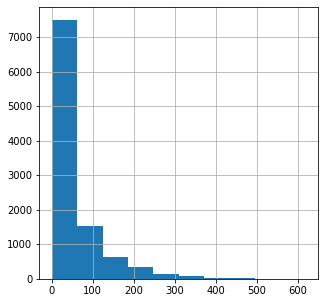

In [160]:
#Puedo ver la distribución también con un histograma
house_madrid['number_of_reviews'].hist(figsize=(5,5));

In [161]:
house_madrid.head(3)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   
2     70  35532108  https://a0.muscache.com/im/pictures/9770cbc1-5...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   
2     within an hour               100%                0.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   
2                 14.0                     0.0                 Cortes   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   
2                  1     Apartment     Private room             3        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  \
0       1.0   1.0                 0            20                1   
1       1.0   1.0               100            40                1   
2       1.0   3.0                 0             0                1   

   extra_people  minimum_nights  maximum_nights  availability_90  \
0             5               1            1125               58   
1            10               1            1125               21   
2             0               1            1125               63   

   number_of_reviews  number_of_reviews_ltm first_review last_review  \
0                  8                      8   2019-09-13  2019-10-26   
1                 15                     15   2018-12-29  2019-09-03   
2                  6                      6   2019-06-12  2019-10-28   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  98.0                    10.0                       10.0   
1                  83.0                     9.0                        9.0   
2                  93.0                    10.0                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                    10.0   
1                    9.0                          9.0                    10.0   
2                   10.0                         10.0                    10.0   

   review_scores_value  requires_license  instant_bookable  \
0                 10.0                 1                 1   
1                  9.0                 1                 1   
2                  9.0                 1                 0   

   is_business_travel_ready          cancellation_policy  \
0                         0  strict_14_with_grace_period   
1                         0                     moderate   
2                         0  strict_14_with_grace_period   

   require_guest_profile_picture  require_guest_phone_verification  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   

   reviews_per_month  sentiment  Topic_general  Topic_descripcion  \
0               4.14   0.156667        0.66538           0.037547   
1               1.42   0.287834        0.00000           0.376716   
2               1.19   0.383571        0.00000           0.247445   

   Topic_atracciones  Topic_servicios  Topic_transporte  dist_to_station  \
0           0.013976         0.061318          0.221778         0.340306   
1           0.144895         0.424510          0.052503         0.235877   
2           0.238780         0.076406          0.428331         0.290293   

   dist_to_pa

### number_of_reviews_ltm

Número de reviews que tiene la propiedad en los últimos 12 meses. Está muy correlada con number_of_reviews por tanto la voy a eliminar

In [0]:
house_madrid.drop(['number_of_reviews_ltm'], axis=1, inplace=True)

### first_review y last_review

Las fecha en la que la vivienda recibe la primera y la última review. Compruebo los valores nulos de first_review

In [163]:
print("Valores nulos:", house_madrid['first_review'].isna().sum())
print(f"Proporcion: {round((house_madrid ['first_review'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Categorizo incluyendo una etiqueta de "no review" para el caso de que fuera un valor nulo

En primer lugar transformo First Review a datatime

In [0]:
house_madrid['first_review'] = pd.to_datetime(house_madrid['first_review']) 

Me creo una nueva columna con el número de dias entre la primera review y la fecha del scraper:

In [0]:

house_madrid['time_since_first_review'] = (pd.datetime(2019, 11, 9) - house_madrid['first_review']).astype('timedelta64[D]')

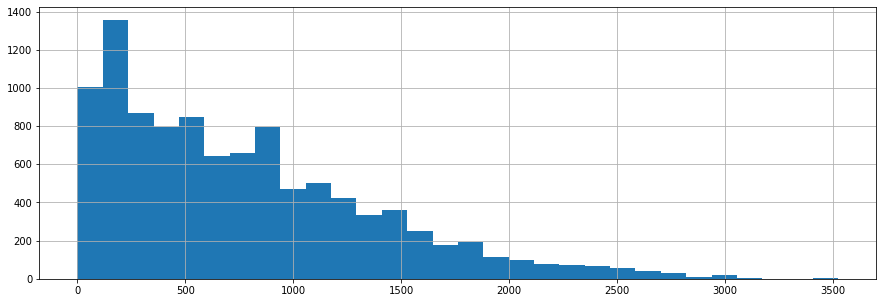

In [166]:
# Distribución del número de dias desde la primera review
house_madrid['time_since_first_review'].hist(figsize=(15,5), bins=30);

In [0]:
#Función de agrupación
def bin_column(col, bins, labels):
    """
    Toma la columna, agrupa por etiquetas y reemplaza el contenido original por la
    nueva etiqueta. Si hay un nulo lo sustituyo por unknown si no se especifica
    Takes in a column name, bin cut points and labels).
    """
    house_madrid[col] = pd.cut(house_madrid[col], bins=bins, labels=labels, include_lowest=True)
    house_madrid[col] = house_madrid[col].astype('str')
    
    

In [0]:
# Agrupación de time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(house_madrid['time_since_first_review'])],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'])

In [0]:
#Los nan los sustituo por 'no reviews'
house_madrid.loc[house_madrid['time_since_first_review'].str.contains('nan'), 'time_since_first_review'] = 'no reviews'

Con esto lo tengo ya convertido a una variable de tipo categórico

Finalmente elimino la columna original First Review 

In [0]:
house_madrid.drop(['first_review'], axis=1, inplace=True)

Realizo el mismo proceso con last_review

In [171]:
print("Valores nulos:", house_madrid['last_review'].isna().sum())
print(f"Proporcion: {round((house_madrid ['last_review'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


In [0]:
#transformo a datatime
house_madrid['last_review'] = pd.to_datetime(house_madrid['last_review'])

Me creo una nueva columna con el número de dias entre la última review y la fecha del scraper:

In [0]:
house_madrid['time_since_last_review'] = (pd.datetime(2019, 11, 9) - house_madrid['last_review']).astype('timedelta64[D]')

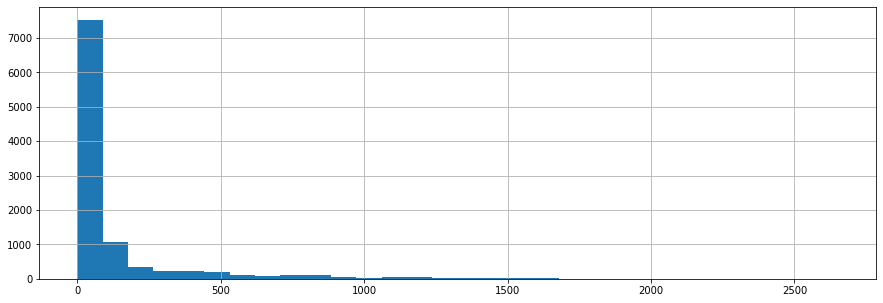

In [174]:
# Distribución del número de dias desde la última review
house_madrid['time_since_last_review'].hist(figsize=(15,5), bins=30);

In [0]:
# Agrupación
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(house_madrid['time_since_last_review'])],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'])

In [0]:
#Los nan los sustituo por 'no reviews'
house_madrid.loc[house_madrid['time_since_last_review'].str.contains('nan'), 'time_since_last_review'] = 'no reviews'

Con esto lo tengo ya convertido a una variable de tipo categórico.

Finalmente elimino la columna original Last Review

In [0]:
house_madrid.drop(['last_review'], axis=1, inplace=True)

In [178]:
house_madrid.head(5)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   
2     70  35532108  https://a0.muscache.com/im/pictures/9770cbc1-5...   
3     58  16451687  https://a0.muscache.com/im/pictures/8b1a8acc-9...   
4     70  29274213  https://a0.muscache.com/im/pictures/11253de9-5...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   
2     within an hour               100%                0.0   
3     within an hour             90-99%                0.0   
4     within an hour               100%                1.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   
2                 14.0                     0.0                 Cortes   
3                 78.0                     0.0                 Cortes   
4                  1.0                     0.0            Otro_Barrio   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   
2                  1     Apartment     Private room             3        1.0   
3                  1     Apartment  Entire home/apt             4        1.0   
4                  1         House  Entire home/apt             4        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  \
0       1.0   1.0                 0            20                1   
1       1.0   1.0               100            40                1   
2       1.0   3.0                 0             0                1   
3       1.0   2.0                 0            25                1   
4       2.0   3.0               100            50                2   

   extra_people  minimum_nights  maximum_nights  availability_90  \
0             5               1            1125               58   
1            10               1            1125               21   
2             0               1            1125               63   
3             0               1              28               64   
4            12               3            1000               75   

   number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                  8                  98.0                    10.0   
1                 15                  83.0                     9.0   
2                  6                  93.0                    10.0   
3                152                  80.0                     8.0   
4                 29                  97.0                    10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                        9.0                    9.0   
2                       10.0                   10.0   
3                        8.0                    8.0   
4                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                          9.0                    10.0                  9.0   
2                         10.0                    10.0                  9.0   
3                          8.0                     9.0                  8.0   
4                         10.0                     9.0                 10.0   

   requires_license  instant_bookable  is_business_travel_ready  \
0                 1                 1                         0   
1                 1                 1                         0   
2            

### Columnas reviews_scores

Representan la puntación que le dan los visitantes a los diferentes servicios. Categorizo incluyendo la categoría "no reviews" 

In [0]:
house_madrid ['review_scores_rating'] = pd.to_numeric(house_madrid ['review_scores_rating'])
house_madrid ['review_scores_accuracy'] = pd.to_numeric(house_madrid ['review_scores_accuracy'])
house_madrid ['review_scores_cleanliness'] = pd.to_numeric(house_madrid ['review_scores_cleanliness'])
house_madrid ['review_scores_checkin'] = pd.to_numeric(house_madrid ['review_scores_checkin'])
house_madrid ['review_scores_communication'] = pd.to_numeric(house_madrid ['review_scores_communication'])
house_madrid ['review_scores_location'] = pd.to_numeric(house_madrid ['review_scores_location'])
house_madrid ['review_scores_value'] = pd.to_numeric(house_madrid ['review_scores_value'])

In [180]:
print("Valores nulos:", house_madrid['review_scores_rating'].isna().sum())
print(f"Proporcion: {round((house_madrid ['review_scores_rating'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 154
Proporcion: 1.5%


Voy a dibujar la distribución de los diferentes ratings para ver como puedo ir agrupando cada característica

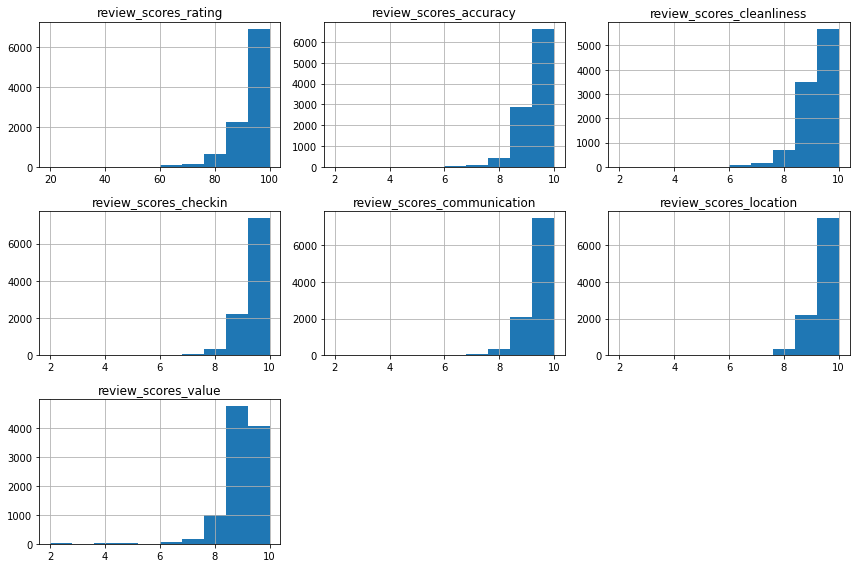

In [181]:
variables_to_plot = list(house_madrid.columns[house_madrid.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    house_madrid[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()


Se puede ver que la primera de ellas review_scores_rating tiene una distribución diferente a las otras. Voy a tratar esa por un lado y el resto por otro

In [182]:
#Quito la primera, review_scores_rating
variables_to_plot.pop(0)

'review_scores_rating'

In [0]:
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 4, 7, 8, 9, 10],
               labels=['0-4/10','5-7/10','8/10', '9/10', '10/10'])

In [0]:
#Los nan los sustituo por 'no reviews'
for col in variables_to_plot:
    house_madrid.loc[house_madrid[col].str.contains('nan'), col] = 'no reviews'

In [0]:
# Voy ahora con 
bin_column('review_scores_rating',
           bins=[0, 50, 80, 95, 100],
           labels=['0-49/100', '50-79/100','80-94/100', '95-100/100'])

In [0]:
#Los nan los sustituo por 'no reviews'
house_madrid.loc[house_madrid['review_scores_rating'].str.contains('nan'), 'review_scores_rating'] = 'no reviews'

In [187]:
house_madrid.head (5)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   
2     70  35532108  https://a0.muscache.com/im/pictures/9770cbc1-5...   
3     58  16451687  https://a0.muscache.com/im/pictures/8b1a8acc-9...   
4     70  29274213  https://a0.muscache.com/im/pictures/11253de9-5...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   
2     within an hour               100%                0.0   
3     within an hour             90-99%                0.0   
4     within an hour               100%                1.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   
2                 14.0                     0.0                 Cortes   
3                 78.0                     0.0                 Cortes   
4                  1.0                     0.0            Otro_Barrio   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   
2                  1     Apartment     Private room             3        1.0   
3                  1     Apartment  Entire home/apt             4        1.0   
4                  1         House  Entire home/apt             4        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  \
0       1.0   1.0                 0            20                1   
1       1.0   1.0               100            40                1   
2       1.0   3.0                 0             0                1   
3       1.0   2.0                 0            25                1   
4       2.0   3.0               100            50                2   

   extra_people  minimum_nights  maximum_nights  availability_90  \
0             5               1            1125               58   
1            10               1            1125               21   
2             0               1            1125               63   
3             0               1              28               64   
4            12               3            1000               75   

   number_of_reviews review_scores_rating review_scores_accuracy  \
0                  8           95-100/100                  10/10   
1                 15            80-94/100                   9/10   
2                  6            80-94/100                  10/10   
3                152            50-79/100                   8/10   
4                 29           95-100/100                  10/10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                     10/10                 10/10                       10/10   
1                      9/10                  9/10                        9/10   
2                     10/10                 10/10                       10/10   
3                      8/10                  8/10                        8/10   
4                     10/10                 10/10                       10/10   

  review_scores_location review_scores_value  requires_license  \
0                  10/10               10/10                 1   
1                  10/10                9/10                 1   
2                  10/10                9/10                 1   
3                   9/10                8/10                 1   
4                   9/10               10/10                 1   

   instant_bookable  is_business_travel_ready          cancellation_policy  \
0                 1                         0  strict_14_with_grace_pe

### requires_license
Esta característica representa si se requiere licencia. Es de tipo booleano. Voy a mirar si el valor "true"(1) es menos del 10% de viviendas o más del 90%. Si es así elimino la característica ya que no afectaría al precio

In [188]:
house_madrid ['requires_license'].value_counts()

1    10279
Name: requires_license, dtype: int64

Veo que su valor siempre es 1 con lo que esta característica no nos influye en el precio así que la elimino

In [0]:
house_madrid.drop(['requires_license'], axis=1, inplace=True)

### instant_bookable
Esta característica representa si se puede reservar de forma inmediata. Es de tipo booleano. Voy a mirar si el valor "true"(1) es menos del 10% de viviendas o más del 90%. Si es así elimino la característica ya que no afectaría al precio

In [190]:
house_madrid ['instant_bookable'].value_counts()

1    6386
0    3893
Name: instant_bookable, dtype: int64

In [191]:
if (house_madrid['instant_bookable'].sum() < len(house_madrid)/10):
  print ("Valor menos del 10%")
elif  ( house_madrid['instant_bookable'].sum() > len(house_madrid)*90/100):
  print ("Valor mayor del 90%")
else:
  print ("No elimino") 

No elimino


Si hay algún valor NAN le voy a asignar el más frecuente que es 1

In [0]:
house_madrid ['instant_bookable'] [house_madrid ['instant_bookable'].isnull()]=1

### is_business_travel_ready
Esta característica representa si la vivienda está preparada para "viaje de negocios". Es de tipo booleano. Voy a mirar si el valor "true"(1) es menos del 10% de viviendas o más del 90%. Si es así elimino la característica ya que no afectaría al precio

In [193]:
house_madrid ['is_business_travel_ready'].value_counts()

0    10279
Name: is_business_travel_ready, dtype: int64

Todos los valores son 0 por tanto no me aporta nada para el valor de la vivienda. Elimino la característica

In [0]:
house_madrid.drop(['is_business_travel_ready'], axis=1, inplace=True)

### cancellation_policy

Es una variable categórica que representa el tipo de política de cancelación. No contiene valores nulos
Vamos a ver que valores puede tener:

In [195]:
house_madrid ['cancellation_policy'].value_counts()

strict_14_with_grace_period    4085
moderate                       3627
flexible                       2508
super_strict_30                  43
super_strict_60                  16
Name: cancellation_policy, dtype: int64

De la "super_strict_30" y "super_strict_60" hay muy pocas viviendas así que las voy a agrupar junto con los "strict_14_with_grace_period" para así tener solo 3 categorías y ya de camino lo dejo preparado también para el test

Caso de que haya un valor nulo le asigno la más frecuente que es "strict_14_with_grace_period"

In [0]:
house_madrid ['cancellation_policy'] [house_madrid ['cancellation_policy'].isnull()]="strict_14_with_grace_period"

In [197]:
tipo_cancelacion = ['strict_14_with_grace_period', 'flexible', 'moderate' ]
tipo_cancelacion   #Lo usaré en test

['strict_14_with_grace_period', 'flexible', 'moderate']

In [0]:
house_madrid['cancellation_policy'] [~house_madrid['cancellation_policy'].isin(tipo_cancelacion)]='strict_14_with_grace_period'

In [199]:
house_madrid ['cancellation_policy'].value_counts()

strict_14_with_grace_period    4144
moderate                       3627
flexible                       2508
Name: cancellation_policy, dtype: int64

### require_guest_profile_picture
Esta característica representa si se requiere una foto del huesped. Es de tipo booleano. Voy a mirar si el valor "true"(1) es menos del 10% de viviendas o más del 90%. Si es así elimino la característica ya que no afectaría al precio

In [200]:
house_madrid ['require_guest_profile_picture'].value_counts()

0    10136
1      143
Name: require_guest_profile_picture, dtype: int64

In [201]:
if (house_madrid['require_guest_profile_picture'].sum() < len(house_madrid)/10):
  print ("Valor menos del 10%")
elif  ( house_madrid['require_guest_profile_picture'].sum() > len(house_madrid)*90/100):
  print ("Valor mayor del 90%")
else:
  print ("No elimino") 

Valor menos del 10%


El valor 1 es menos del 10% por tanto esta característica no me va a afectar al precio. La elimino

In [0]:
house_madrid.drop(['require_guest_profile_picture'], axis=1, inplace=True)

### require_guest_phone_verification
Esta característica representa si se requiere la verificación del teléfono del huesped. Es de tipo booleano. Voy a mirar si el valor "true"(1) es menos del 10% de viviendas o más del 90%. Si es así elimino la característica ya que no afectaría al precio

In [203]:
house_madrid ['require_guest_phone_verification'].value_counts()

0    10068
1      211
Name: require_guest_phone_verification, dtype: int64

In [204]:
if (house_madrid['require_guest_phone_verification'].sum() < len(house_madrid)/10):
  print ("Valor menos del 10%")
elif  ( house_madrid['require_guest_phone_verification'].sum() > len(house_madrid)*90/100):
  print ("Valor mayor del 90%")
else:
  print ("No elimino") 

Valor menos del 10%


El valor 1 es menos del 10% por tanto esta característica no me va a afectar al precio. La elimino

In [0]:
house_madrid.drop(['require_guest_phone_verification'], axis=1, inplace=True)

### reviews_per_month

Es un campo calculado que representa el número medio de reviews por mes.
Es una columna que va a estar altamente correlada con la "number_of_reviews" por tanto la voy a eliminar



In [0]:
house_madrid.drop(['reviews_per_month' ], axis=1, inplace=True)

In [207]:
house_madrid.head(5)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   
2     70  35532108  https://a0.muscache.com/im/pictures/9770cbc1-5...   
3     58  16451687  https://a0.muscache.com/im/pictures/8b1a8acc-9...   
4     70  29274213  https://a0.muscache.com/im/pictures/11253de9-5...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   
2     within an hour               100%                0.0   
3     within an hour             90-99%                0.0   
4     within an hour               100%                1.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   
2                 14.0                     0.0                 Cortes   
3                 78.0                     0.0                 Cortes   
4                  1.0                     0.0            Otro_Barrio   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   
2                  1     Apartment     Private room             3        1.0   
3                  1     Apartment  Entire home/apt             4        1.0   
4                  1         House  Entire home/apt             4        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  \
0       1.0   1.0                 0            20                1   
1       1.0   1.0               100            40                1   
2       1.0   3.0                 0             0                1   
3       1.0   2.0                 0            25                1   
4       2.0   3.0               100            50                2   

   extra_people  minimum_nights  maximum_nights  availability_90  \
0             5               1            1125               58   
1            10               1            1125               21   
2             0               1            1125               63   
3             0               1              28               64   
4            12               3            1000               75   

   number_of_reviews review_scores_rating review_scores_accuracy  \
0                  8           95-100/100                  10/10   
1                 15            80-94/100                   9/10   
2                  6            80-94/100                  10/10   
3                152            50-79/100                   8/10   
4                 29           95-100/100                  10/10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                     10/10                 10/10                       10/10   
1                      9/10                  9/10                        9/10   
2                     10/10                 10/10                       10/10   
3                      8/10                  8/10                        8/10   
4                     10/10                 10/10                       10/10   

  review_scores_location review_scores_value  instant_bookable  \
0                  10/10               10/10                 1   
1                  10/10                9/10                 1   
2                  10/10                9/10                 0   
3                   9/10                8/10                 1   
4                   9/10               10/10                 1   

           cancellation_policy  sentiment  Topic_general  Topic_descripcion  \
0  strict_14_with_grace_period   0.156667        0.66538           0.

### sentiment
Esta característica se ha obtenido tras hacer un NLP-Sentimental Analysis sobre un dataset de reviews. Es de tipo continuo con valores que van de van de -1 a 1. Cuando más positivo mejor valoración de los reviews. 

No tiene valores nulos

In [208]:
print("Valores nulos:", house_madrid['sentiment'].isna().sum())
print(f"Proporcion: {round((house_madrid ['sentiment'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


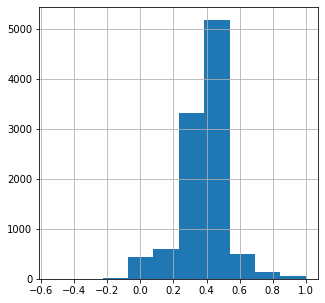

In [209]:
#Puedo ver la distribución también con un histograma
house_madrid['sentiment'].hist(figsize=(5,5));

Por el histograma se ve que la mayoría de los valores están entorno a 0.4 con lo que en general las valoraciones son positivas

Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana 

In [210]:
print("Media Sentiment:", round(house_madrid['sentiment'].mean(),0))
print("Mediana Sentiment:", house_madrid['sentiment'].median())

Media Sentiment: 0.0
Mediana Sentiment: 0.4004440235690236


In [0]:
#Guardo la mediana para usarla en test
mediana_sentiment = house_madrid['sentiment'].median()   #lo guardo para usarlo en test
house_madrid['sentiment'].fillna(house_madrid['sentiment'].median(), inplace=True)

### Columnas Topic
Tenemos 5 columnas Topics que se han obtenido mediante NLP-Topic Modeling sobre la característica de descripción de la vivienda. Si se suman los valores de los 5 Topics para cada vivienda nos da 1 con lo que cada columna representa el porcentaje que hay en la descripción sobre ese topic concreto


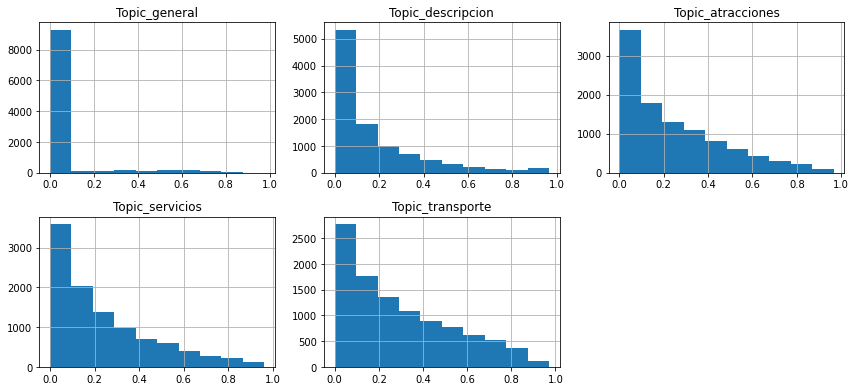

In [212]:
variables_to_plot = list(house_madrid.columns[house_madrid.columns.str.startswith("Topic_") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    house_madrid[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

Por esta distribución se ve que el Topic_general está a 0 para bastantes viviendas. Voy a comprobar que si es menos del 10% por si fuera una columna a eliminar 

In [213]:
(house_madrid ['Topic_general']==0.0).value_counts()

True     8273
False    2006
Name: Topic_general, dtype: int64

In [214]:
(house_madrid ['Topic_general']==0.0).value_counts()[0]*100/(house_madrid ['Topic_general']==0.0).value_counts()[1]

24.247552278496315

Hay un 24,24% de viviendas con este Topic_general diferente de 0, entonces voy a dejar la característica

### Columnas distancias
Estas características contienen la distancia en kilómetros a:
- la estación de metro más cercana
- el parking público más cercano
- los 5 muesos más importantes
- los 5 lugares/monumentos más importantes

Voy a dibujar la distribución de las diferentes distancias para ver como puedo ir agrupando cada característica

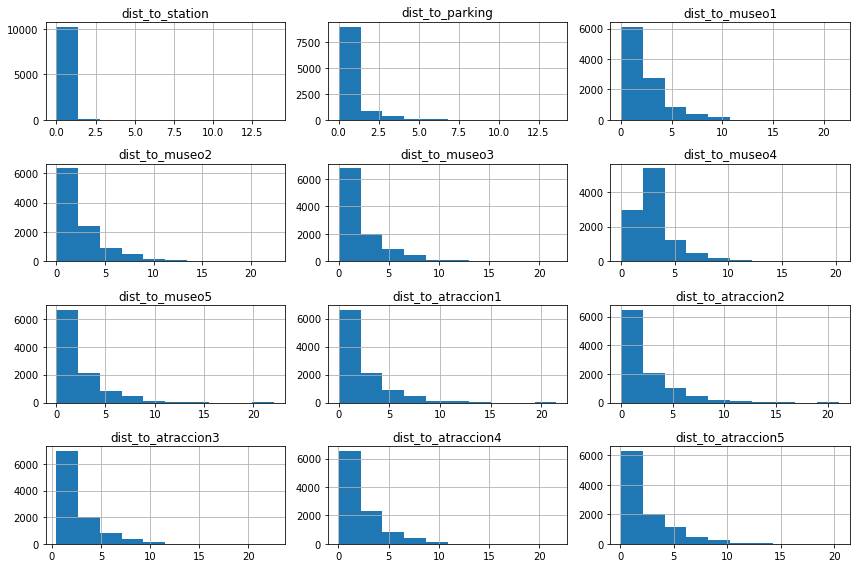

In [215]:
variables_to_plot = list(house_madrid.columns[house_madrid.columns.str.startswith("dist_to_") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(4,3,i+1)
    house_madrid[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

Voy a agrupar para transformar estas características en variables categóricas

In [0]:
#Agrupación
for col in variables_to_plot:
    bin_column(col,
               bins=[0.0, 0.2, 0.5, 1, 3, 5, max(house_madrid[col])],
               labels=['0-200m','200m-500m','500m-1km', '1km-3km', '3km-5km', '+5km' ])

In [217]:
house_madrid.head(5)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   
2     70  35532108  https://a0.muscache.com/im/pictures/9770cbc1-5...   
3     58  16451687  https://a0.muscache.com/im/pictures/8b1a8acc-9...   
4     70  29274213  https://a0.muscache.com/im/pictures/11253de9-5...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   
2     within an hour               100%                0.0   
3     within an hour             90-99%                0.0   
4     within an hour               100%                1.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   
2                 14.0                     0.0                 Cortes   
3                 78.0                     0.0                 Cortes   
4                  1.0                     0.0            Otro_Barrio   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   
2                  1     Apartment     Private room             3        1.0   
3                  1     Apartment  Entire home/apt             4        1.0   
4                  1         House  Entire home/apt             4        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  \
0       1.0   1.0                 0            20                1   
1       1.0   1.0               100            40                1   
2       1.0   3.0                 0             0                1   
3       1.0   2.0                 0            25                1   
4       2.0   3.0               100            50                2   

   extra_people  minimum_nights  maximum_nights  availability_90  \
0             5               1            1125               58   
1            10               1            1125               21   
2             0               1            1125               63   
3             0               1              28               64   
4            12               3            1000               75   

   number_of_reviews review_scores_rating review_scores_accuracy  \
0                  8           95-100/100                  10/10   
1                 15            80-94/100                   9/10   
2                  6            80-94/100                  10/10   
3                152            50-79/100                   8/10   
4                 29           95-100/100                  10/10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                     10/10                 10/10                       10/10   
1                      9/10                  9/10                        9/10   
2                     10/10                 10/10                       10/10   
3                      8/10                  8/10                        8/10   
4                     10/10                 10/10                       10/10   

  review_scores_location review_scores_value  instant_bookable  \
0                  10/10               10/10                 1   
1                  10/10                9/10                 1   
2                  10/10                9/10                 0   
3                   9/10                8/10                 1   
4                   9/10               10/10                 1   

           cancellation_policy  sentiment  Topic_general  Topic_descripcion  \
0  strict_14_with_grace_period   0.156667        0.66538           0.

Con esto ya tendría realizada toda la limpieza de dataset. He añadido nuevas columnas y categorizado

In [218]:
#Tipos de datos y columnas que me quedan finalmente
dato = house_madrid.dtypes
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Price                            int64
id                               int64
picture_url                     object
host_response_time              object
host_response_rate              object
host_is_superhost              float64
host_listings_count            float64
host_identity_verified         float64
neighbourhood_cleansed          object
is_location_exact                int64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
security_deposit                 int64
cleaning_fee                     int64
guests_included                  int64
extra_people                     int64
minimum_nights                   int64
maximum_nights                   int64
availability_90                  int64
number_of_reviews                int64
review_scores_rating            object
review_scores_accuracy   

In [219]:
print(f"El dataset limpio train contiene {len(house_madrid)} viviendas Airbnb con {len(house_madrid.columns)} características")
pd.set_option('display.max_columns', len(house_madrid)) # Para ver todas las columnas
house_madrid.head(5)  

El dataset limpio train contiene 10279 viviendas Airbnb con 102 características


Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   
2     70  35532108  https://a0.muscache.com/im/pictures/9770cbc1-5...   
3     58  16451687  https://a0.muscache.com/im/pictures/8b1a8acc-9...   
4     70  29274213  https://a0.muscache.com/im/pictures/11253de9-5...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   
2     within an hour               100%                0.0   
3     within an hour             90-99%                0.0   
4     within an hour               100%                1.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   
2                 14.0                     0.0                 Cortes   
3                 78.0                     0.0                 Cortes   
4                  1.0                     0.0            Otro_Barrio   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   
2                  1     Apartment     Private room             3        1.0   
3                  1     Apartment  Entire home/apt             4        1.0   
4                  1         House  Entire home/apt             4        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  \
0       1.0   1.0                 0            20                1   
1       1.0   1.0               100            40                1   
2       1.0   3.0                 0             0                1   
3       1.0   2.0                 0            25                1   
4       2.0   3.0               100            50                2   

   extra_people  minimum_nights  maximum_nights  availability_90  \
0             5               1            1125               58   
1            10               1            1125               21   
2             0               1            1125               63   
3             0               1              28               64   
4            12               3            1000               75   

   number_of_reviews review_scores_rating review_scores_accuracy  \
0                  8           95-100/100                  10/10   
1                 15            80-94/100                   9/10   
2                  6            80-94/100                  10/10   
3                152            50-79/100                   8/10   
4                 29           95-100/100                  10/10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                     10/10                 10/10                       10/10   
1                      9/10                  9/10                        9/10   
2                     10/10                 10/10                       10/10   
3                      8/10                  8/10                        8/10   
4                     10/10                 10/10                       10/10   

  review_scores_location review_scores_value  instant_bookable  \
0                  10/10               10/10                 1   
1                  10/10                9/10                 1   
2                  10/10                9/10                 0   
3                   9/10                8/10                 1   
4                   9/10               10/10                 1   

           cancellation_policy  sentiment  Topic_general  Topic_descripcion  \
0  strict_14_with_grace_period   0.156667        0.66538           0.

## 5.- Análisis exploratorio



## 5.1. Analisis exploratorio de variables de tipo numérico

Vamos ahora a realizar un análisis básico de los datos de tipo numérico. 

Voy a resumir toda la información posible de los datos. Me interesa saber la media, desviación estándar y quartiles de cada una de las variables. Esto nos permitirá, por una lado, tener una idea de cómo son las ditribuciones de cada una de las variables y por otra, nos permitirá verificar si existen datos anómalos, también conocidos como outliers 

In [220]:
house_madrid.describe().T

count          mean           std       min  \
Price                        10279.0  9.660142e+01  2.714706e+02     9.000   
id                           10279.0  2.162167e+07  1.082305e+07  6369.000   
host_is_superhost            10279.0  2.599475e-01  4.386268e-01     0.000   
host_listings_count          10273.0  1.677981e+01  6.437003e+01     0.000   
host_identity_verified       10279.0  3.550929e-01  4.785647e-01     0.000   
is_location_exact            10279.0  6.989980e-01  4.587159e-01     0.000   
accommodates                 10279.0  3.449849e+00  2.046214e+00     1.000   
bathrooms                    10279.0  1.287042e+00  6.558398e-01     0.000   
bedrooms                     10279.0  1.423096e+00  1.872179e+00     0.000   
beds                         10279.0  2.048059e+00  1.684616e+00     0.000   
security_deposit             10279.0  1.064444e+02  2.026053e+02     0.000   
cleaning_fee                 10279.0  2.545102e+01  2.828645e+01     0.000   
guests_included              10279.0  1.910011e+00  1.488679e+00     1.000   
extra_people                 10279.0  9.347796e+00  1.408130e+01     0.000   
minimum_nights               10279.0  3.962350e+00  2.193401e+01     1.000   
maximum_nights               10279.0  1.836303e+03  1.096047e+05     1.000   
availability_90              10279.0  4.112355e+01  2.863218e+01     0.000   
number_of_reviews            10279.0  5.175980e+01  7.004307e+01     1.000   
instant_bookable             10279.0  6.212667e-01  4.850951e-01     0.000   
sentiment                    10279.0  3.837214e-01  1.407523e-01    -0.535   
Topic_general                10279.0  4.616456e-02  1.465036e-01     0.000   
Topic_descripcion            10279.0  1.728604e-01  2.059371e-01     0.000   
Topic_atracciones            10279.0  2.427760e-01  2.222449e-01     0.000   
Topic_servicios              10279.0  2.381296e-01  2.191767e-01     0.000   
Topic_transporte             10279.0  2.974300e-01  2.412275e-01     0.000   
Dias_activo                  10279.0  1.406198e+03  7.831414e+02     3.000   
Luggage dropoff allowed      10279.0  2.196712e-01  4.140440e-01     0.000   
TV                           10279.0  8.224535e-01  3.821491e-01     0.000   
Room-darkening shades        10279.0  1.081817e-01  3.106249e-01     0.000   
Paid parking on premises     10279.0  1.905827e-01  3.927798e-01     0.000   
Microwave                    10279.0  5.289425e-01  4.991859e-01     0.000   
Smoking allowed              10279.0  1.928203e-01  3.945324e-01     0.000   
Laptop friendly workspace    10279.0  6.605701e-01  4.735389e-01     0.000   
Dryer                        10279.0  1.936959e-01  3.952126e-01     0.000   
Host greets you              10279.0  4.227065e-01  4.940136e-01     0.000   
Wide entrance for guests     10279.0  1.154782e-01  3.196137e-01     0.000   
Carbon monoxide detector     10279.0  1.559490e-01  3.628247e-01     0.000   
Dishwasher                   10279.0  2.587800e-01  4.379858e-01     0.000   
Coffee maker                 10279.0  4.898336e-01  4.999210e-01     0.000   
Oven                         10279.0  3.548011e-01  4.784763e-01     0.000   
Cooking basics               10279.0  4.750462e-01  4.994012e-01     0.000   
Hair dryer                   10279.0  7.981321e-01  4.014137e-01     0.000   
Washer                       10279.0  8.451211e-01  3.618068e-01     0.000   
Stove                        10279.0  3.805818e-01  4.855535e-01     0.000   
Patio or balcony             10279.0  1.470960e-01  3.542188e-01     0.000   
Elevator                     10279.0  5.735967e-01  4.945779e-01     0.000   
Hot water                    10279.0  7.081428e-01  4.546391e-01     0.000   
Fire extinguisher            10279.0  2.461329e-01  4.307778e-01     0.000   
Paid parking off premises    10279.0  2.759023e-01  4.469896e-01     0.000   
Family/kid friendly          10279.0  3.796089e-01  4.853132e-01     0.000   
Cable TV                     10279.0  1.112949e-01  3

### Price

In [221]:
print(f"Los precios se encuentran en el rango desde  {min(house_madrid.Price)} € to {max(house_madrid.Price)} €.")

Los precios se encuentran en el rango desde  9 € to 8930 €.


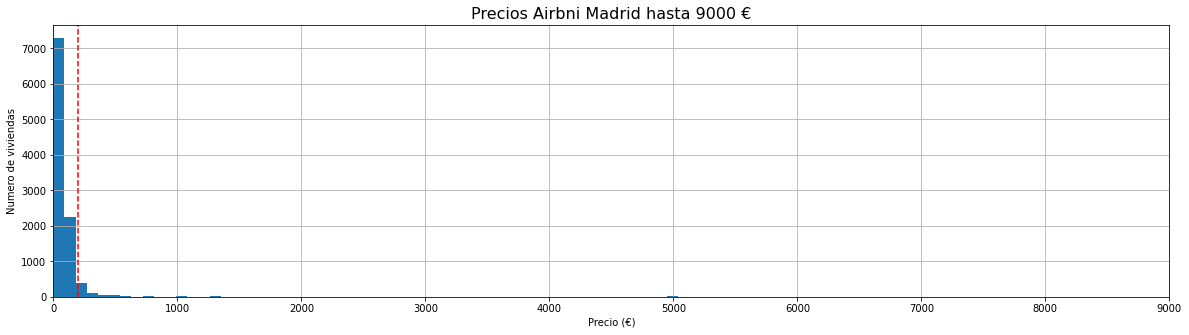

In [222]:
# Distribución  de precios desde 0 € a 9000 €
plt.figure(figsize=(20,5))
house_madrid.Price.hist(bins=100, range=(0,9000))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Precios Airbni Madrid hasta 9000 €", fontsize=16)
plt.xlabel("Precio (€)")
plt.ylabel("Numero de viviendas")
plt.show()

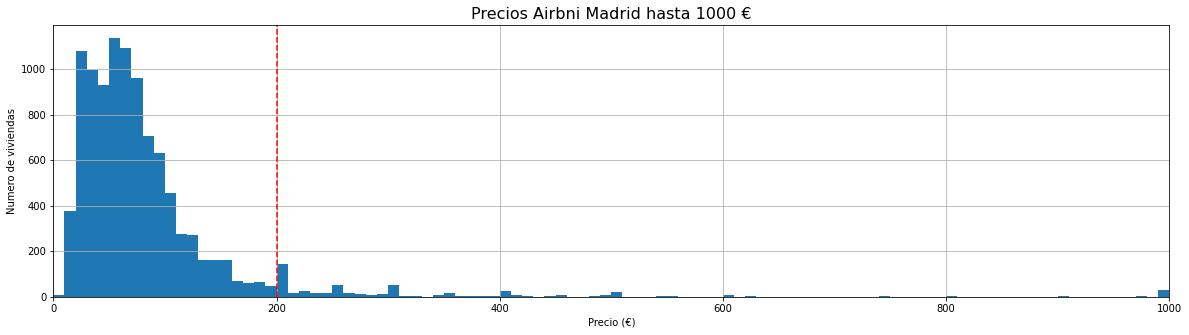

In [223]:
#Para verlo mejor
# Distribución  de precios desde 0 € a 1000 €
plt.figure(figsize=(20,5))
house_madrid.Price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Precios Airbni Madrid hasta 1000 €", fontsize=16)
plt.xlabel("Precio (€)")
plt.ylabel("Numero de viviendas")
plt.show()

Se aprecia que la mayoría de las viviendas tienen un precio por debajo de los 200 € la noche.

In [224]:
#Voy a mirar la vivienda de precio más alto por curiosidad
house_madrid [house_madrid.Price == 8930]

Price        id                                        picture_url  \
7324   8930  19740224  https://a0.muscache.com/im/pictures/c2fea552-6...   

     host_response_time host_response_rate  host_is_superhost  \
7324            unknown            unknown                0.0   

      host_listings_count  host_identity_verified neighbourhood_cleansed  \
7324                  1.0                     0.0                   Goya   

      is_location_exact property_type        room_type  accommodates  \
7324                  0     Apartment  Entire home/apt             1   

      bathrooms  bedrooms  beds  security_deposit  cleaning_fee  \
7324        3.0       3.0   4.0              1500            30   

      guests_included  extra_people  minimum_nights  maximum_nights  \
7324                6           150              30              30   

      availability_90  number_of_reviews review_scores_rating  \
7324                0                  7           95-100/100   

     review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
7324                  10/10                      9/10                  9/10   

     review_scores_communication review_scores_location review_scores_value  \
7324                        9/10                  10/10               10/10   

      instant_bookable          cancellation_policy  sentiment  Topic_general  \
7324                 1  strict_14_with_grace_period   0.065224            0.0   

      Topic_descripcion  Topic_atracciones  Topic_servicios  Topic_transporte  \
7324           0.012294           0.397461         0.374549           0.21291   

     dist_to_station dist_to_parking dist_to_museo1 dist_to_museo2  \
7324       200m-500m       200m-500m       500m-1km        1km-3km   

     dist_to_museo3 dist_to_museo4 dist_to_museo5 dist_to_atraccion1  \
7324        1km-3km        1km-3km        1km-3km            1km-3km   

     dist_to_atraccion2 dist_to_atraccion3 dist_to_atraccion4  \
7324            1km-3km            1km-3km           500m-1km   

     dist_to_atraccion5  Dias_activo  Luggage dropoff allowed   TV  \
7324            3km-5km       1235.0                      0.0  1.0   

      Room-darkening shades  Paid parking on premises  Microwave  \
7324                    0.0                       0.0        0.0   

      Smoking allowed  Laptop friendly workspace  Dryer  Host greets you  \
7324              0.0                        1.0    0.0              1.0   

      Wide entrance for guests  Carbon monoxide detector  Dishwasher  \
7324                       0.0                       0.0         0.0   

      Coffee maker  Oven  Cooking basics  Hair dryer  Washer  Stove  \
7324           0.0   0.0             0.0         1.0     1.0    0.0   

      Patio or balcony  Elevator  Hot water  Fire extinguisher  \
7324               0.0       0.0        0.0                1.0   

      Paid parking off premises  Family/kid friendly  Cable TV  \
7324                        0.0                  0.0       0.0   

      Air conditioning  Private entrance  Well-lit path to entrance  \
7324               1.0               1.0                        0.0   

      Pets allowed  Refrigerator  Extra pillows and blankets  Hangers  \
7324           0.0           0.0                         0.0      1.0   

      Dishes and silverware  Wide entrance  Long term stays allowed  Internet  \
7324                    0.0            0.0                      0.0       0.0   

      Smoke detector  Bed linens  Iron  Lock on bedroom door  \
7324             0.0         0.0   1.0                   0.0   

      Buzzer/wireless intercom  First aid kit  Free street parking  Breakfast  \
7324                       0.0            1.0                  0.0        0.0   

      Crib  Shampoo  No stairs or steps to enter  Wide hallways  \
7324   0.0      1.0                          0.0            0.0   

     time_since_first_review time_since_last_review  
7324               2-3 years       

Se ve que es una vivienda con 3 dormitorios. No parece tener nada especial así que será seguramente un error en el precio

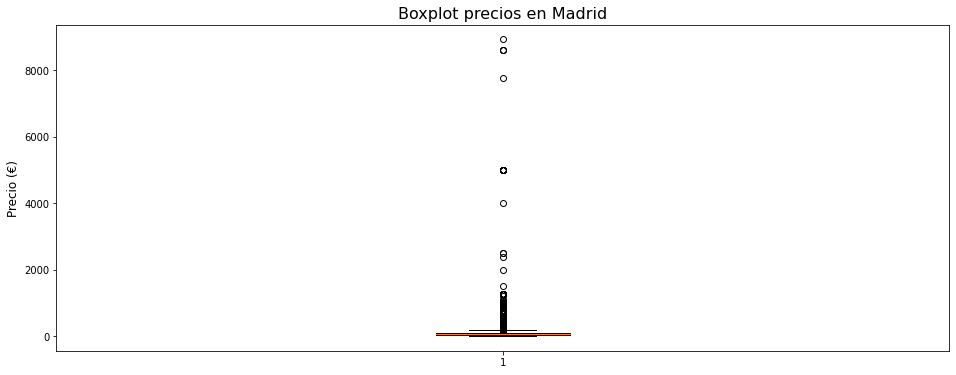

In [225]:
#Dibujo un Boxplot para los precios
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid.Price)
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Boxplot precios en Madrid', fontsize=16)
plt.show()

Tratamiento de outliers: Voy a considerar outiliers a partir de 200. Veo en la distribución que por debajo de ese valor están la mayoría de las observaciones

In [0]:
house_madrid = house_madrid [house_madrid ['Price']<=200]

## host_listings_count

Revisando los valores llama la atención que el  host_listings_count tenga un máximo de 528


In [227]:
print("Mediana del número de viviendas por host:", int(house_madrid['host_listings_count'].median()))
print("Media del número de viviendas por host:", int(round(house_madrid['host_listings_count'].mean())))
print("Mayor número de viviendas por host:", int(round(house_madrid['host_listings_count'].max())))
print ("Porcentaje de viviendas cuyo anfitrión solo tiene una vivienda:", 
       int(round (100*len(house_madrid[house_madrid["host_listings_count"] == 1])/len(house_madrid))))

Mediana del número de viviendas por host: 2
Media del número de viviendas por host: 16
Mayor número de viviendas por host: 528
Porcentaje de viviendas cuyo anfitrión solo tiene una vivienda: 36


La media vemos que es significativamente más alta (16) que la mediana lo que significa que hay anfitriones que tienen un número muy alto de propiedades. Se puede ver que el más alto tiene 528 propiedades. El 36% de los anfitriones tienen solo una vivienda pero es muy llamativo que más de la mitad tengan más de una vivienda

In [228]:
#Muestro un listado de los mayores Host Listing Count.
house_madrid.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_listings_count']]

host_listings_count
4989                  77.0
718                   78.0
6559                  88.0
2375                 105.0
7144                 106.0
6068                 147.0
5959                 227.0
10232                264.0
3872                 528.0
7104                   NaN

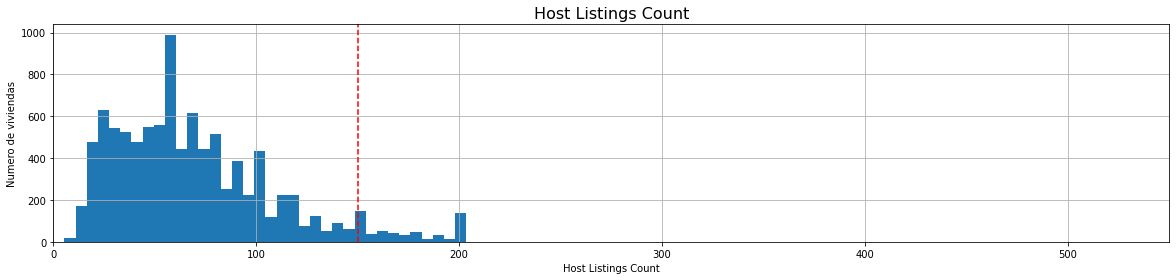

In [229]:
# Distribución  de Host Listings Count desde 0, 550 
plt.figure(figsize=(20,4))
house_madrid.Price.hist(bins=100, range=(0,550))
plt.margins(x=0)
plt.axvline(150, color='red', linestyle='--')
plt.title("Host Listings Count", fontsize=16)
plt.xlabel("Host Listings Count")
plt.ylabel("Numero de viviendas")
plt.show()

De todas formas nos encontramos con dos dificultades para saber el número de propiedades que tiene un anfitrión

1) Anfitriones que tengan más propiedades en Madrid van a aparecer varias veces en el listado ya que el dataset viene a nivel de propiedad y no de anfitrión

2) Un anfitrión puede tener propiedades en otras ciudades

Tratamiento de outliers: Voy a considerar outiliers a partir de 150. Veo en la distribución que por debajo de ese valor están la mayoría de las observaciones

In [0]:
house_madrid = house_madrid [house_madrid ['host_listings_count']<=150]

Tratamiento de valores missings: Los sustituyo por la mediana

In [0]:
mediana_host_listings_count = house_madrid['host_listings_count'].median() #Lo guardo para usarlo en test
house_madrid['host_listings_count'].fillna(house_madrid['host_listings_count'].median(), inplace=True)

In [232]:
#Compruebo que ya no tengo valores nulos
print("Valores nulos:", house_madrid['host_listings_count'].isna().sum())
print(f"Proporcion: {round((house_madrid['host_listings_count'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


## accommodates, bathrooms, bedrooms, beds y guests_included

Analizando lo datos vemos que no parece existir outliers

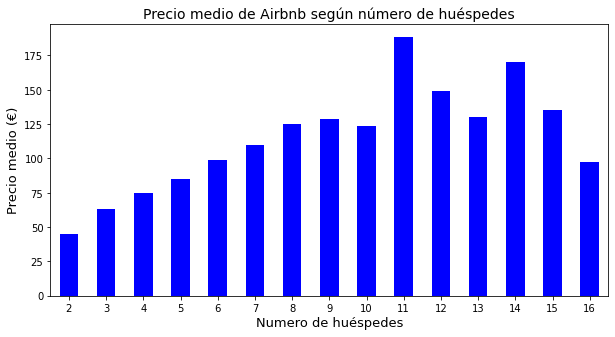

In [233]:
plt.figure(figsize=(10,5))
house_madrid.groupby('accommodates').Price.median().plot(kind='bar', color='b')
plt.title('Precio medio de Airbnb según número de huéspedes', fontsize=14)
plt.xlabel('Numero de huéspedes', fontsize=13)
plt.ylabel('Precio medio (€)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Se ve como el precio se va incrementando hasta los 11 huéspedes. Luego sorprendentemente comienza a bajar. Para 14 sube de nuevo y luego baja. Es curioso como el precio para 6 huespedes es similar al de 16

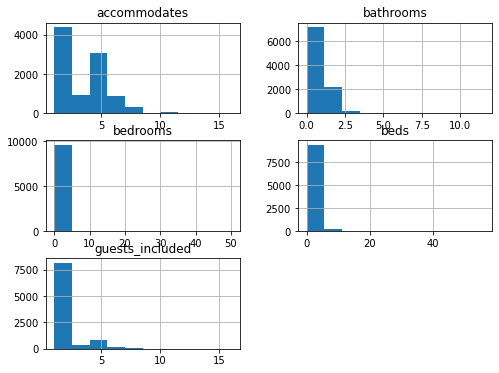

In [234]:
house_madrid[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included']].hist(figsize=(8,6));

## security_deposit

In [235]:
print(f"El Security Deposit se encuentran en el rango desde  {min(house_madrid['security_deposit'])} € to {max(house_madrid['security_deposit'])} €.")

El Security Deposit se encuentran en el rango desde  0 € to 4500 €.


Me parece un valor muy elevado los 4500€. Veamos la distribución que tiene

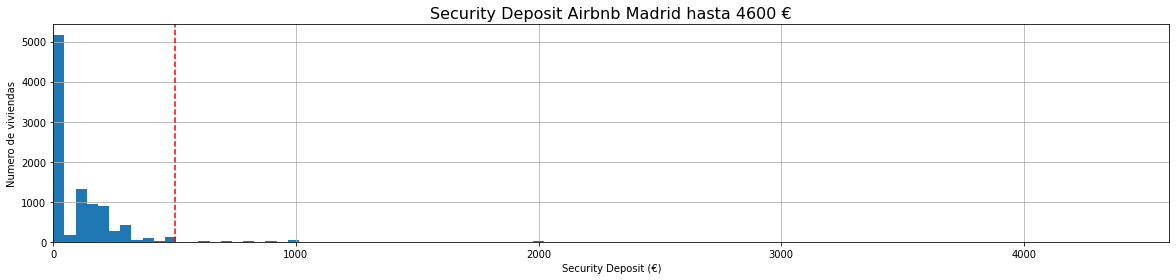

In [236]:
# Distribución  de precios desde 0 € a 4600 €
plt.figure(figsize=(20,4))
house_madrid['security_deposit'].hist(bins=100, range=(0,4600))
plt.margins(x=0)
plt.axvline(500, color='red', linestyle='--')
plt.title("Security Deposit Airbnb Madrid hasta 4600 €", fontsize=16)
plt.xlabel("Security Deposit (€)")
plt.ylabel("Numero de viviendas")
plt.show()

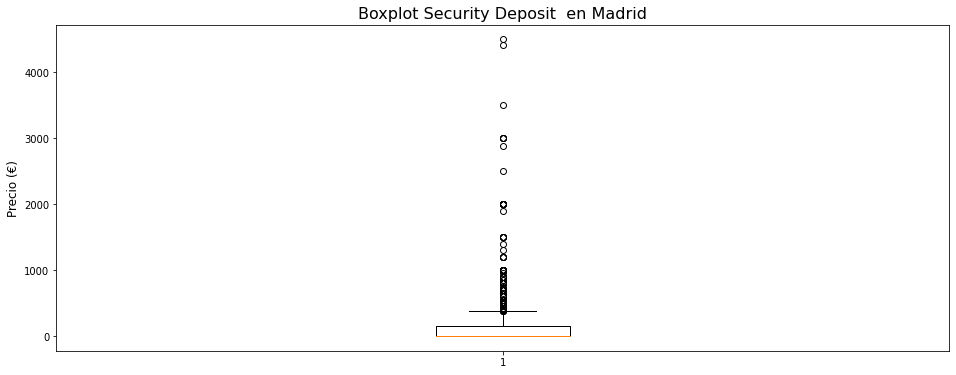

In [237]:
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid['security_deposit'])
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Boxplot Security Deposit  en Madrid', fontsize=16)
plt.show()

Voy a eliminar aquellos que tienen más de 500 € de Security Deposit

In [0]:
house_madrid = house_madrid [house_madrid ['security_deposit']<=500]

## cleaning_fee

In [239]:
print(f"El Cleaning Fee se encuentran en el rango desde  {min(house_madrid['cleaning_fee'])} € to {max(house_madrid['cleaning_fee'])} €.")

El Cleaning Fee se encuentran en el rango desde  0 € to 250 €.


Me parece un valor muy elevado los 250 €. Veamos la distribución que tiene

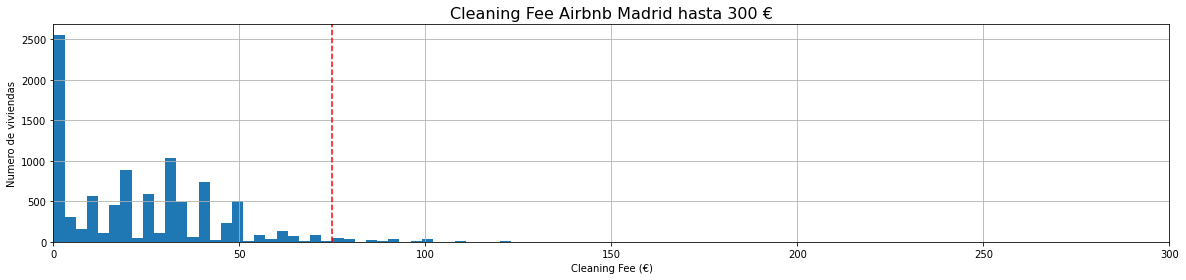

In [240]:
# Distribución  de precios desde 0 € a 300 €
plt.figure(figsize=(20,4))
house_madrid['cleaning_fee'].hist(bins=100, range=(0,300))
plt.margins(x=0)
plt.axvline(75, color='red', linestyle='--')
plt.title("Cleaning Fee Airbnb Madrid hasta 300 €", fontsize=16)
plt.xlabel("Cleaning Fee (€)")
plt.ylabel("Numero de viviendas")
plt.show()

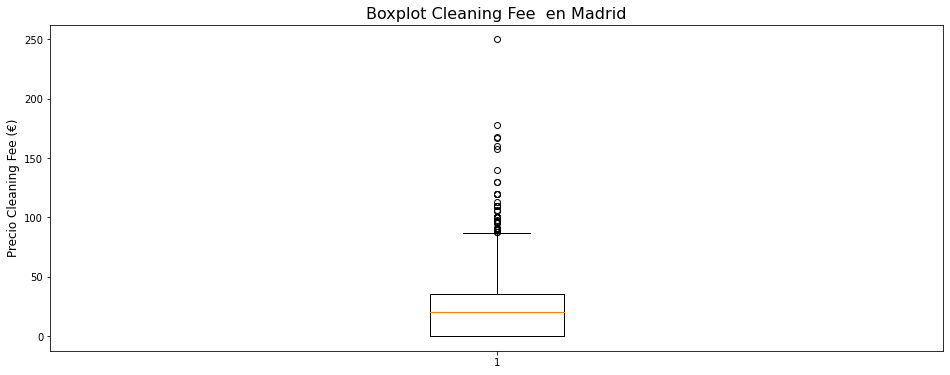

In [241]:
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid['cleaning_fee'])
plt.ylabel('Precio Cleaning Fee (€)', fontsize=12)
plt.title('Boxplot Cleaning Fee  en Madrid', fontsize=16)
plt.show()

Voy a eliminar aquellos que tienen más de 75 € de Cleaning Fee

In [0]:
house_madrid = house_madrid [house_madrid ['cleaning_fee']<=75]

## extra_people

In [243]:
print(f"Extra People se encuentran en el rango desde  {min(house_madrid['extra_people'])} € to {max(house_madrid['extra_people'])} €.")

Extra People se encuentran en el rango desde  0 € to 271 €.


Parece que 271 € extra por una persona es un valor demasiado alto. Veamos la distribución

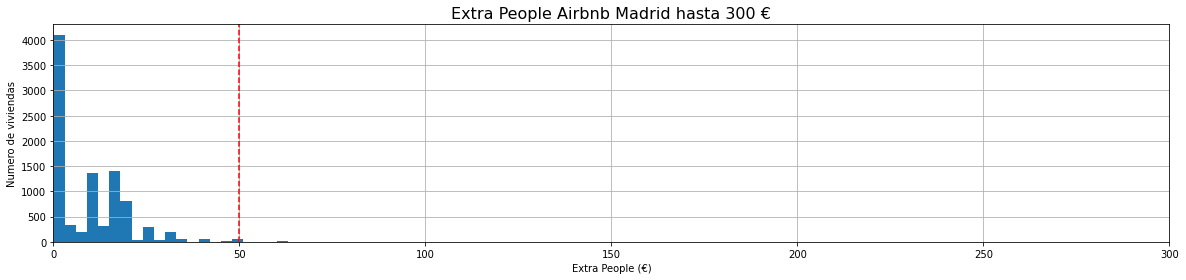

In [244]:
# Distribución  de precios desde 0 € a 300 €
plt.figure(figsize=(20,4))
house_madrid['extra_people'].hist(bins=100, range=(0,300))
plt.margins(x=0)
plt.axvline(50, color='red', linestyle='--')
plt.title("Extra People Airbnb Madrid hasta 300 €", fontsize=16)
plt.xlabel("Extra People (€)")
plt.ylabel("Numero de viviendas")
plt.show()

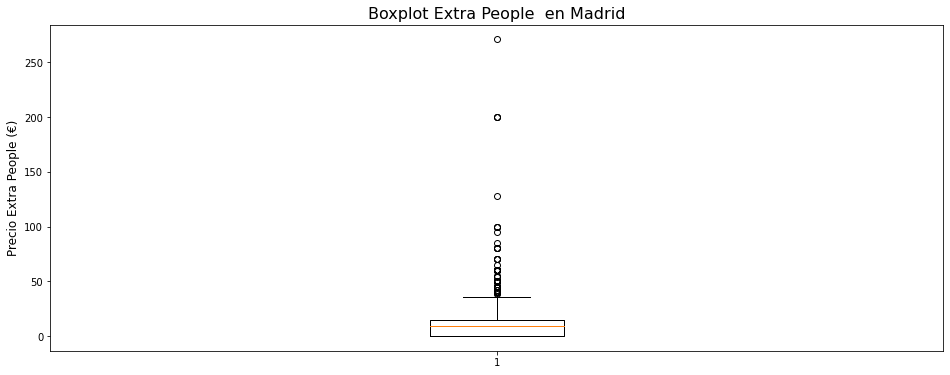

In [245]:
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid['extra_people'])
plt.ylabel('Precio Extra People (€)', fontsize=12)
plt.title('Boxplot Extra People  en Madrid', fontsize=16)
plt.show()

Voy a eliminar aquellos que tienen más de 50 € de Extra People

In [0]:
house_madrid = house_madrid [house_madrid ['extra_people']<=50]

Tratamiento de missings: Lo sustituyo por la mediana

In [0]:
mediana_extra_people = house_madrid['extra_people'].median() #lo guardo para usarlo después en test
house_madrid['extra_people'].fillna(house_madrid['extra_people'].median(), inplace=True)

## minimum_nights

In [248]:
print(f"Minimum Nights se encuentran en el rango desde  {min(house_madrid['minimum_nights'])}  to {max(house_madrid['minimum_nights'])}.")

Minimum Nights se encuentran en el rango desde  1  to 1125.


El valor 1125 es demasiado alto para ser el número mínimo de noches. Veamos la distribución

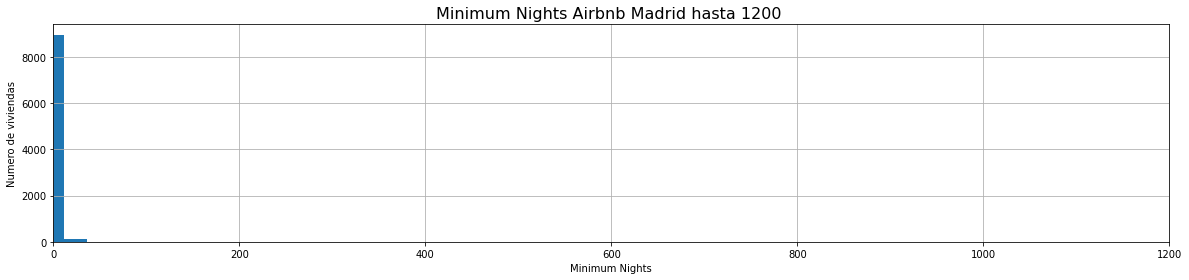

In [249]:
# Distribución  de Minimum Nights desde 0  a 1200 
plt.figure(figsize=(20,4))
house_madrid['minimum_nights'].hist(bins=100, range=(0,1200))
plt.margins(x=0)
#plt.axvline(50, color='red', linestyle='--')
plt.title("Minimum Nights Airbnb Madrid hasta 1200 ", fontsize=16)
plt.xlabel("Minimum Nights")
plt.ylabel("Numero de viviendas")
plt.show()

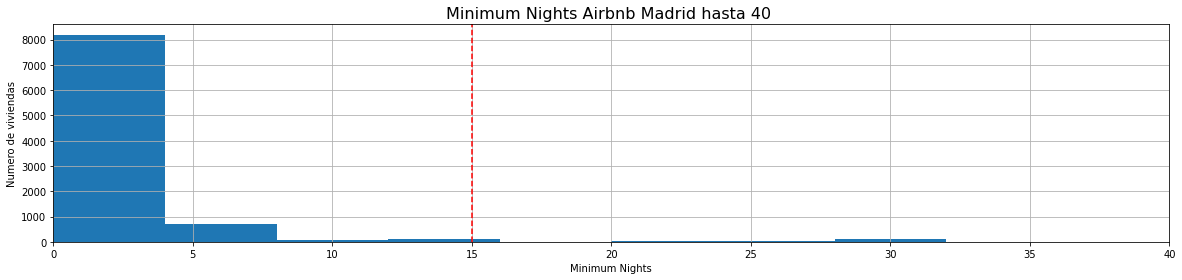

In [250]:
# Distribución  de Minimum Nights desde 0 a 40 
plt.figure(figsize=(20,4))
house_madrid['minimum_nights'].hist(bins=10, range=(0,40))
plt.margins(x=0)
plt.axvline(15, color='red', linestyle='--')
plt.title("Minimum Nights Airbnb Madrid hasta 40 ", fontsize=16)
plt.xlabel("Minimum Nights")
plt.ylabel("Numero de viviendas")
plt.show()

Voy a eliminar los valores de Minimum Nights mayores a 15

In [0]:
house_madrid = house_madrid [house_madrid ['minimum_nights']<=15]

Tratamiento de missings: lo sustituyo por la mediana

In [0]:
mediana_minimum_nights = house_madrid['minimum_nights'].median()  #Lo guardo para usarlo después en test
house_madrid['minimum_nights'].fillna(house_madrid['minimum_nights'].median(), inplace=True)

## maximum_nights

In [253]:
print(f"Maximum Nights se encuentran en el rango desde  {min(house_madrid['maximum_nights'])}  to {max(house_madrid['maximum_nights'])}.")

Maximum Nights se encuentran en el rango desde  1  to 11111111.


Claramente hay valores outliers. Veamos la distribución

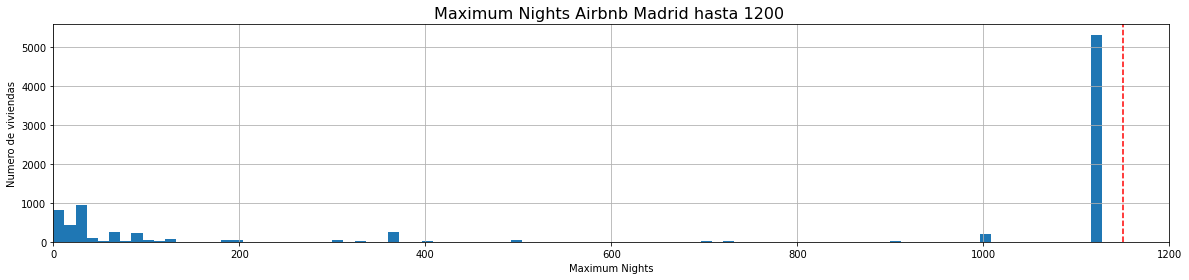

In [254]:
# Distribución  de Minimum Nights desde 0  a 1200 
plt.figure(figsize=(20,4))
house_madrid['maximum_nights'].hist(bins=100, range=(0,1200))
plt.margins(x=0)
plt.axvline(1150, color='red', linestyle='--')
plt.title("Maximum Nights Airbnb Madrid hasta 1200 ", fontsize=16)
plt.xlabel("Maximum Nights")
plt.ylabel("Numero de viviendas")
plt.show()

Voy a eliminar los valores menos a 1150

In [0]:
house_madrid = house_madrid [house_madrid ['maximum_nights']<=1150]

Tratamiento de missings: los sustituyo por la mediana

In [0]:
mediana_maximum_nights = house_madrid['maximum_nights'].median()  #Lo guardo para usarlo después en test
house_madrid['maximum_nights'].fillna(house_madrid['maximum_nights'].median(), inplace=True)

In [257]:
house_madrid.describe().T

count          mean           std       min  \
Price                        9060.0  6.782748e+01  3.897113e+01     9.000   
id                           9060.0  2.157531e+07  1.087468e+07  6369.000   
host_is_superhost            9060.0  2.690949e-01  4.435139e-01     0.000   
host_listings_count          9060.0  8.455629e+00  1.675130e+01     0.000   
host_identity_verified       9060.0  3.637969e-01  4.811177e-01     0.000   
is_location_exact            9060.0  7.091611e-01  4.541744e-01     0.000   
accommodates                 9060.0  3.261258e+00  1.775718e+00     1.000   
bathrooms                    9060.0  1.232064e+00  5.868481e-01     0.000   
bedrooms                     9060.0  1.343819e+00  1.923415e+00     0.000   
beds                         9060.0  1.910817e+00  1.390915e+00     0.000   
security_deposit             9060.0  8.155177e+01  1.088247e+02     0.000   
cleaning_fee                 9060.0  2.137792e+01  1.856005e+01     0.000   
guests_included              9060.0  1.764128e+00  1.190857e+00     1.000   
extra_people                 9060.0  8.801435e+00  9.753241e+00     0.000   
minimum_nights               9060.0  2.249669e+00  1.801229e+00     1.000   
maximum_nights               9060.0  7.186902e+02  5.106262e+02     1.000   
availability_90              9060.0  4.062980e+01  2.854165e+01     0.000   
number_of_reviews            9060.0  5.543124e+01  7.249157e+01     1.000   
instant_bookable             9060.0  6.213024e-01  4.850894e-01     0.000   
sentiment                    9060.0  3.849682e-01  1.371687e-01    -0.535   
Topic_general                9060.0  4.868510e-02  1.510564e-01     0.000   
Topic_descripcion            9060.0  1.759928e-01  2.061428e-01     0.000   
Topic_atracciones            9060.0  2.335980e-01  2.132385e-01     0.000   
Topic_servicios              9060.0  2.332726e-01  2.155631e-01     0.000   
Topic_transporte             9060.0  3.058889e-01  2.422076e-01     0.000   
Dias_activo                  9060.0  1.405541e+03  7.837395e+02     3.000   
Luggage dropoff allowed      9060.0  2.247241e-01  4.174235e-01     0.000   
TV                           9060.0  8.146799e-01  3.885785e-01     0.000   
Room-darkening shades        9060.0  1.066225e-01  3.086498e-01     0.000   
Paid parking on premises     9060.0  1.944812e-01  3.958227e-01     0.000   
Microwave                    9060.0  5.369757e-01  4.986584e-01     0.000   
Smoking allowed              9060.0  1.993377e-01  3.995245e-01     0.000   
Laptop friendly workspace    9060.0  6.735099e-01  4.689548e-01     0.000   
Dryer                        9060.0  1.794702e-01  3.837667e-01     0.000   
Host greets you              9060.0  4.328918e-01  4.955034e-01     0.000   
Wide entrance for guests     9060.0  1.184327e-01  3.231376e-01     0.000   
Carbon monoxide detector     9060.0  1.537528e-01  3.607315e-01     0.000   
Dishwasher                   9060.0  2.509934e-01  4.336086e-01     0.000   
Coffee maker                 9060.0  4.967991e-01  5.000173e-01     0.000   
Oven                         9060.0  3.530905e-01  4.779569e-01     0.000   
Cooking basics               9060.0  4.807947e-01  4.996586e-01     0.000   
Hair dryer                   9060.0  7.973510e-01  4.019953e-01     0.000   
Washer                       9060.0  8.377483e-01  3.687019e-01     0.000   
Stove                        9060.0  3.870861e-01  4.871105e-01     0.000   
Patio or balcony             9060.0  1.474614e-01  3.545848e-01     0.000   
Elevator                     9060.0  5.662252e-01  4.956222e-01     0.000   
Hot water                    9060.0  7.238411e-01  4.471211e-01     0.000   
Fire extinguisher            9060.0  2.492274e-01  4.325896e-01     0.000   
Paid parking off premises    9060.0  2.803532e-01  4.491966e-01     0.000   
Family/kid friendly          9060.0  3.801325e-01  4.854460e-01     0.000   
Cable TV                     9060.0  1.076159e-01  3.099118e-01     0.000   
Air conditioning          

In [258]:
house_madrid[['Price','host_listings_count','accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','guests_included','extra_people',
              'minimum_nights','maximum_nights','availability_90','number_of_reviews','sentiment','Topic_general','Topic_descripcion','Topic_atracciones',
              'Topic_servicios','Topic_transporte','Dias_activo']].describe().T

count         mean         std    min         25%  \
Price                9060.0    67.827483   38.971131  9.000   39.000000   
host_listings_count  9060.0     8.455629   16.751303  0.000    1.000000   
accommodates         9060.0     3.261258    1.775718  1.000    2.000000   
bathrooms            9060.0     1.232064    0.586848  0.000    1.000000   
bedrooms             9060.0     1.343819    1.923415  0.000    1.000000   
beds                 9060.0     1.910817    1.390915  0.000    1.000000   
security_deposit     9060.0    81.551766  108.824656  0.000    0.000000   
cleaning_fee         9060.0    21.377925   18.560052  0.000    0.000000   
guests_included      9060.0     1.764128    1.190857  1.000    1.000000   
extra_people         9060.0     8.801435    9.753241  0.000    0.000000   
minimum_nights       9060.0     2.249669    1.801229  1.000    1.000000   
maximum_nights       9060.0   718.690177  510.626154  1.000   45.000000   
availability_90      9060.0    40.629801   28.541649  0.000   11.000000   
number_of_reviews    9060.0    55.431236   72.491575  1.000    8.000000   
sentiment            9060.0     0.384968    0.137169 -0.535    0.339454   
Topic_general        9060.0     0.048685    0.151056  0.000    0.000000   
Topic_descripcion    9060.0     0.175993    0.206143  0.000    0.033171   
Topic_atracciones    9060.0     0.233598    0.213239  0.000    0.054687   
Topic_servicios      9060.0     0.233273    0.215563  0.000    0.060276   
Topic_transporte     9060.0     0.305889    0.242208  0.000    0.094719   
Dias_activo          9060.0  1405.540728  783.739535  3.000  822.750000   

                             50%          75%          max  
Price                  60.000000    89.000000   200.000000  
host_listings_count     2.000000     6.000000   147.000000  
accommodates            3.000000     4.000000    16.000000  
bathrooms               1.000000     1.000000    11.500000  
bedrooms                1.000000     2.000000    50.000000  
beds                    2.000000     2.000000    56.000000  
security_deposit        0.000000   150.000000   500.000000  
cleaning_fee           20.000000    35.000000    75.000000  
guests_included         1.000000     2.000000    16.000000  
extra_people           10.000000    15.000000    50.000000  
minimum_nights          2.000000     3.000000    15.000000  
maximum_nights       1125.000000  1125.000000  1125.000000  
availability_90        45.000000    64.000000    90.000000  
number_of_reviews      26.000000    74.000000   619.000000  
sentiment               0.401068     0.446830     1.000000  
Topic_general           0.000000     0.000000     0.976105  
Topic_descripcion       0.093224     0.246423     0.964601  
Topic_atracciones       0.167573     0.359990     0.955628  
Topic_servicios         0.162287     0.346471     0.962946  
Topic_transporte        0.248002     0.478814     0.970901  
Dias_activo          1372.000000  1960.000000  3982.000000

### sentiment

<Figure size 1440x288 with 0 Axes>

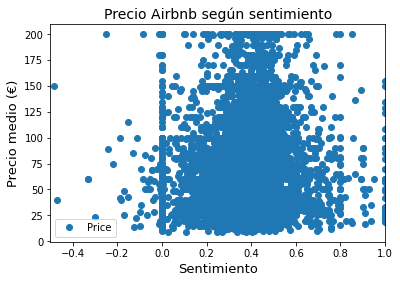

In [259]:
plt.figure(figsize=(20,4))
house_madrid.plot (x='sentiment', y='Price', style='o')
plt.title('Precio Airbnb según sentimiento', fontsize=14)
plt.xlabel('Sentimiento', fontsize=13)
plt.ylabel('Precio medio (€)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=-0.5)
plt.show()

Se aprecia que la mayoria están entorno al 0,4. Esta gráfica también nos indica que no parece haber relación entre el sentimiento que se ha obtenido de los reviews y el precio

### Topics

Voy a ver que Topic de las descripciones es el más habitual haciendo una gráfica

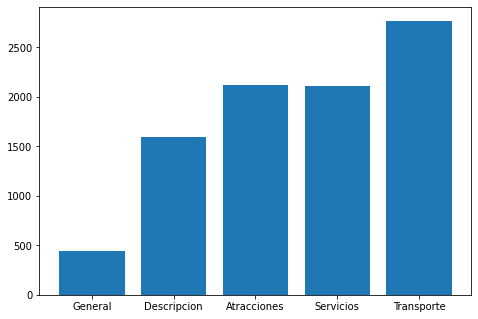

In [260]:
variables_to_plot = list(house_madrid.columns[house_madrid.columns.str.startswith("Topic_") == True])
topic_sum =[]
for i, var_name in enumerate(variables_to_plot):
  topic_sum.append (house_madrid[var_name].sum())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
topics = ['General', 'Descripcion', 'Atracciones', 'Servicios', 'Transporte']
ax.bar(topics,topic_sum)
plt.show()

Se puede ver que el topic más habitual en las descripciones es el de Transporte. Luego tenemos casi igualados los topics de Atracciones y Servicios. Ya más bajo tenemos Descripción y por último General

##  5.2. Analisis exploratorio de variables de tipo categórico

## neighbourhood_cleansed

Creo un dataframe para ver el número de viviendas y precio medio por barrio

In [0]:

barrio_df = pd.DataFrame(house_madrid.groupby('neighbourhood_cleansed').size())
barrio_df.rename(columns={0: 'number_of_listings'}, inplace=True)
barrio_df['median_price'] = house_madrid.groupby('neighbourhood_cleansed').Price.median().values

In [262]:
#Ordeno de mayor a menor por precio medio de los barrios
barrio_df.sort_values('median_price', ascending=False)

number_of_listings  median_price
neighbourhood_cleansed                                  
Recoletos                              105            80
Sol                                    693            80
Ibiza                                   76            79
Cortes                                 462            75
Palacio                                744            75
Universidad                            966            70
Goya                                   117            70
Justicia                               563            67
Trafalgar                              137            65
Embajadores                           1379            60
Argüelles                              135            60
Palos de Moguer                        182            60
Cuatro Caminos                          87            55
Guindalera                              83            55
Pacífico                               107            53
Acacias                                 87            50
Delicias                                97            49
Otro_Barrio                           2741            47
Puerta del Angel                       137            40
Numancia                                83            39
San Diego                               79            30

## property_type

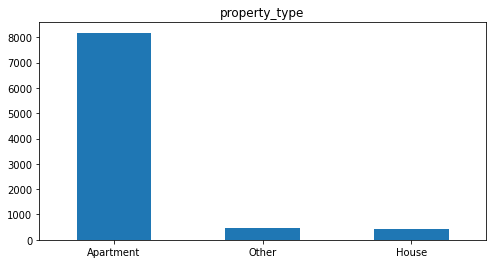

Apartment    0.902870
Other        0.051766
House        0.045364
Name: property_type, dtype: float64


In [263]:
figsize=(8,4)
plt.figure(figsize=figsize)
house_madrid['property_type'].value_counts().plot(kind='bar')
plt.title('property_type')
plt.xticks(rotation=0)
plt.show()
print(house_madrid['property_type'].value_counts(normalize=True))

El 90% de las viviendas son de tipo "Apartament". El resto está repartido entre los de tipo "House" y "Other" (otros tipos de viviendas, menos comunes)

## room_type

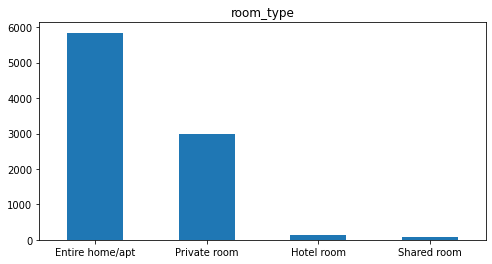

Entire home/apt    0.645143
Private room       0.330684
Hotel room         0.014790
Shared room        0.009382
Name: room_type, dtype: float64


In [264]:
figsize=(8,4)
plt.figure(figsize=figsize)
house_madrid['room_type'].value_counts().plot(kind='bar')
plt.title('room_type')
plt.xticks(rotation=0)
plt.show()
print(house_madrid['room_type'].value_counts(normalize=True))

El 64,5% de las viviendas son de alquiler completo "Entire home/apt". El 33% son "Private Room" mientras que solo un 1% son "Shared room" y Hotel romm"

## review_scores

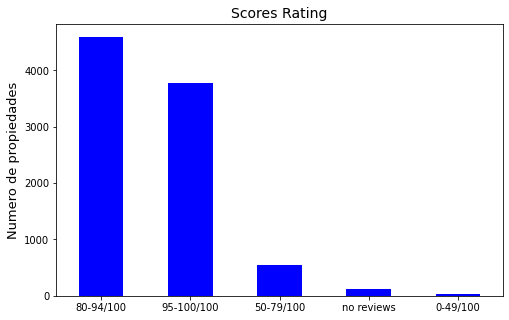

80-94/100     0.506954
95-100/100    0.416667
50-79/100     0.059603
no reviews    0.012914
0-49/100      0.003863
Name: review_scores_rating, dtype: float64


In [265]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Scores Rating', fontsize=14)
house_madrid['review_scores_rating'].value_counts().plot(kind='bar', ax=ax, color='b')
plt.xticks(rotation=0)
ax.set_ylabel('Numero de propiedades', fontsize=13)
plt.show()
print(house_madrid['review_scores_rating'].value_counts(normalize=True))

Se puede ver que la mayoría de las propiedades 50% tienen un rating entre 80-94 sobre 100 y un 41% entre 95-100 por lo que la opinión de los huéspedes es muy favorable

Veamos ahora todos los scores rating con sus categorías:


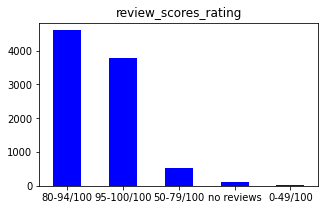

80-94/100     0.506954
95-100/100    0.416667
50-79/100     0.059603
no reviews    0.012914
0-49/100      0.003863
Name: review_scores_rating, dtype: float64


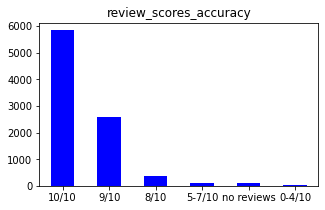

10/10         0.643598
9/10          0.285651
8/10          0.041280
5-7/10        0.013466
no reviews    0.012914
0-4/10        0.003091
Name: review_scores_accuracy, dtype: float64


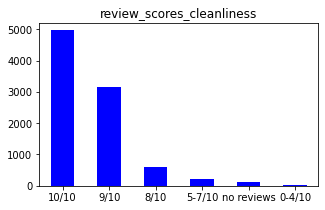

10/10         0.547572
9/10          0.347020
8/10          0.066225
5-7/10        0.023951
no reviews    0.012804
0-4/10        0.002428
Name: review_scores_cleanliness, dtype: float64


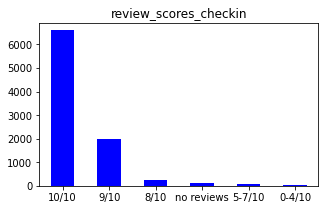

10/10         0.727704
9/10          0.220088
8/10          0.027152
no reviews    0.012804
5-7/10        0.009051
0-4/10        0.003201
Name: review_scores_checkin, dtype: float64


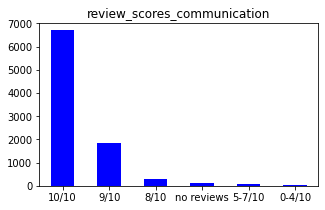

10/10         0.738742
9/10          0.203642
8/10          0.031898
no reviews    0.012804
5-7/10        0.010927
0-4/10        0.001987
Name: review_scores_communication, dtype: float64


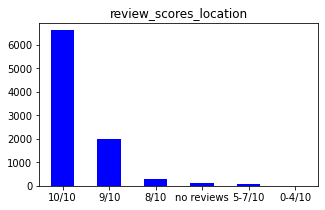

10/10         0.728587
9/10          0.219757
8/10          0.030795
no reviews    0.013024
5-7/10        0.006954
0-4/10        0.000883
Name: review_scores_location, dtype: float64


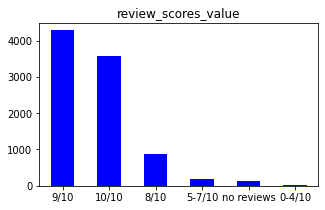

9/10          0.472075
10/10         0.395143
8/10          0.095916
5-7/10        0.020640
no reviews    0.013135
0-4/10        0.003091
Name: review_scores_value, dtype: float64


In [266]:
figsize= figsize=(5,3)
for col in list(house_madrid.columns[house_madrid.columns.str.startswith("review_scores") == True]):
    
    plt.figure(figsize=figsize)
    house_madrid[col].value_counts().plot(kind='bar', color='b')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()
    print(house_madrid[col].value_counts(normalize=True))
    
    
    

Vemos que para cada categoría la mayoría de las viviendas tienen una puntación de 10/10. Por debajo de 8 ya son raras las viviendas que hay. La más alta puntación se la lleva la categoría de Communication con un 74% de viviendas valoradas con un 10 y de Checkin con un 73%

## time_since_first_review  y time_since_last_review

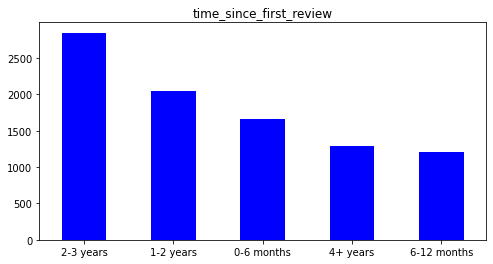

2-3 years      0.314570
1-2 years      0.226159
0-6 months     0.182892
4+ years       0.142494
6-12 months    0.133885
Name: time_since_first_review, dtype: float64


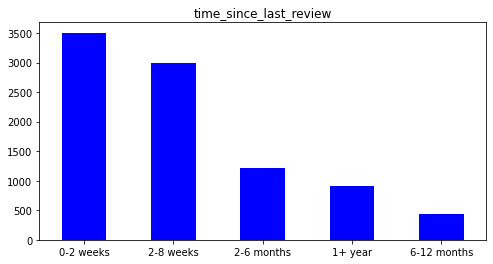

0-2 weeks      0.386755
2-8 weeks      0.329470
2-6 months     0.134327
1+ year        0.100993
6-12 months    0.048455
Name: time_since_last_review, dtype: float64


In [267]:
figsize = figsize=(8,4)
for col in ['time_since_first_review', 'time_since_last_review']:
    plt.figure(figsize=figsize)
    house_madrid[col].value_counts().plot(kind='bar', color='b')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()
    print(house_madrid[col].value_counts(normalize=True))

La mayoría de las propiedades tienen su primer review 2-3 años antes de la fecha de la toma de datos (09/11/2019), esto significa que la mayoría de las propiedades han estado activas al menos durante 2-3 años. 
Se ve además que la mayoría tienen su último review 0-2 semanas antes de la fecha de la toma de datos lo que significa que la mayoría están activas y recibiendo visitas

## host_response_rate

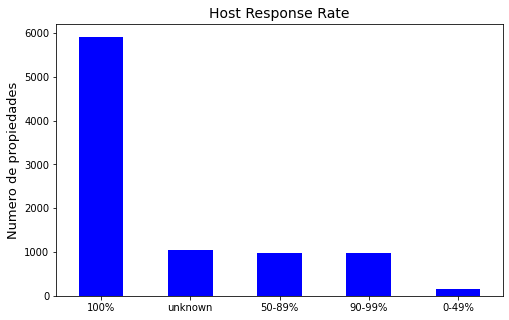

100%       0.652539
unknown    0.114459
50-89%     0.108057
90-99%     0.107285
0-49%      0.017660
Name: host_response_rate, dtype: float64


In [268]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Host Response Rate', fontsize=14)
house_madrid['host_response_rate'].value_counts().plot(kind='bar', ax=ax, color='b')
plt.xticks(rotation=0)
ax.set_ylabel('Numero de propiedades', fontsize=13)
plt.show()
print(house_madrid['host_response_rate'].value_counts(normalize=True))

El 65% de las anfitriones tienen un Host Response Rate del 100%. Hay un 11% que no tienen valoración

## dist_to

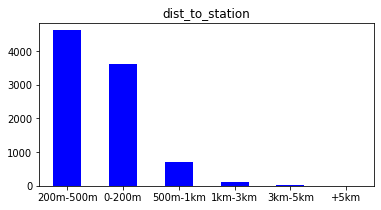

200m-500m    0.508830
0-200m       0.397903
500m-1km     0.078587
1km-3km      0.013024
3km-5km      0.001214
+5km         0.000442
Name: dist_to_station, dtype: float64


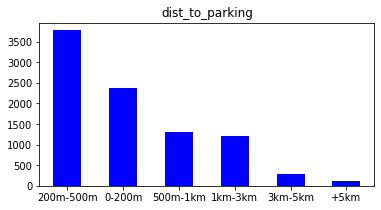

200m-500m    0.416225
0-200m       0.262362
500m-1km     0.143377
1km-3km      0.134216
3km-5km      0.032009
+5km         0.011810
Name: dist_to_parking, dtype: float64


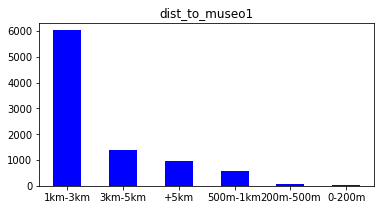

1km-3km      0.664459
3km-5km      0.154636
+5km         0.107395
500m-1km     0.064238
200m-500m    0.006623
0-200m       0.002649
Name: dist_to_museo1, dtype: float64


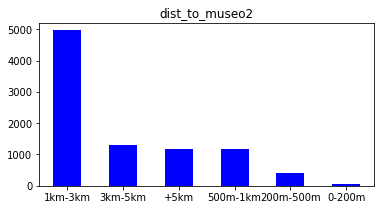

1km-3km      0.547572
3km-5km      0.143157
+5km         0.130132
500m-1km     0.128366
200m-500m    0.044371
0-200m       0.006402
Name: dist_to_museo2, dtype: float64


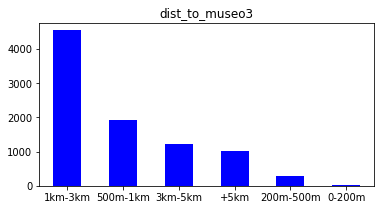

1km-3km      0.500993
500m-1km     0.213797
3km-5km      0.135651
+5km         0.113466
200m-500m    0.033113
0-200m       0.002980
Name: dist_to_museo3, dtype: float64


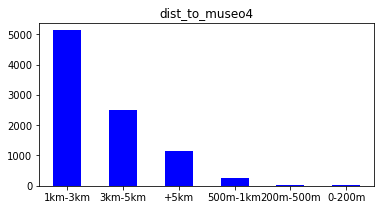

1km-3km      0.565453
3km-5km      0.276490
+5km         0.126490
500m-1km     0.027042
200m-500m    0.003422
0-200m       0.001104
Name: dist_to_museo4, dtype: float64


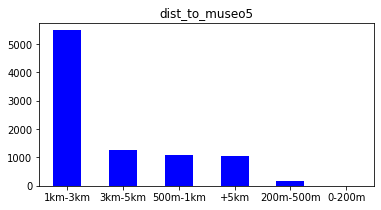

1km-3km      0.604636
3km-5km      0.137528
500m-1km     0.119647
+5km         0.117329
200m-500m    0.020199
0-200m       0.000662
Name: dist_to_museo5, dtype: float64


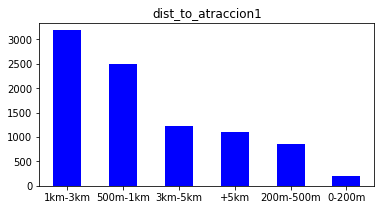

1km-3km      0.350993
500m-1km     0.275055
3km-5km      0.135320
+5km         0.122296
200m-500m    0.093709
0-200m       0.022627
Name: dist_to_atraccion1, dtype: float64


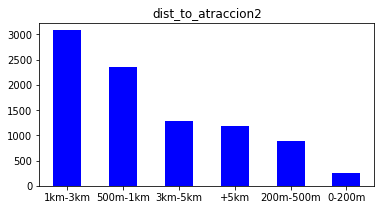

1km-3km      0.339514
500m-1km     0.259823
3km-5km      0.142163
+5km         0.130905
200m-500m    0.098896
0-200m       0.028698
Name: dist_to_atraccion2, dtype: float64


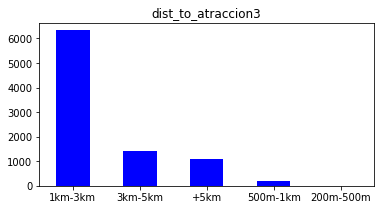

1km-3km      0.698124
3km-5km      0.158609
+5km         0.119757
500m-1km     0.023289
200m-500m    0.000221
Name: dist_to_atraccion3, dtype: float64


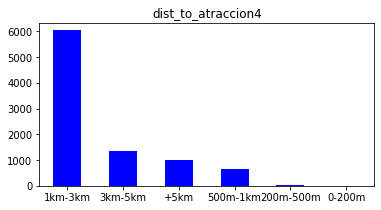

1km-3km      0.665784
3km-5km      0.147461
+5km         0.108720
500m-1km     0.071965
200m-500m    0.005408
0-200m       0.000662
Name: dist_to_atraccion4, dtype: float64


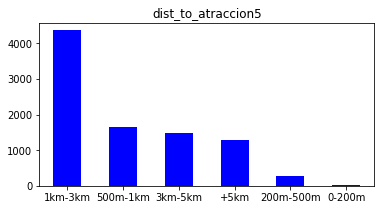

1km-3km      0.481457
500m-1km     0.181678
3km-5km      0.163245
+5km         0.143377
200m-500m    0.029249
0-200m       0.000993
Name: dist_to_atraccion5, dtype: float64


In [269]:
figsize= figsize=(6,3)
for col in list(house_madrid.columns[house_madrid.columns.str.startswith("dist_to") == True]):
    
    plt.figure(figsize=figsize)
    house_madrid[col].value_counts().plot(kind='bar', color='b')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()
    print(house_madrid[col].value_counts(normalize=True))

Análisis de las distancias:

- dist_to_station: distancia a la estación de metro más cercana. El 51% tiene una estación de metro a 200m-500m y casi el 40% a menos de 200m con lo cual las viviendas están muy bien comunicadas

- dist_to_parking: distancia al parking público más cercano. El 41% tiene un parking a 200m-500m, el 26% a menos de 200m y el 14% entre 500m y 1KM. Parece también que de normalidad las viviendas tienen parking público cercano

- dist_to_museo1: Distancia al Museo del Prado. El 66% tiene el Museo del Prado a una distancia entre 1Km-3Km. Un 6% lo tiene entre 500m y 1KM. Las viviendas por tanto no están alrededor del Museo del Prado sino a más distancia
- dist_to_museo2: Distancia al Museo Reina Sofía. El 55% tienen el Museo Reina Sofía a una distancia entre 1km-3km. Un 4% lo tienen entre 200m-500m
- dist_to_mueso3: Distancia al museo Thyssen. El 50% tiene una distancia al muse Thyssen de entre 1Km-3Km. Un 3% lo tienen entre 200m-500m
- dist_to_museo4: Distancia al Museo Sorolla. Un 56% tiene una distancia al Museo Sorolla de entre 1km-3km. Un 2% lo tienen a 500m-1km
- dist_to_mueso5: Distancia al Museo Arqueológico. Un 60% tiene el Museo Arqueológico a una distancia entre 1km-3km y un 2% lo tiene entre 200m y 500m

Vemos que la mayoría de las viviendas tienen por tanto los Museos a una distancia entre 1Km y 3Km

- dist_to_atraccion1: Distancia a la Puerta Del Sol. El 35% tiene la Puerta del Sol a una distancia entre 1Km-3Km. El 27% entre 500m-1Km y un 9% entre 200m-500m
- dist_to_atraacion2: Distancia a la Plaza Mayor. El 34% tienen la Plaza Mayor a una distancia entre 1km-3km. Un 2% la tienen a menos de 200m
- dist_to_atraccion3: Distancia al Parque del Retiro. Un 70% tiene el Retiro a una distancia entre 1km-3km. Un 2% lo tienen a una distancia entre 500m-1Km
- dist_to_atraccion4: Distancia a la Puerta de Alcalá. Un 66% tiene la Puerta de Alcalá a una distancia entre 1km-3km. El 7% lo tienen entre 500m-1Km
- dist_to_atraccion5: Distancia al Palacio Real. Un 48% tiene el Palacio Real a una distancia entre 1km-3km. Un 2% lo tienen entre 200m-500m.

Vemos que ocurre como con los museos, la mayoría de las viviendas tienen estos lugares importantes a una distancia de 1km-3km

Analizo ahora la relación existente entre las distancias y el precio

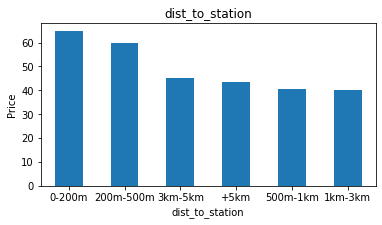

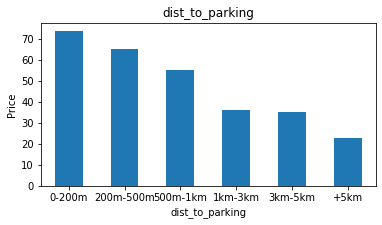

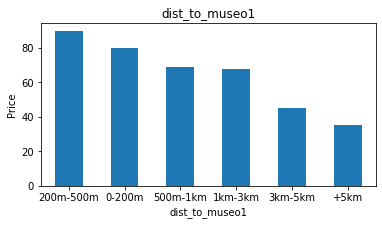

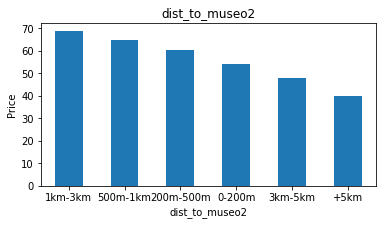

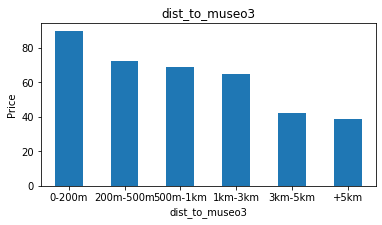

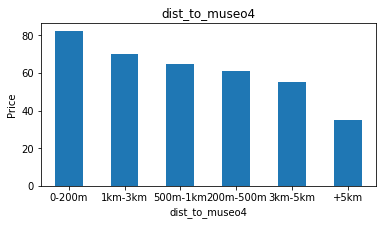

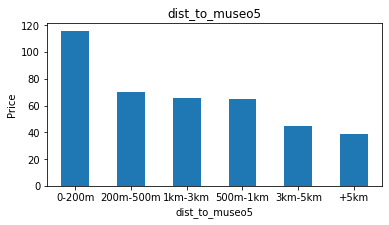

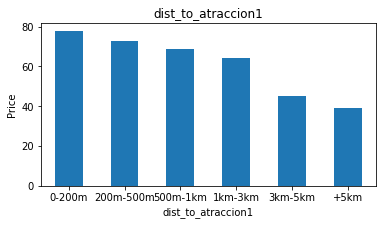

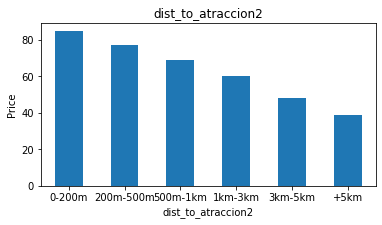

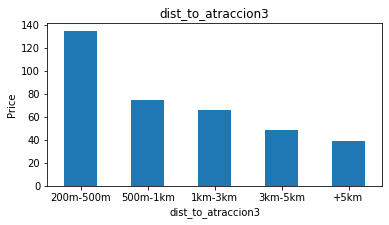

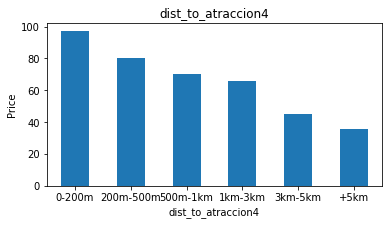

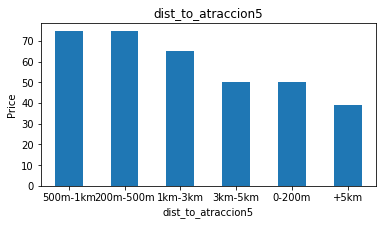

In [270]:
figsize= figsize=(6,3)
for col in list(house_madrid.columns[house_madrid.columns.str.startswith("dist_to") == True]):
    
    plt.figure(figsize=figsize)
    house_madrid.groupby(col).Price.median().sort_values(ascending=False).plot(kind='bar')
    plt.title(col)
    plt.ylabel('Price')
    plt.xticks(rotation=0)
    plt.show()
    

Podemos ver que salvo alguna exepción las distancias más cortas son las que tiene un precio de vivienda mayor

##  5.3. Analisis exploratorio de variables de tipo booleano

Muchas características son de tipo booleano (true o false). En esta parte de análisis veremos que proporción es true o false de cada característica y la media del precio de cada categoría para estudiar la relación entre esa categoría y el precio

In [0]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    house_madrid.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    house_madrid.groupby(col).Price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Precio medio (€)')
    ax2.set_xlabel('')
    
    plt.show()

In [272]:
house_madrid.head(2)

Price        id                                        picture_url  \
0     22  38356185  https://a0.muscache.com/im/pictures/68f98fef-0...   
1     59  30488431  https://a0.muscache.com/im/pictures/41930104-f...   

  host_response_time host_response_rate  host_is_superhost  \
0     within an hour               100%                0.0   
1     within an hour               100%                0.0   

   host_listings_count  host_identity_verified neighbourhood_cleansed  \
0                  2.0                     0.0               Delicias   
1                 63.0                     0.0            Embajadores   

   is_location_exact property_type        room_type  accommodates  bathrooms  \
0                  0     Apartment     Private room             1        1.0   
1                  1     Apartment  Entire home/apt             3        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  \
0       1.0   1.0                 0            20                1   
1       1.0   1.0               100            40                1   

   extra_people  minimum_nights  maximum_nights  availability_90  \
0             5               1            1125               58   
1            10               1            1125               21   

   number_of_reviews review_scores_rating review_scores_accuracy  \
0                  8           95-100/100                  10/10   
1                 15            80-94/100                   9/10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                     10/10                 10/10                       10/10   
1                      9/10                  9/10                        9/10   

  review_scores_location review_scores_value  instant_bookable  \
0                  10/10               10/10                 1   
1                  10/10                9/10                 1   

           cancellation_policy  sentiment  Topic_general  Topic_descripcion  \
0  strict_14_with_grace_period   0.156667        0.66538           0.037547   
1                     moderate   0.287834        0.00000           0.376716   

   Topic_atracciones  Topic_servicios  Topic_transporte dist_to_station  \
0           0.013976         0.061318          0.221778       200m-500m   
1           0.144895         0.424510          0.052503       200m-500m   

  dist_to_parking dist_to_museo1 dist_to_museo2 dist_to_museo3 dist_to_museo4  \
0         1km-3km        1km-3km        1km-3km        1km-3km        3km-5km   
1          0-200m        1km-3km         0-200m       500m-1km        3km-5km   

  dist_to_museo5 dist_to_atraccion1 dist_to_atraccion2 dist_to_atraccion3  \
0        1km-3km            1km-3km            1km-3km            1km-3km   
1       500m-1km           500m-1km            1km-3km            1km-3km   

  dist_to_atraccion4 dist_to_atraccion5  Dias_activo  Luggage dropoff allowed  \
0            1km-3km            1km-3km        846.0                      0.0   
1            1km-3km            1km-3km       1733.0                      1.0   

    TV  Room-darkening shades  Paid parking on premises  Microwave  \
0  1.0                    0.0                       0.0        0.0   
1  1.0                    0.0                       0.0        1.0   

   Smoking allowed  Laptop friendly workspace  Dryer  Host greets you  \
0              1.0                        0.0    0.0              0.0   
1              0.0                        1.0    0.0              1.0   

   Wide entrance for guests  Carbon monoxide detector  Dishwasher  \
0                       0.0                       0.0         0.0   
1                       0.0                       0.0         0.0   

   Coffee maker  Oven  Cooking basics  Hair dryer  Washer  Stove  \
0           0.0   0.0             0.0         0.0     1.0    0.0   
1           1.0   0.0             1.0         1.0     1.0    1.0   

   Patio or balcony  Elevator  Hot water  F

## host_is_superhost

Vamos a ver que proporción de anfitriones son Superhosts y si merece la pena ser uno de ellos en cuanto al precio

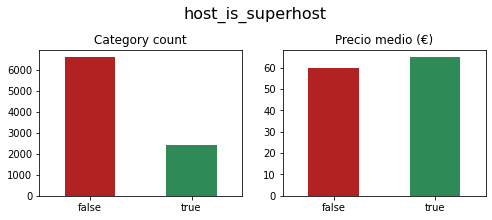

0.0    0.730905
1.0    0.269095
Name: host_is_superhost, dtype: float64


In [273]:
binary_count_and_price_plot('host_is_superhost')
print(house_madrid ['host_is_superhost'].value_counts(normalize=True))

Un 27% son Superhost y si parece que influye en el precio siendo el precio algo más alto, por lo que parece que merece la pena convertirse en Superhost

## is_location_exact

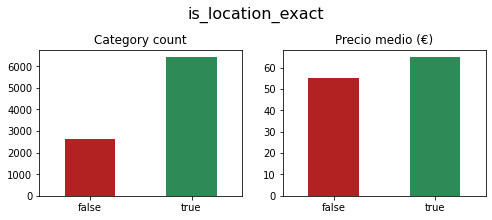

1    0.709161
0    0.290839
Name: is_location_exact, dtype: float64


In [274]:
binary_count_and_price_plot('is_location_exact')
print(house_madrid ['is_location_exact'].value_counts(normalize=True))

El 71% de las viviendas tiene localización exacta y parece influir positivamente en el precio

## host_identity_verified


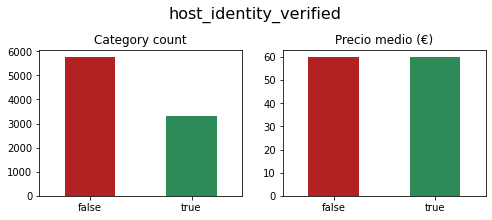

0.0    0.636203
1.0    0.363797
Name: host_identity_verified, dtype: float64


In [275]:
binary_count_and_price_plot('host_identity_verified')
print(house_madrid ['host_identity_verified'].value_counts(normalize=True))

Un 36% de los anfitriones tienen verificada su identidad. Cabría esperar que esto diera más confianza a los huéspedes pero se ve que a nivel de precio no hay diferencia. Podríamos plantearnos eliminar esta categoría aunque de momento la dejo por si tuviera interacciones con otras

## instant_bookable

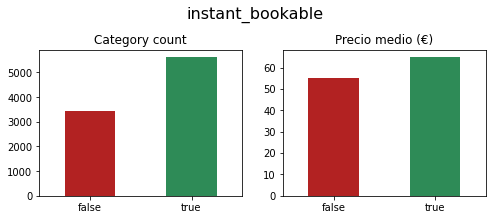

1    0.621302
0    0.378698
Name: instant_bookable, dtype: float64


In [276]:
binary_count_and_price_plot('instant_bookable')
print(house_madrid ['instant_bookable'].value_counts(normalize=True))

Un 62% de las propiedades se pueden alquilar de forma inmediata. Esta característica parece que influye positivamente en el precio.

## Amenities

Voy a ver que comodidad de las ofrecidas es la más común y cuales incrementa el precio de alquilé

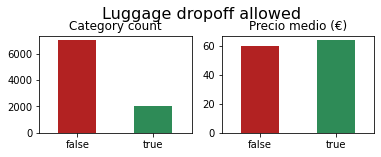

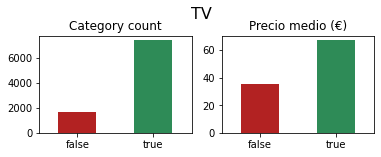

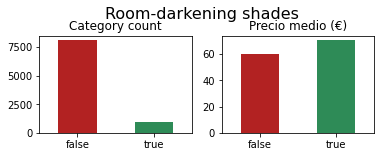

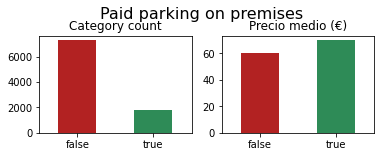

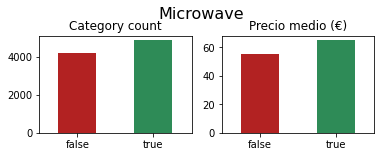

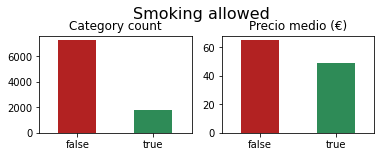

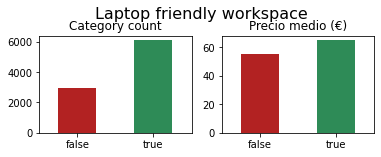

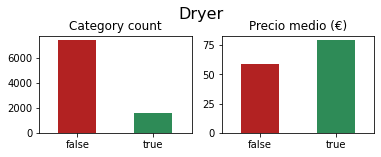

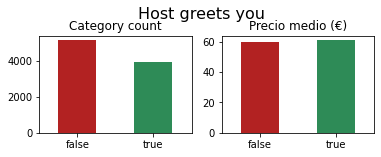

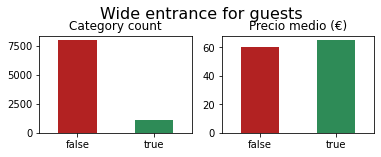

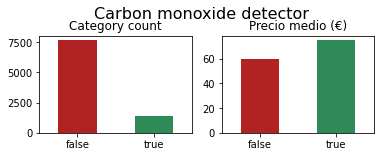

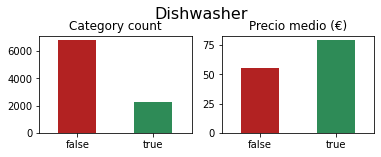

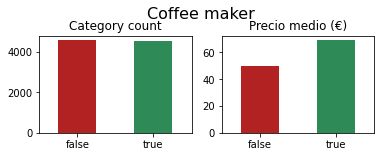

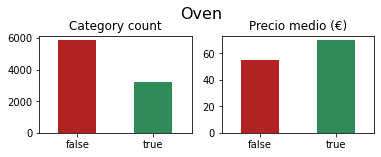

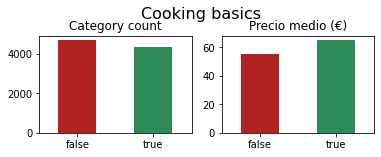

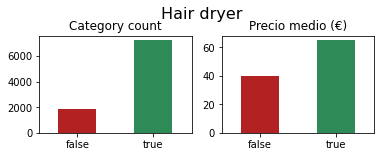

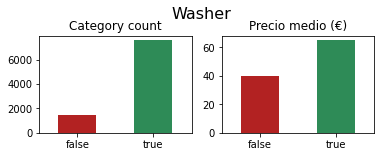

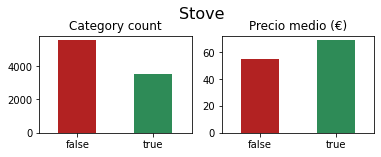

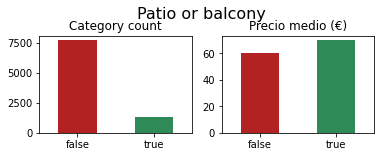

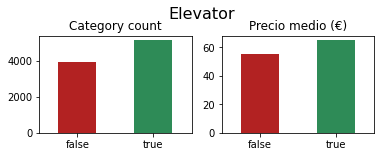

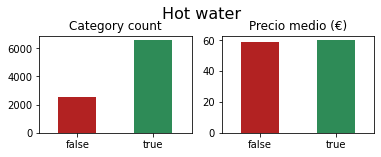

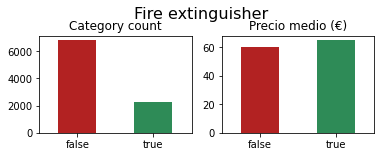

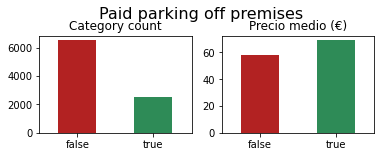

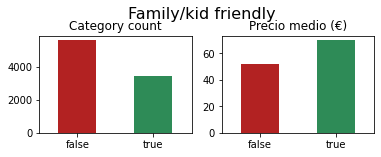

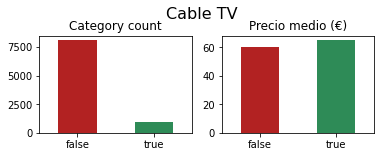

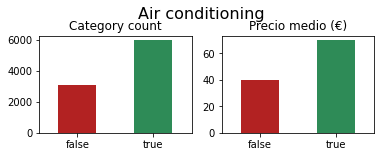

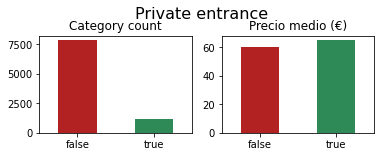

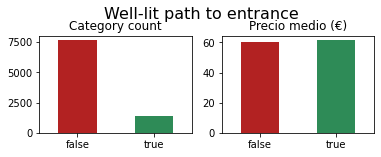

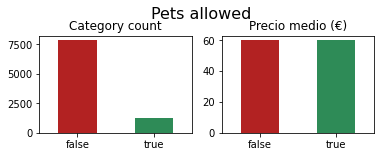

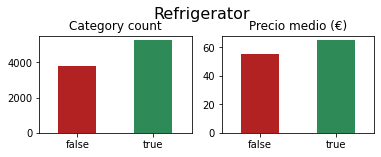

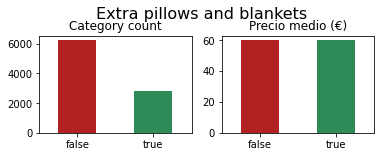

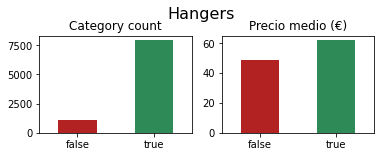

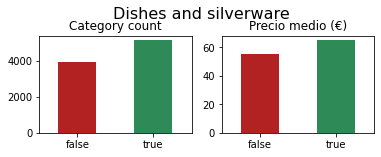

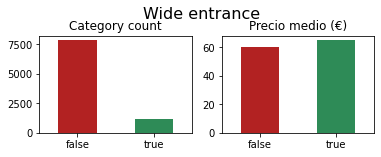

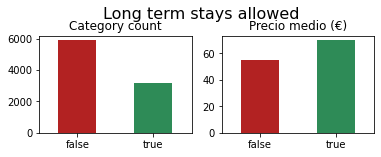

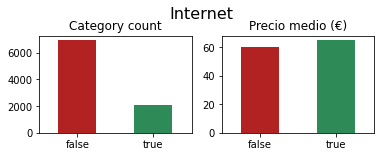

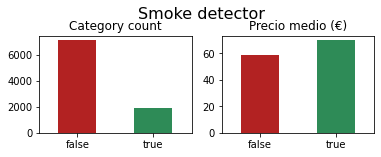

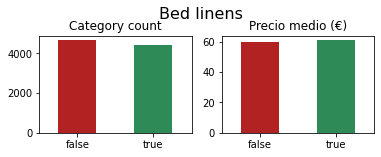

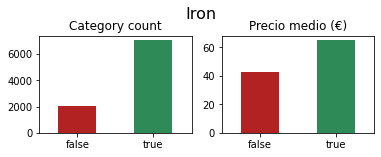

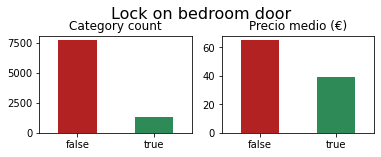

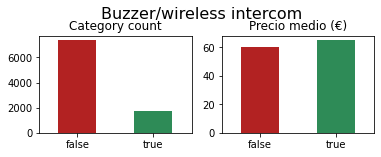

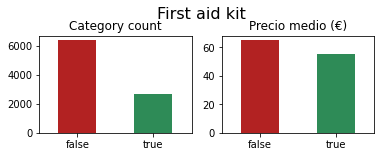

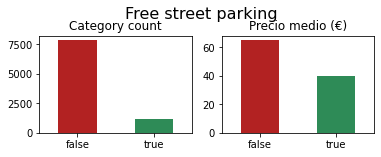

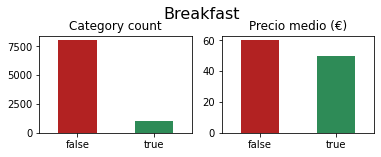

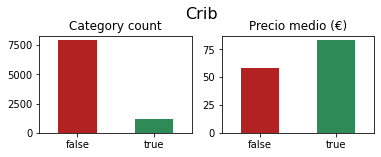

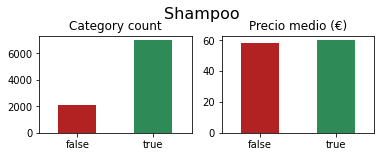

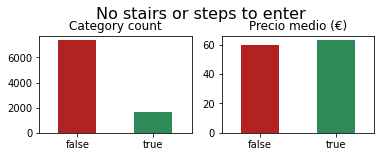

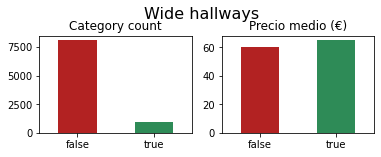

In [277]:
indice_inicial = house_madrid.columns.get_loc("Dias_activo")+1
indice_final = house_madrid.columns.get_loc("time_since_first_review")
for col in house_madrid.iloc[:,indice_inicial:indice_final].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

Tras analizar los gráficos anteriores podemos sacar dividir las características de esta forma:

Características poco comunes pero que aumentan el precio medio:

- Buzzer/wireless intercom
- Family/kid friendly
- Fire extinguisher
- Internet
- Dryer
- Oven
- Patio or balcony
- Private entrance
- Stove
- Paid parking off premises
- Wide entrance
- Crib
- Cable TV
- Room-darkening Shades
- Paid parking on premises
- Smoke detector
- Long term stays allowed
- Wide hallways
- Luggage dropoff allowed
- Dishwaver
- Wide entrance for guests


Características muy comunes y que aumentan el precio medio:

- Dishes and silverware
- TV
- Elevator
- Hair dryer
- Air Conditioning
- Washer
- Hangers
- Laptop friendly workspace
- Iron
- Microwave
- Refrigerator


Características poco comunes y que bajan el precio medio:

- Breakfast (probablemente porque estos sean de tipo bed&breakfast y por tanto no sean de alquilé completo por lo que el precio será menor)
- Lock on bedroom door
- Smoking allowed
- First aid kit  (no le veo mucho sentido)
- Free street parking 

Características poco comunes pero que no provocan diferencia de precio

- Pets allowed
- Well-lit path to entrance
- Host greets you
- No stairs or steps to enter
- Extra pillows and blankets




En base a este análisis para mejorar el precio de una vivienda habría que asegurarse de tener las características comunes y añadir alguna de las poco comunes que mejoran el precio

## 6.- Preparación de datos para el modelado

## 6.1.- Codificación de variables categóricas

Tenemos varias variables categóricas que hay que codificar para el modelado. Utilizo el método get_dummies que se puede aplicar directamente sobre el dataframe

In [278]:
transformed_df = pd.get_dummies(house_madrid.drop(['picture_url'], axis=1))
transformed_df.head()

Price        id  host_is_superhost  host_listings_count  \
0     22  38356185                0.0                  2.0   
1     59  30488431                0.0                 63.0   
2     70  35532108                0.0                 14.0   
3     58  16451687                0.0                 78.0   
4     70  29274213                1.0                  1.0   

   host_identity_verified  is_location_exact  accommodates  bathrooms  \
0                     0.0                  0             1        1.0   
1                     0.0                  1             3        1.0   
2                     0.0                  1             3        1.0   
3                     0.0                  1             4        1.0   
4                     0.0                  1             4        1.0   

   bedrooms  beds  security_deposit  cleaning_fee  guests_included  \
0       1.0   1.0                 0            20                1   
1       1.0   1.0               100            40                1   
2       1.0   3.0                 0             0                1   
3       1.0   2.0                 0            25                1   
4       2.0   3.0               100            50                2   

   extra_people  minimum_nights  maximum_nights  availability_90  \
0             5               1            1125               58   
1            10               1            1125               21   
2             0               1            1125               63   
3             0               1              28               64   
4            12               3            1000               75   

   number_of_reviews  instant_bookable  sentiment  Topic_general  \
0                  8                 1   0.156667        0.66538   
1                 15                 1   0.287834        0.00000   
2                  6                 0   0.383571        0.00000   
3                152                 1   0.395745        0.00000   
4                 29                 1   0.363727        0.00000   

   Topic_descripcion  Topic_atracciones  Topic_servicios  Topic_transporte  \
0           0.037547           0.013976         0.061318          0.221778   
1           0.376716           0.144895         0.424510          0.052503   
2           0.247445           0.238780         0.076406          0.428331   
3           0.000000           0.087998         0.885204          0.015973   
4           0.189738           0.021387         0.436604          0.350983   

   Dias_activo  Luggage dropoff allowed   TV  Room-darkening shades  \
0        846.0                      0.0  1.0                    0.0   
1       1733.0                      1.0  1.0                    0.0   
2        170.0                      0.0  1.0                    0.0   
3       1059.0                      0.0  1.0                    0.0   
4        807.0                      0.0  1.0                    0.0   

   Paid parking on premises  Microwave  Smoking allowed  \
0                       0.0        0.0              1.0   
1                       0.0        1.0              0.0   
2                       0.0        1.0              0.0   
3                       0.0        1.0              1.0   
4                       0.0        1.0              0.0   

   Laptop friendly workspace  Dryer  Host greets you  \
0                        0.0    0.0              0.0   
1                        1.0    0.0              1.0   
2                        0.0    1.0              0.0   
3                        1.0    0.0              0.0   
4                        1.0    0.0              0.0   

   Wide entrance for guests  Carbon monoxide detector  Dishwasher  \
0                       0.0                       0.0         0.0   
1                       0.0                       0.0         0.0   
2                       0.0                       0.0         0.0   
3                       1.0                       0.0         0.0   
4                  

## 6.2. Análsis de correlación

El siguiente paso consiste en evaluar las correlaciones entre las diferente variables del problema. Habitualmente, esto nos puede servir para identificar posibles atributos que estén altamente correlacionados. Las altamente correladas se podrían eliminar

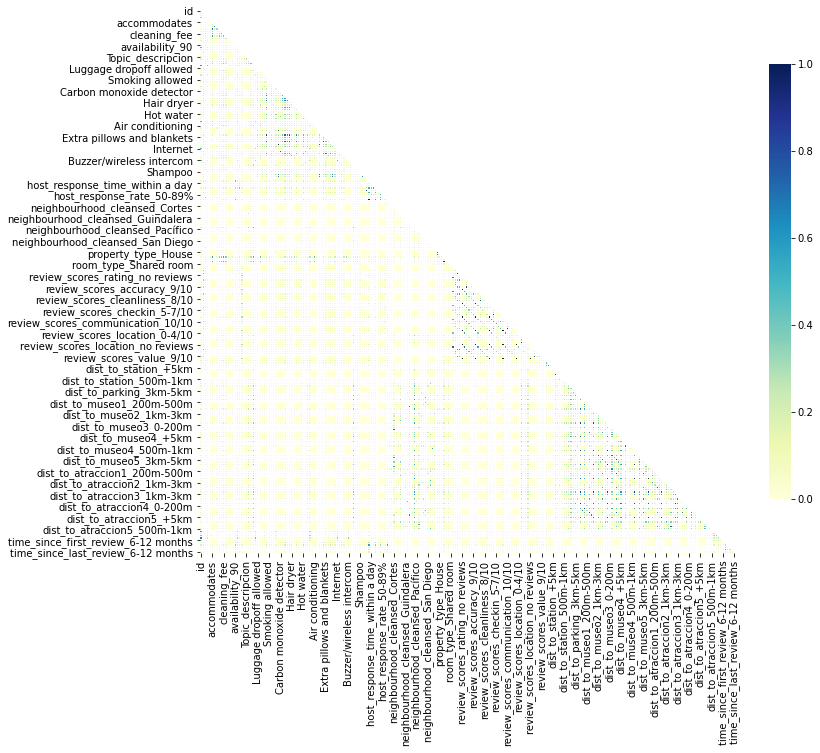

In [279]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(transformed_df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

No parece haber una ninguna correlación relevante con los barrios así que temporalmente los voy a quitar para poder ver el mapa anterior más claro

In [0]:
transformed_df_sinbarrios = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood')]), axis=1)

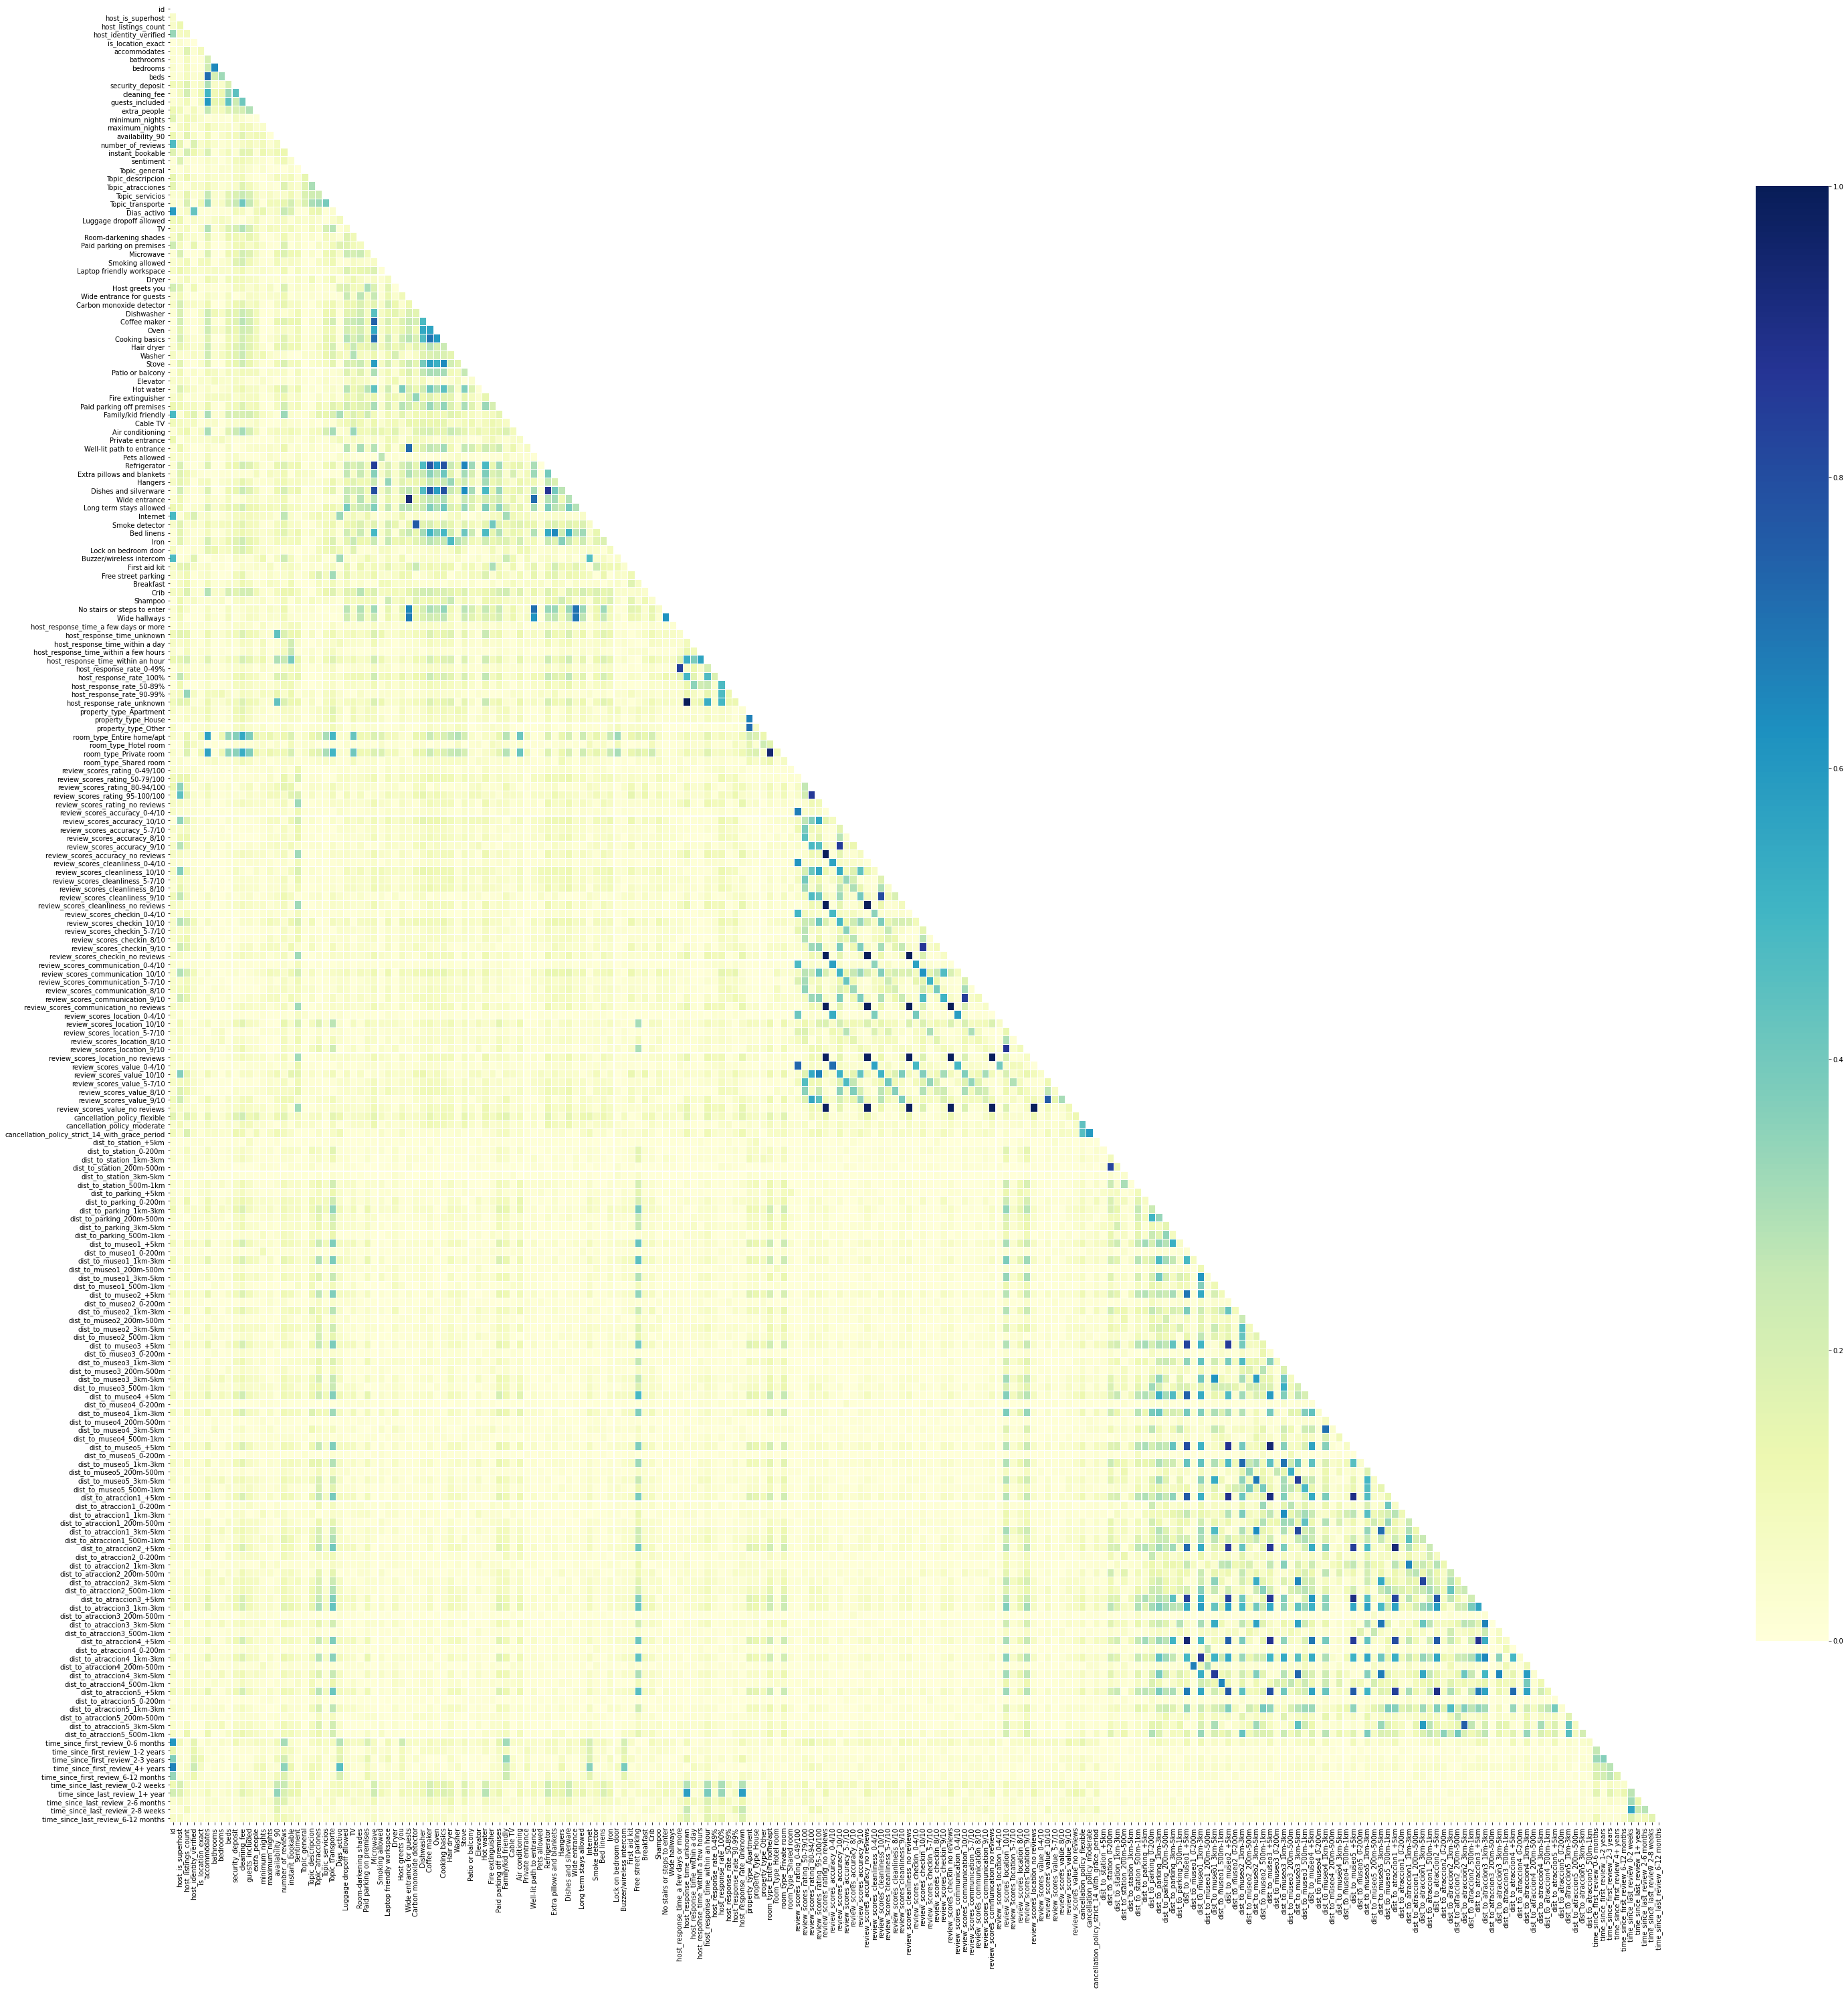

In [281]:
# Compute the correlation matrix
corr = np.abs(transformed_df_sinbarrios.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Tras analizar la matriz de correlación vemos:

- Beds, Beedrooms, Accomodates y Guest Included están altamente correlados. Me voy a quedar con Accomodates que suele ser el parámetro que se usa más en la búsquedas y eliminaré los otros 3

- A nivel de Amenities se ve que existe alta correlación entre "Wide entrance", "Wide hallways", "Well-lit path to entrance", "Wide entrance for guests". Me quedo con "Wide entrance" y elimino las otras dos.

- A nivel de Amenities se ve que existe alta correlación entre " Carbon monoxide detector" y "Smoke detector" lo cual tiene sentido porque seguramente se usa el mismo dispositivo. Me quedo con "Smoke detector" y elimino la otra

- A nivel de Amenities se ve que existe alta correlación entre "Cooking basics" y "Dishes and silverware". Me quedo con "Cooking basics" y elimino la otra

- También existe una alta correlación entre "Host Response Rate_0-49%" y "Host Response Time_a few days or more". Elimino "Host Response Rate_0-49%"

- Alta correlación hay también entre "host_response_rate_unknown" y "host_response_time_unknown. Elimino "host_response_rate_unknown"

- Igualmente existe alta correlación negativa entre "property_type_Apartment" y "property_type_House". Voy a eliminar "property_type_House y me quedo con la de tipo Apartamento.

- Tenemos también alta correlación negativa entre "room_type_Entire home/apt" y "room_type_Private room". Voy a eliminar "room_type_Private room"

- Y por último obviamente tenemos una alta correlación entre las diferentes categoría de "review_scores" de tipo "no reviews" y "time_since_first_review_no reviews" y "time_since_last_review_no reviews". Elimino todas estas caractarísticas "no review"

In [0]:
to_drop = ['beds',
           'bedrooms',
           'guests_included',
           'Wide hallways',
           'Well-lit path to entrance',
           'Wide entrance for guests',
           'Carbon monoxide detector',
           'Dishes and silverware',
           'host_response_rate_0-49%',
           'host_response_rate_unknown',
           'property_type_House',
           'room_type_Private room']

to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('no reviews')]))
           
           

In [0]:
transformed_df.drop(to_drop, axis=1, inplace=True)

In [284]:
transformed_df.head(5)

Price        id  host_is_superhost  host_listings_count  \
0     22  38356185                0.0                  2.0   
1     59  30488431                0.0                 63.0   
2     70  35532108                0.0                 14.0   
3     58  16451687                0.0                 78.0   
4     70  29274213                1.0                  1.0   

   host_identity_verified  is_location_exact  accommodates  bathrooms  \
0                     0.0                  0             1        1.0   
1                     0.0                  1             3        1.0   
2                     0.0                  1             3        1.0   
3                     0.0                  1             4        1.0   
4                     0.0                  1             4        1.0   

   security_deposit  cleaning_fee  extra_people  minimum_nights  \
0                 0            20             5               1   
1               100            40            10               1   
2                 0             0             0               1   
3                 0            25             0               1   
4               100            50            12               3   

   maximum_nights  availability_90  number_of_reviews  instant_bookable  \
0            1125               58                  8                 1   
1            1125               21                 15                 1   
2            1125               63                  6                 0   
3              28               64                152                 1   
4            1000               75                 29                 1   

   sentiment  Topic_general  Topic_descripcion  Topic_atracciones  \
0   0.156667        0.66538           0.037547           0.013976   
1   0.287834        0.00000           0.376716           0.144895   
2   0.383571        0.00000           0.247445           0.238780   
3   0.395745        0.00000           0.000000           0.087998   
4   0.363727        0.00000           0.189738           0.021387   

   Topic_servicios  Topic_transporte  Dias_activo  Luggage dropoff allowed  \
0         0.061318          0.221778        846.0                      0.0   
1         0.424510          0.052503       1733.0                      1.0   
2         0.076406          0.428331        170.0                      0.0   
3         0.885204          0.015973       1059.0                      0.0   
4         0.436604          0.350983        807.0                      0.0   

    TV  Room-darkening shades  Paid parking on premises  Microwave  \
0  1.0                    0.0                       0.0        0.0   
1  1.0                    0.0                       0.0        1.0   
2  1.0                    0.0                       0.0        1.0   
3  1.0                    0.0                       0.0        1.0   
4  1.0                    0.0                       0.0        1.0   

   Smoking allowed  Laptop friendly workspace  Dryer  Host greets you  \
0              1.0                        0.0    0.0              0.0   
1              0.0                        1.0    0.0              1.0   
2              0.0                        0.0    1.0              0.0   
3              1.0                        1.0    0.0              0.0   
4              0.0                        1.0    0.0              0.0   

   Dishwasher  Coffee maker  Oven  Cooking basics  Hair dryer  Washer  Stove  \
0         0.0           0.0   0.0             0.0         0.0     1.0    0.0   
1         0.0           1.0   0.0             1.0         1.0     1.0    1.0   
2         0.0           0.0   0.0             0.0         1.0     1.0    0.0   
3         0.0           1.0   0.0             1.0         1.0     1.0    1.0   
4         0.0           1.0   1.0             1.0         1.0     1.0    1.0   

   Patio or balcony  Elevator  Hot water  Fire extinguisher  \
0               0.0       0.0        1.0         

Así quedan ahora las correlaciones:

In [0]:
transformed_df_sinbarrios = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('Neighbourhood')]), axis=1)

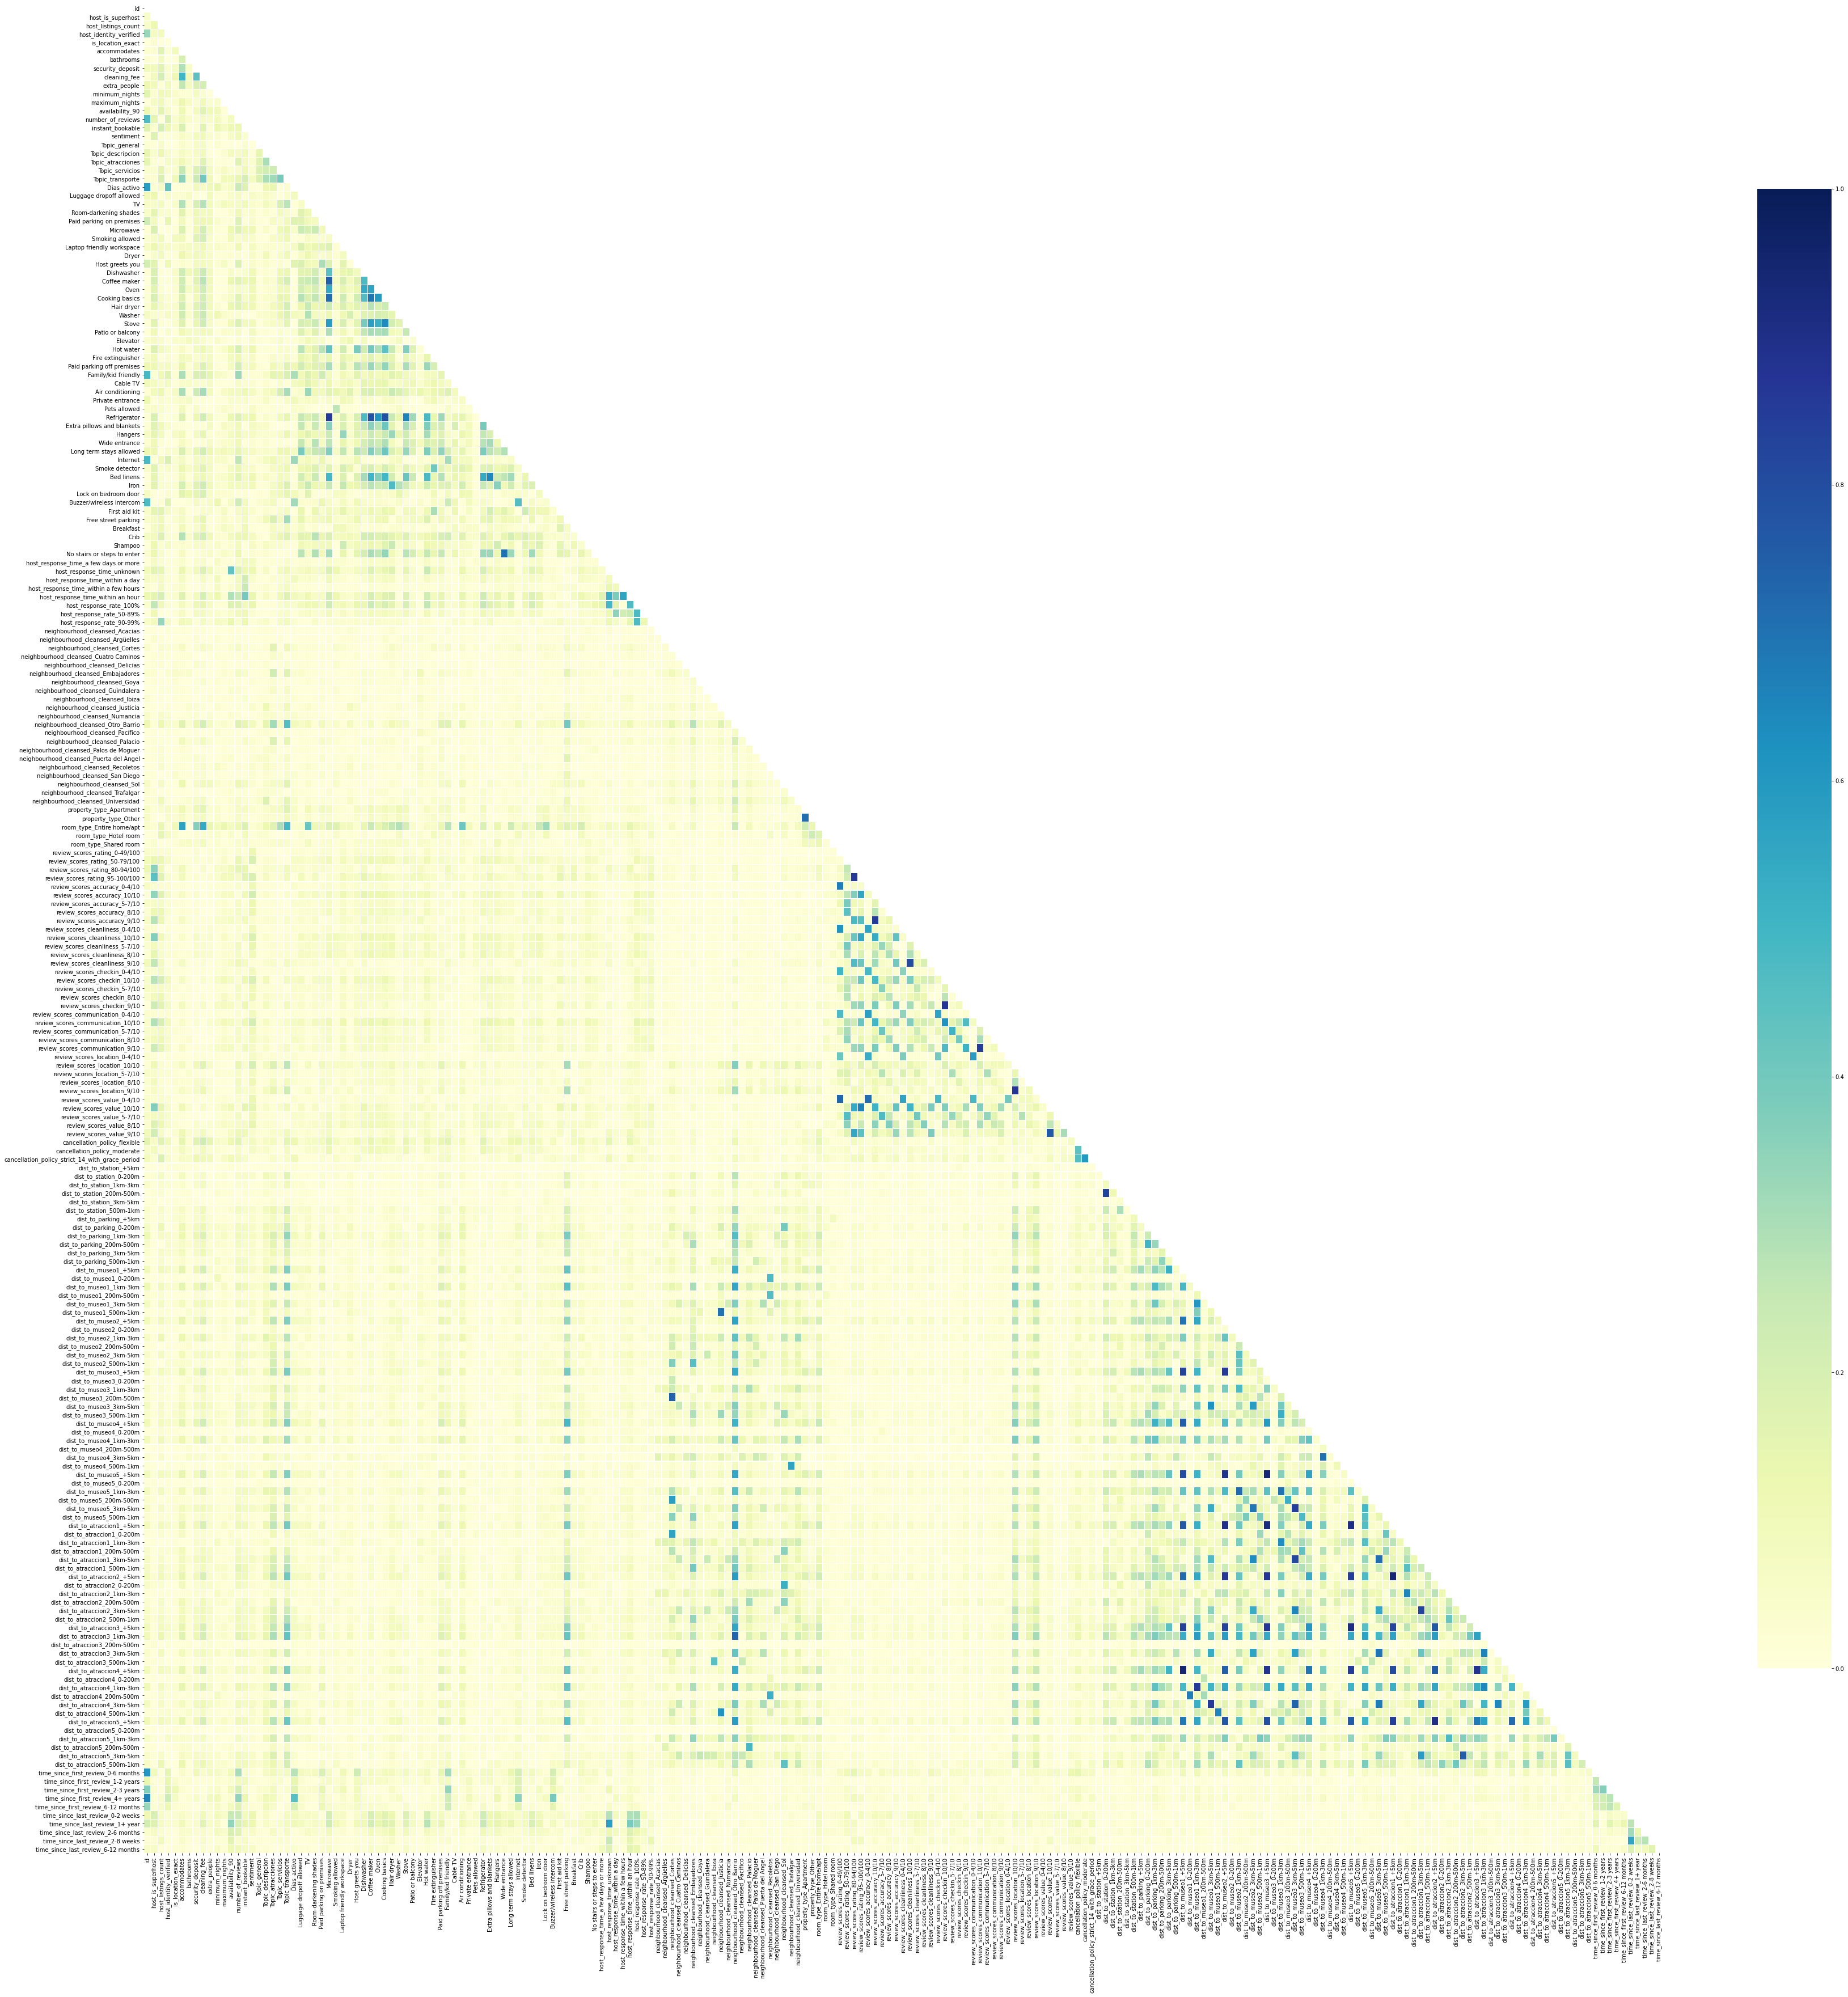

In [286]:
# Compute the correlation matrix
corr = np.abs(transformed_df_sinbarrios.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 60))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Se ve que aun quedan algunas características correladas por ejemplo si una propiedad tiene una categoría de review con 10/10 suele tener otro 10/10 en otras categorías. De momento lo voy a dejar y luego veré si experimentando con ellas se consigue mejorar el modelo

## 6.3. Estandarización y Normalización

Voy a representar el histograma de las variables numéricas para ver si a algunas de ellas se les podría aplicar alguna transformación logarítmica

In [287]:
transformed_df.head(5)

Price        id  host_is_superhost  host_listings_count  \
0     22  38356185                0.0                  2.0   
1     59  30488431                0.0                 63.0   
2     70  35532108                0.0                 14.0   
3     58  16451687                0.0                 78.0   
4     70  29274213                1.0                  1.0   

   host_identity_verified  is_location_exact  accommodates  bathrooms  \
0                     0.0                  0             1        1.0   
1                     0.0                  1             3        1.0   
2                     0.0                  1             3        1.0   
3                     0.0                  1             4        1.0   
4                     0.0                  1             4        1.0   

   security_deposit  cleaning_fee  extra_people  minimum_nights  \
0                 0            20             5               1   
1               100            40            10               1   
2                 0             0             0               1   
3                 0            25             0               1   
4               100            50            12               3   

   maximum_nights  availability_90  number_of_reviews  instant_bookable  \
0            1125               58                  8                 1   
1            1125               21                 15                 1   
2            1125               63                  6                 0   
3              28               64                152                 1   
4            1000               75                 29                 1   

   sentiment  Topic_general  Topic_descripcion  Topic_atracciones  \
0   0.156667        0.66538           0.037547           0.013976   
1   0.287834        0.00000           0.376716           0.144895   
2   0.383571        0.00000           0.247445           0.238780   
3   0.395745        0.00000           0.000000           0.087998   
4   0.363727        0.00000           0.189738           0.021387   

   Topic_servicios  Topic_transporte  Dias_activo  Luggage dropoff allowed  \
0         0.061318          0.221778        846.0                      0.0   
1         0.424510          0.052503       1733.0                      1.0   
2         0.076406          0.428331        170.0                      0.0   
3         0.885204          0.015973       1059.0                      0.0   
4         0.436604          0.350983        807.0                      0.0   

    TV  Room-darkening shades  Paid parking on premises  Microwave  \
0  1.0                    0.0                       0.0        0.0   
1  1.0                    0.0                       0.0        1.0   
2  1.0                    0.0                       0.0        1.0   
3  1.0                    0.0                       0.0        1.0   
4  1.0                    0.0                       0.0        1.0   

   Smoking allowed  Laptop friendly workspace  Dryer  Host greets you  \
0              1.0                        0.0    0.0              0.0   
1              0.0                        1.0    0.0              1.0   
2              0.0                        0.0    1.0              0.0   
3              1.0                        1.0    0.0              0.0   
4              0.0                        1.0    0.0              0.0   

   Dishwasher  Coffee maker  Oven  Cooking basics  Hair dryer  Washer  Stove  \
0         0.0           0.0   0.0             0.0         0.0     1.0    0.0   
1         0.0           1.0   0.0             1.0         1.0     1.0    1.0   
2         0.0           0.0   0.0             0.0         1.0     1.0    0.0   
3         0.0           1.0   0.0             1.0         1.0     1.0    1.0   
4         0.0           1.0   1.0             1.0         1.0     1.0    1.0   

   Patio or balcony  Elevator  Hot water  Fire extinguisher  \
0               0.0       0.0        1.0         

In [0]:
numerical_columns = ['Price', 'host_listings_count', 'accommodates', 'bathrooms', 'security_deposit',
                    'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_90', 'number_of_reviews',
                    'sentiment', 'Topic_general', 'Topic_descripcion', 'Topic_servicios', 'Topic_transporte','Dias_activo']

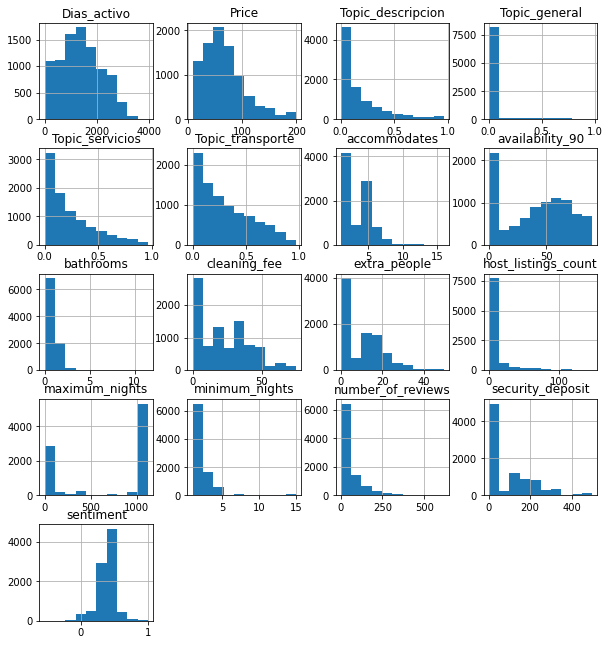

In [289]:
transformed_df[numerical_columns].hist(figsize=(10,11));

A exepción de  "Availability 90", "Dias_activo" y "sentiment" el resto de características numéricas se ve como están desplazadas hacia los laterales de la gráfica por lo que se pueden beneficiar de una transformación logarítmica 

In [0]:
# Transformación logarítmica de columnas
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'Dias_activo', 'sentiment']] # Quito las que no se van a transformar

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

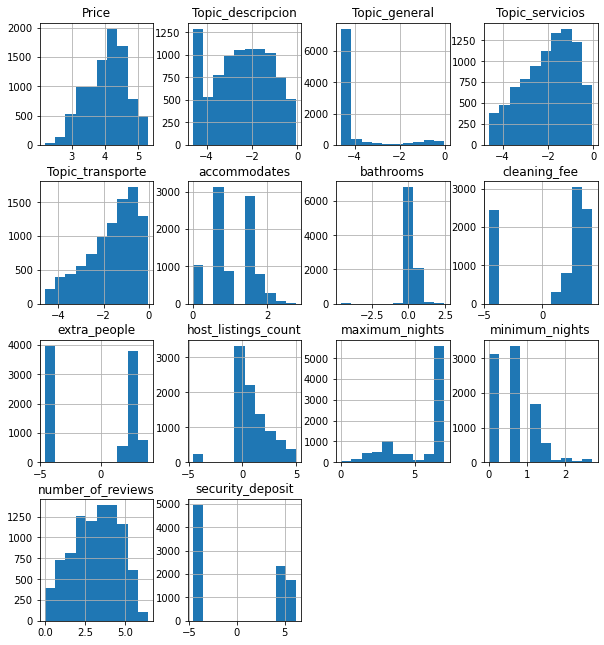

In [291]:
transformed_df[numerical_columns].hist(figsize=(10,11));

Vemos como la transformación ayuda al algunas variable sobre todo a la de Price que ahora aparace mucho más normalmente distribuida. Hay otras como "cleaning_fee", "extra_people" y "security_deposit" que contienen muchos 0 lo cual significa que no están normalmente distribuidas

En este momento voy a guardar el dataset de train con todas sus transformaciones

In [0]:
#Guardo el transformed_df resultante
path_df = ruta + 'data/listings_train.csv'
listings_train = transformed_df.to_csv(path_df, header=True)

## 6.4. Aplicar todas las transformaciones a las muestra de test

Antes de comenzar con el modelado tengo que coger las muestras de test que aparté en un principio y aplicarle todas las transformaciones que se le han hecho a las muestras de train

In [0]:
#Convierto de nuevo a pandas para seguir con el procesamiento
datos_test = pd.DataFrame(datos_test)

#Añado el nombre de las columnas
datos_test.columns = feature_names

precios_df = pd.DataFrame(price_test)
precios_df.columns = ['Price']

#Uno los dos dataframe para seguir con el analisis
house_data_test = pd.concat([precios_df, datos_test], axis=1)



In [294]:
house_data_test.head(3)

Price        id                            listing_url       scrape_id  \
0  $98.00  16064559  https://www.airbnb.com/rooms/16064559  20191109094951   
1  $60.00  12703101  https://www.airbnb.com/rooms/12703101  20191109094951   
2  $90.00  13434343  https://www.airbnb.com/rooms/13434343  20191109094951   

  last_scraped                               name  \
0   2019-11-09    Nuevo: Colonial Puerta del Sol.   
1   2019-11-09  Vintage Apartment Plaza de España   
2   2019-11-09        APARTMENT MADRID CENTER SOL   

                                             summary  \
0  Entre la puerta del Sol y el Palacio Real, en ...   
1  Acogedor y precioso apartamento estilo vintage...   
2  Lugares de interés: Gran Vía y El Corte Inglés...   

                                               space  \
0  En pleno centro de Madrid, entre la Puerta del...   
1  Staying in our aparment it will be an unique e...   
2                                                NaN   

                                         description experiences_offered  \
0  puerta sol palacio real centro madrid cerca pa...                none   
1  acogedor y precioso apartamento estilo vintage...                none   
2  lugares interés gran vía corte inglés alojamie...                none   

                               neighborhood_overview  \
0  En pleno centro de Madrid, entre la Puerta del...   
1  The neighbourhood is Argüelles, close to the k...   
2                                                NaN   

                                               notes  \
0  Cualquier cuestión que puede afectarte en tu e...   
1  We ask to our guests for long term stays to co...   
2                                                NaN   

                                             transit  \
0  METRO L3 (línea amarilla): Sol, salida hacia c...   
1  The cheapest way to get to the apartment from ...   
2                                                NaN   

                                              access  \
0  En tu estancia tendrás acceso a toda la superf...   
1  The apartment has a private terrace of 20 squa...   
2                                                NaN   

                                         interaction  \
0  Desde tus consultas por mi apartamento, tu res...   
1  At the checkin and at the checkout moment and ...   
2                                                NaN   

                                         house_rules thumbnail_url medium_url  \
0                                                NaN           NaN        NaN   
1  We ask our guests to use the house whith commo...           NaN        NaN   
2                                                NaN           NaN        NaN   

                                         picture_url xl_picture_url   host_id  \
0  https://a0.muscache.com/im/pictures/3ed653e5-8...            NaN  29053317   
1  https://a0.muscache.com/im/pictures/b1598281-5...            NaN   5200972   
2  https://a0.muscache.com/im/pictures/3fe32f8f-6...            NaN  69600676   

                                     host_url        host_name  host_since  \
0  https://www.airbnb.com/users/show/29053317  Doris Y Ángeles  2015-03-09   
1   https://www.airbnb.com/users/show/5200972            Marta  2013-02-23   
2  https://www.airbnb.com/users/show/69600676     Maria Noelia  2016-04-30   

                        host_location  \
0  Madrid, Community of Madrid, Spain   
1  Madrid, Community of Madrid, Spain   
2  Madrid, Community of Madrid, Spain   

                                          host_about  host_response_time  \
0               Feliz recibiendo viajeros en Madrid.      within an hour   
1  Five things I couldn´t live without? Air, food...  within a few hours   
2  Soy Maria, una anfitriona que se encargará que...      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                98%                  NaN                 f   
1               100%                  N

Aplico a las muestras de test las mimas transformaciones que he aplicado a las de train sin mirar los datos

In [0]:
caracteristicas_para_borrar = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary','space', 'description', 
                               'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
                              'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_id', 'host_url',
                              'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                              'host_neighbourhood', 'host_verifications', 'calendar_last_scraped','idioma', 'aux' 
                              ]
house_data_test.drop (caracteristicas_para_borrar, axis=1, inplace=True)

house_data_test.drop (['host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'license',
                        'jurisdiction_names'], axis=1, inplace=True)

house_data_test.drop (['host_total_listings_count'], axis=1, inplace=True)
house_data_test.drop (['calculated_host_listings_count'], axis=1, inplace=True)

house_data_test.drop (['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

house_data_test.drop (['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                        'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

house_data_test.replace({'f': 0, 't': 1}, inplace=True)

house_data_test.dropna(subset=['city'], inplace=True)

house_madrid = house_data_test 
house_madrid.drop (['city'], axis=1, inplace=True)
house_madrid.drop (['state', 'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'zipcode', 'market', 
                    'smart_location',  'country_code', 'country', 'latitude', 'longitude'], axis=1, inplace=True)


house_madrid.dropna(subset=['Price'], inplace=True) 
house_madrid.Price = house_madrid.Price.str[1:-3]
house_madrid.Price = house_madrid.Price.str.replace(",", "")
house_madrid.Price = house_madrid.Price.astype('int64')
    
house_madrid.drop (['experiences_offered'], axis=1, inplace=True)

house_madrid ['host_since'] = pd.to_datetime(house_madrid ['host_since']) 
# Calculo el número de dias
house_madrid['Dias_activo'] = (datetime(2019, 11, 9) - house_madrid['host_since']).astype('timedelta64[D]')
# Si hay valores nulos los sustituyo por la mediana calculada en train
house_madrid.Dias_activo.fillna(mediana_host_since, inplace=True)
house_madrid.drop (['host_since'], axis=1, inplace=True)

house_madrid ['host_response_time'].fillna("unknown", inplace=True)

#Elimino el signo % y transformo a float64
house_madrid['host_response_rate'] = house_madrid['host_response_rate'].str[:-1].astype('float64')

# Los agrupo en 4 categorías
house_madrid['host_response_rate'] = pd.cut(house_madrid['host_response_rate'], 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)
# Convierto a cadena
house_madrid['host_response_rate'] = house_madrid['host_response_rate'].astype('str')
# Sustituyo los null por 'unknown'
house_madrid['host_response_rate'].replace('nan', 'unknown', inplace=True)

house_madrid ['host_is_superhost'] [house_madrid ['host_is_superhost'].isnull()]=0

 
house_madrid ['host_listings_count'] = pd.to_numeric(house_madrid ['host_listings_count']) 
house_madrid['host_listings_count'].fillna(mediana_host_listings_count, inplace=True) #Relleno con la mediana calculada en train

house_madrid.drop (['host_has_profile_pic'], axis=1, inplace=True)

house_madrid ['host_identity_verified'] [house_madrid ['host_identity_verified'].isnull()]=0

house_madrid.dropna(subset=['neighbourhood_cleansed'], inplace=True) 
house_madrid['neighbourhood_cleansed'] [~house_madrid['neighbourhood_cleansed'].isin(barrios_frecuentes)]='Otro_Barrio'

house_madrid ['is_location_exact'] [house_madrid ['is_location_exact'].isnull()]=1


house_madrid ['property_type'] [house_madrid ['property_type'].isnull()]="Apartment"
house_madrid['property_type'] [~house_madrid['property_type'].isin(tipos_propiedades)]='Other'
    
house_madrid ['property_type'].replace({
    'Condominium': 'Other',
    'Bed and breakfast': 'Other',  
    'Loft': 'Apartment',
    'Dorm': 'Other',
    'Guesthouse': 'Other',
    'Chalet': 'House',
    'Hostel':  'Other',
    'Serviced apartment': 'Apartment',  
    'Townhouse': 'House',
    'Boutique hotel': 'Other',
    'Villa': 'House',
    'Earth House': 'House',
    'Guest suite': 'Other',
    'Casa particular': 'House',
    'Camper/RV': 'Other',
    'Boat': 'Other',
    'Tent': 'Other',
    'Timeshare': 'Other',  
    'Bungalow': 'House',
    'Hotel': 'Other',
    'Casa particular (Cuba)': 'House',
    'Dome house': 'House',
    'Aparthotel': 'Other',
    'Tiny house': 'House',
    'Hut': 'Other',
    'Cave': 'Other',

    
    }, inplace=True)

    
house_madrid ['room_type'] [house_madrid ['room_type'].isnull()]="Entire home/apt"


house_madrid ['accommodates'] = pd.to_numeric(house_madrid ['accommodates']) 
house_madrid['accommodates'].fillna(mediana_accomodates, inplace=True) #Uso el valor de la mediana obtenido en train

house_madrid ['bathrooms'] = pd.to_numeric(house_madrid ['bathrooms']) 
house_madrid['bathrooms'].fillna(mediana_bathrooms, inplace=True)   #Uso el valor de la mediana obtenido en train

house_madrid ['bedrooms'] = pd.to_numeric(house_madrid ['bedrooms']) 
house_madrid['bedrooms'].fillna(mediana_bedrooms, inplace=True)   #Uso el valor de la mediana obtenido en train

house_madrid ['beds'] = pd.to_numeric(house_madrid ['beds']) 
house_madrid['beds'].fillna(mediana_beds, inplace=True)   #Uso el valor de la mediana obtenido en train

house_madrid.drop('bed_type', axis=1, inplace=True)

house_madrid['amenities'].fillna("nada", inplace=True)

amenities_set = list (amenities_def)   
for amenities in amenities_set:
        house_madrid.loc[house_madrid['amenities'].str.contains(amenities), amenities] = 1
indice = house_madrid.columns.get_loc("Dias_activo")+1
cols_to_replace_nulls = house_madrid.iloc[:,indice:].columns
house_madrid[cols_to_replace_nulls] = house_madrid[cols_to_replace_nulls].fillna(0)

house_madrid.drop('amenities', axis=1, inplace=True)
    
   
house_madrid.security_deposit = house_madrid.security_deposit.str[1:-3]
house_madrid.security_deposit = house_madrid.security_deposit.str.replace(",", "")
house_madrid.security_deposit.fillna(0, inplace=True)  #Los valores nulos los pongo a 0 al ser un precio
house_madrid.security_deposit = house_madrid.security_deposit.astype('int64')


house_madrid.cleaning_fee = house_madrid.cleaning_fee.str[1:-3]
house_madrid.cleaning_fee = house_madrid.cleaning_fee.str.replace(",", "")
house_madrid.cleaning_fee.fillna(0, inplace=True)   #Los valores nulos los sustituyo por 0 al ser un precio
house_madrid.cleaning_fee = house_madrid.cleaning_fee.astype('int64')
    
house_madrid ['guests_included'] = pd.to_numeric(house_madrid ['guests_included']) 
house_madrid['guests_included'].fillna(mediana_guests_included, inplace=True)  #uso la mediana calculada en train


house_madrid.extra_people = house_madrid.extra_people.str[1:-3]
house_madrid.extra_people = house_madrid.extra_people.str.replace(",", "")
house_madrid.extra_people.fillna(0, inplace=True)  #Los nulos los pongo como 0
house_madrid.extra_people = house_madrid.extra_people.astype('int64')
       
house_madrid ['minimum_nights'] = pd.to_numeric(house_madrid ['minimum_nights']) 
house_madrid['minimum_nights'].fillna(mediana_minimum_nights, inplace=True)   #uso la mediana calculada en train
        
house_madrid ['maximum_nights'] = pd.to_numeric(house_madrid ['maximum_nights']) 
house_madrid['maximum_nights'].fillna(mediana_maximum_nights, inplace=True)  #uso la mediana calculada en train
    
house_madrid.drop('calendar_updated', axis=1, inplace=True)

house_madrid.drop(['has_availability'], axis=1, inplace=True)

house_madrid.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)
house_madrid ['availability_90'] = pd.to_numeric(house_madrid ['availability_90']) 
house_madrid['availability_90'].fillna(mediana_availability_90, inplace=True)  #uso la mediana calculada en train

house_madrid ['number_of_reviews'] = pd.to_numeric(house_madrid ['number_of_reviews']) 
house_madrid['number_of_reviews'].fillna(0, inplace=True)

house_madrid.drop(['number_of_reviews_ltm'], axis=1, inplace=True)


house_madrid['first_review'] = pd.to_datetime(house_madrid['first_review']) 
house_madrid['time_since_first_review'] = (pd.datetime(2019, 11, 9) - house_madrid['first_review']).astype('timedelta64[D]')

# Agrupación de time since first review. La misma que tengo en train
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(house_madrid['time_since_first_review'])],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'])
house_madrid.loc[house_madrid['time_since_first_review'].str.contains('nan'), 'time_since_first_review'] = 'no reviews'
house_madrid.drop(['first_review'], axis=1, inplace=True)

house_madrid['last_review'] = pd.to_datetime(house_madrid['last_review'])
house_madrid['time_since_last_review'] = (pd.datetime(2019, 11, 9) - house_madrid['last_review']).astype('timedelta64[D]')

bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(house_madrid['time_since_last_review'])],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'])
house_madrid.loc[house_madrid['time_since_last_review'].str.contains('nan'), 'time_since_last_review'] = 'no reviews'
house_madrid.drop(['last_review'], axis=1, inplace=True)

    
house_madrid ['review_scores_rating'] = pd.to_numeric(house_madrid ['review_scores_rating'])
house_madrid ['review_scores_accuracy'] = pd.to_numeric(house_madrid ['review_scores_accuracy'])
house_madrid ['review_scores_cleanliness'] = pd.to_numeric(house_madrid ['review_scores_cleanliness'])
house_madrid ['review_scores_checkin'] = pd.to_numeric(house_madrid ['review_scores_checkin'])
house_madrid ['review_scores_communication'] = pd.to_numeric(house_madrid ['review_scores_communication'])
house_madrid ['review_scores_location'] = pd.to_numeric(house_madrid ['review_scores_location'])
house_madrid ['review_scores_value'] = pd.to_numeric(house_madrid ['review_scores_value'])

variables_to_plot = list(house_madrid.columns[house_madrid.columns.str.startswith("review_scores") == True])
variables_to_plot.pop(0)
for col in variables_to_plot:
        bin_column(col,
               bins=[0, 4, 7, 8, 9, 10],
               labels=['0-4/10','5-7/10','8/10', '9/10', '10/10'])
#Los nan los sustituo por 'no reviews'
for col in variables_to_plot:
        house_madrid.loc[house_madrid[col].str.contains('nan'), col] = 'no reviews'  
        
bin_column('review_scores_rating',
           bins=[0, 50, 80, 95, 100],
           labels=['0-49/100', '50-79/100','80-94/100', '95-100/100'])
house_madrid.loc[house_madrid['review_scores_rating'].str.contains('nan'), 'review_scores_rating'] = 'no reviews'

house_madrid.drop(['requires_license'], axis=1, inplace=True)

house_madrid ['instant_bookable'] [house_madrid ['instant_bookable'].isnull()]=1

house_madrid.drop(['is_business_travel_ready'], axis=1, inplace=True)

house_madrid ['cancellation_policy'] [house_madrid ['cancellation_policy'].isnull()]="strict_14_with_grace_period"
house_madrid['cancellation_policy'] [~house_madrid['cancellation_policy'].isin(tipo_cancelacion)]='strict_14_with_grace_period'
       
house_madrid.drop(['require_guest_profile_picture'], axis=1, inplace=True)

house_madrid.drop(['require_guest_phone_verification'], axis=1, inplace=True)

house_madrid.drop(['reviews_per_month' ], axis=1, inplace=True)
    
house_madrid['sentiment'].fillna(mediana_sentiment, inplace=True)  #uso la mediana calculada en train

variables_to_plot = list(house_madrid.columns[house_madrid.columns.str.startswith("dist_to_") == True])
for col in variables_to_plot:
    bin_column(col,
               bins=[0.0, 0.2, 0.5, 1, 3, 5, max(house_madrid[col])],
               labels=['0-200m','200m-500m','500m-1km', '1km-3km', '3km-5km', '+5km' ])
   
#Outliers
house_madrid = house_madrid [house_madrid ['Price']<=200]
house_madrid = house_madrid [house_madrid ['host_listings_count']<=150]
house_madrid = house_madrid [house_madrid ['security_deposit']<=500]
house_madrid = house_madrid [house_madrid ['cleaning_fee']<=75]
house_madrid = house_madrid [house_madrid ['extra_people']<=50]
house_madrid = house_madrid [house_madrid ['minimum_nights']<=15]
house_madrid = house_madrid [house_madrid ['maximum_nights']<1150]

    
#Conversión de variables categóricas    
transformed_df = pd.get_dummies(house_madrid.drop(['picture_url'], axis=1))


#Correlación

to_drop = ['beds',
           'bedrooms',
           'guests_included',
           'Wide hallways',
           'Well-lit path to entrance',
           'Wide entrance for guests',
           'Carbon monoxide detector',
           'Dishes and silverware',
           'host_response_rate_0-49%',
           'host_response_rate_unknown',
           'property_type_House',
           'room_type_Private room']

to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('no reviews')]))
transformed_df.drop(to_drop, axis=1, inplace=True)


#Transformación logarítmica

numerical_columns = ['Price', 'host_listings_count', 'accommodates', 'bathrooms', 'security_deposit',
                    'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_90', 'number_of_reviews',
                    'sentiment', 'Topic_general', 'Topic_descripcion', 'Topic_servicios', 'Topic_transporte','Dias_activo']
    
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'Dias_activo', 'sentiment']] # Quito las que no se van a transformar

for col in numerical_columns:
        transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
        transformed_df[col] = np.log(transformed_df[col])
        
    
    

In [0]:
#Guardo el transformed_df resultante
path_df = ruta + 'data/listings_test.csv'
listings_test = transformed_df.to_csv(path_df, header=True)